In [1]:
import sys
print(sys.executable)

/home/groups/ChangLab/wangmar/miniconda3/envs/histomicstk/bin/python


In [2]:
import os
import pickle

In [3]:
from constants import xlims, ylims, xlim_original_range, sample_names, marker_list, reference_sample
from helper import tifffile_to_dask
from exploratory_data_analysis import process_samples, process_samples_per_marker
from normalize import normalize_and_plot_distributions
from image_transformation import process_and_stack_images, calculate_shift_in_log_pixels

# Load your dataset (need to be in either stacked tiff or ome.tiff)

In [4]:
## Directories
# CRC Data Directory
crc_dir = "/home/groups/ChangLab/dataset/Orion_CRC/"

# CRC 01 saved to different location
crc01_dir = '/home/groups/ChangLab/dataset/Orion_CRC/CRC01/registration'
crc01_fname = 'P37_S29_A24_C59kX_E15__at__20220106_014304_946511.ome.tiff'

# file names for all CRC slides in numeric order
if_fnames = [
    os.path.join(crc01_dir, crc01_fname),
    os.path.join(crc_dir, 'CRC02/P37_S30_A24_C59kX_E15_20220106_014319_409148-zlib.ome.tiff'),
    os.path.join(crc_dir, 'CRC03/P37_S31_A24_C59kX_E15_20220106_014409_014236-zlib.ome.tiff'),
    os.path.join(crc_dir, 'CRC04/P37_S32_A24_C59kX_E15_20220106_014630_553652-zlib.ome.tiff'),
    os.path.join(crc_dir, 'CRC05/P37_S33_A24_C59kX_E15_20220107_180446_881530-zlib.ome.tiff'),
    os.path.join(crc_dir, 'CRC06/P37_S34_A24_C59kX_E15_20220107_202112_212579-zlib.ome.tiff')
                ]

if_dask_arrays = [tifffile_to_dask(fname)[1] for fname in if_fnames]

In [5]:
if_dask_arrays

[dask.array<from-zarr, shape=(19, 28680, 39208), dtype=uint16, chunksize=(1, 1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(19, 24230, 29355), dtype=uint16, chunksize=(1, 1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(19, 20786, 39941), dtype=uint16, chunksize=(1, 1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(19, 21184, 43522), dtype=uint16, chunksize=(1, 1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(19, 33274, 39037), dtype=uint16, chunksize=(1, 1024, 1024), chunktype=numpy.ndarray>,
 dask.array<from-zarr, shape=(19, 26885, 32211), dtype=uint16, chunksize=(1, 1024, 1024), chunktype=numpy.ndarray>]

# Step #1: Perform EDA 

## 1. Plot samples for each marker on the same plot --> visualize variability (computation-intensive step)

Caution: this step will generate two dictionary results_range, results_hist 

* results_range contains the min and max for each marker 
* results_hist contains the bin_counts and bin_edges for each marker

You need to save these two dicts as they will be used in the following pipeline

####################Processing Hoechst####################
Processing CRC01......
- Using all pixels
Processing CRC02......
- Using all pixels
Processing CRC03......
- Using all pixels
Processing CRC04......
- Using all pixels
Processing CRC05......
- Using all pixels
Processing CRC06......
- Using all pixels
Plotting the pixel intensidty distribution......
####################Processing AF1####################
Processing CRC01......
- Using all pixels
Processing CRC02......
- Using all pixels
Processing CRC03......
- Using all pixels
Processing CRC04......
- Using all pixels
Processing CRC05......
- Using all pixels
Processing CRC06......
- Using all pixels
Plotting the pixel intensidty distribution......
####################Processing CD31####################
Processing CRC01......
- Using all pixels
Processing CRC02......
- Using all pixels
Processing CRC03......
- Using all pixels
Processing CRC04......
- Using all pixels
Processing CRC05......
- Using all pixels
Processing CRC06..

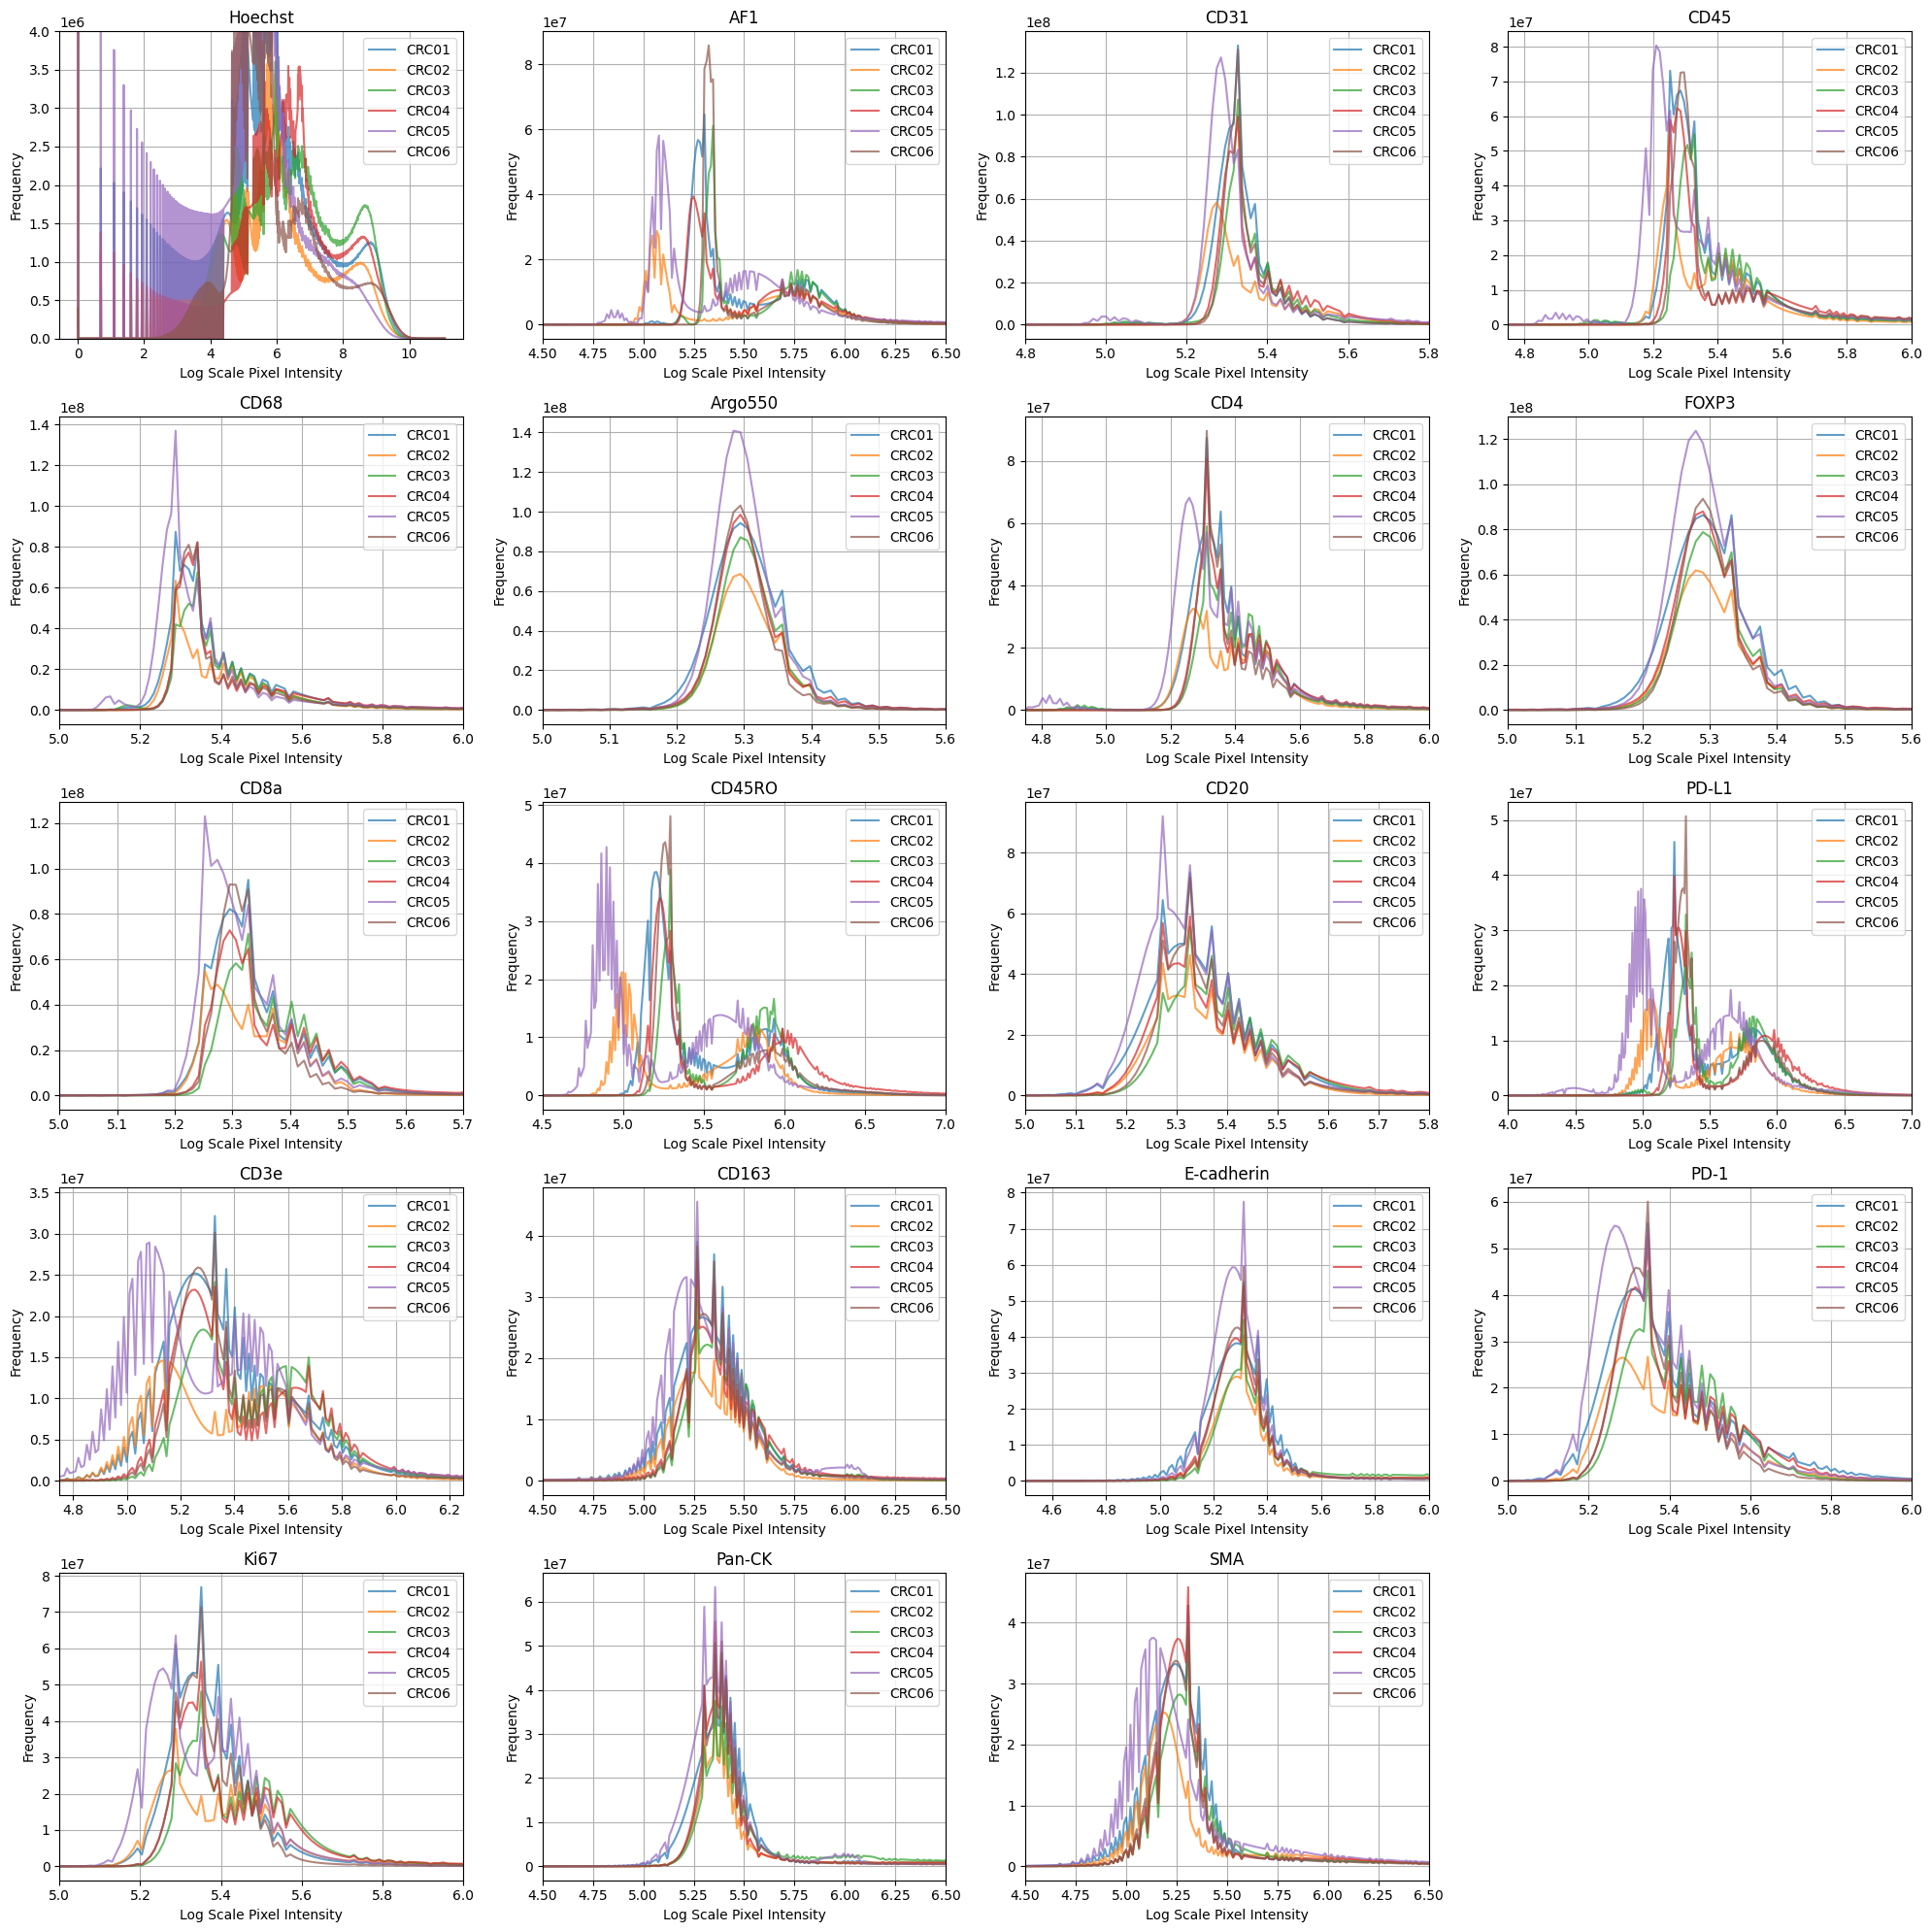

In [8]:
results_range, results_hist = process_samples(
    if_dask_arrays, 
    sample_names, 
    marker_list, 
    bin_counts=1024, 
    subplots_per_row=4,
    if_grid=True,
    dpi=300, 
    tissue_mask=False,
    tissue_mask_paths=None, 
    xlims=xlims, # if this is the first time you run this, set xlims = None
    ylims=ylims # if this is the first time you run this, set ylims = None
)

### I recommend you saving these two dicts as a pickle file for later use

In [9]:
file_path = 'crc01-06-all-marker-2nd-resolution-range-list.pkl'  # Change this to your desired file path
with open(file_path, 'wb') as file:
    pickle.dump(results_range, file)
    
file_path = 'crc01-06-all-marker-2nd-resolution-hist-list.pkl'  # Change this to your desired file path
with open(file_path, 'wb') as file:
    pickle.dump(results_hist, file)

### And when you need to use it you can load them: 

you might need to change the filepath

In [6]:
file_path = 'crc01-06-all-marker-2nd-resolution-hist-list.pkl'
with open(file_path, 'rb') as file:
    results_hist = pickle.load(file)

file_path = 'crc01-06-all-marker-2nd-resolution-range-list.pkl'
with open(file_path, 'rb') as file:
    results_range = pickle.load(file)

## 2. Plot samples for each marker separately --> pick reference sample per marker

####################Processing Hoechst####################
Processing CRC01 for marker Hoechst......
Processing CRC02 for marker Hoechst......
Processing CRC03 for marker Hoechst......
Processing CRC04 for marker Hoechst......
Processing CRC05 for marker Hoechst......
Processing CRC06 for marker Hoechst......


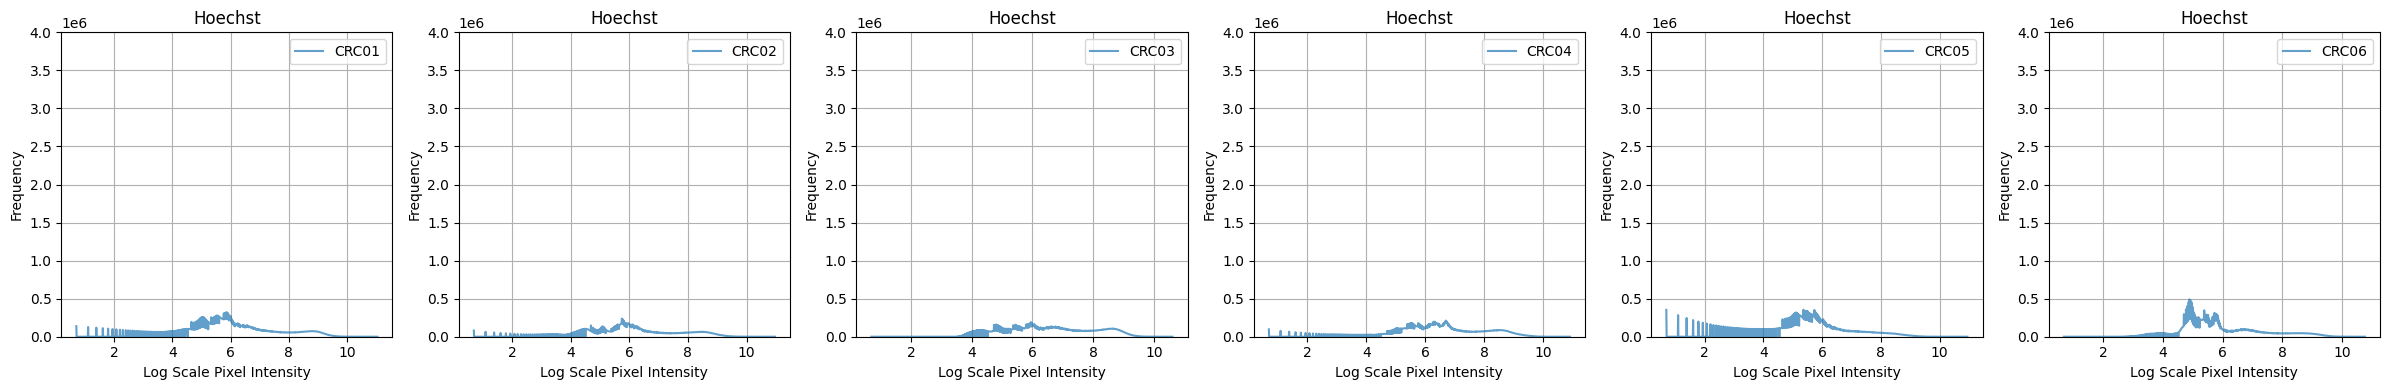

####################Processing AF1####################
Processing CRC01 for marker AF1......
Processing CRC02 for marker AF1......
Processing CRC03 for marker AF1......
Processing CRC04 for marker AF1......
Processing CRC05 for marker AF1......
Processing CRC06 for marker AF1......


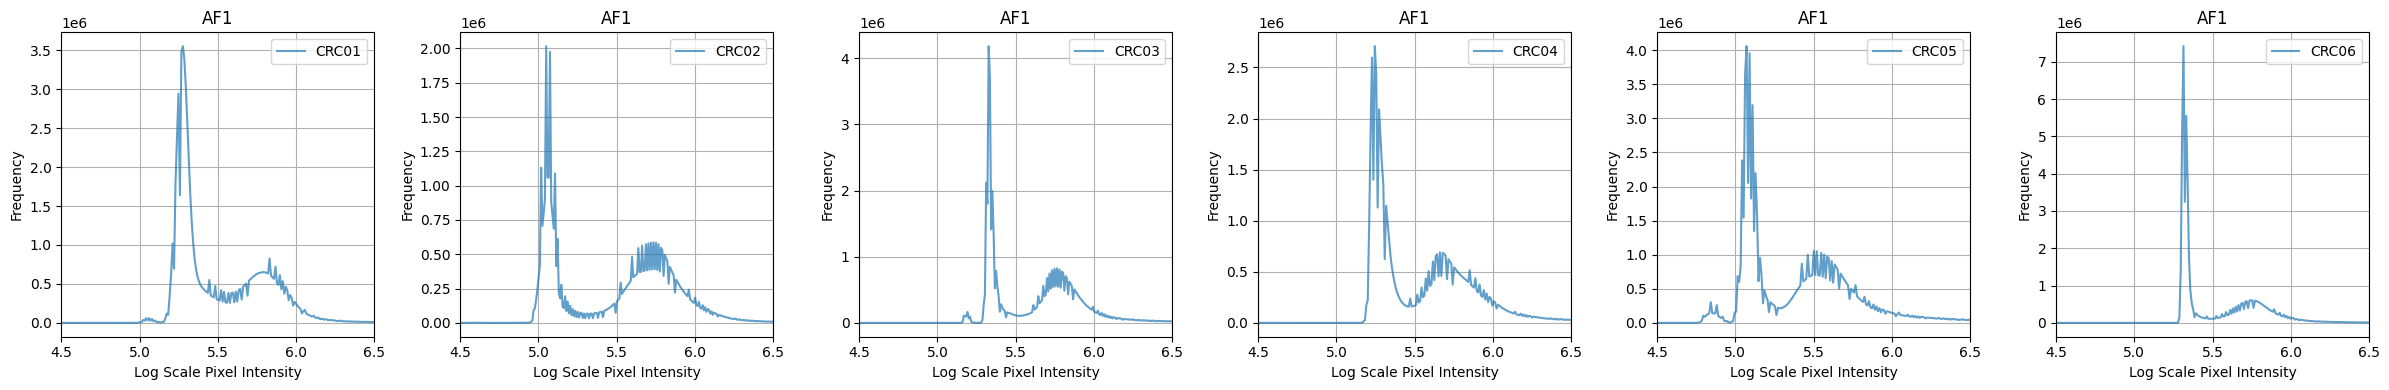

####################Processing CD31####################
Processing CRC01 for marker CD31......
Processing CRC02 for marker CD31......
Processing CRC03 for marker CD31......
Processing CRC04 for marker CD31......
Processing CRC05 for marker CD31......
Processing CRC06 for marker CD31......


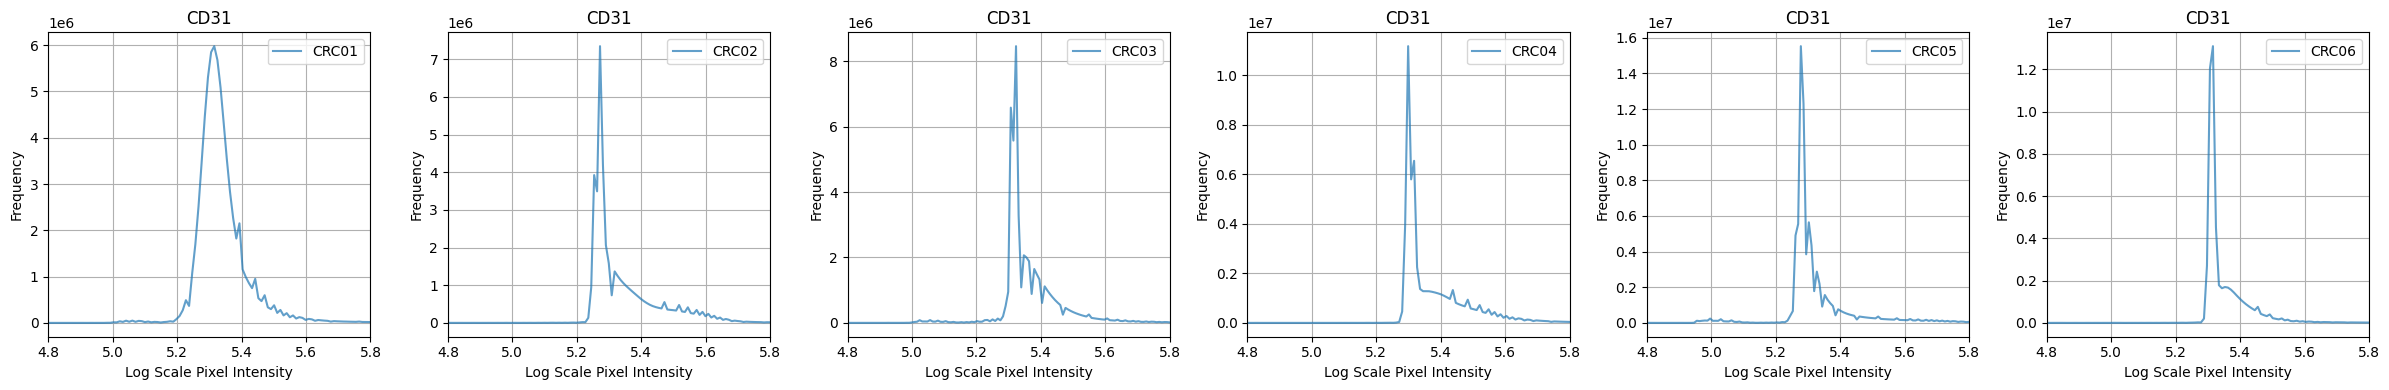

####################Processing CD45####################
Processing CRC01 for marker CD45......
Processing CRC02 for marker CD45......
Processing CRC03 for marker CD45......
Processing CRC04 for marker CD45......
Processing CRC05 for marker CD45......
Processing CRC06 for marker CD45......


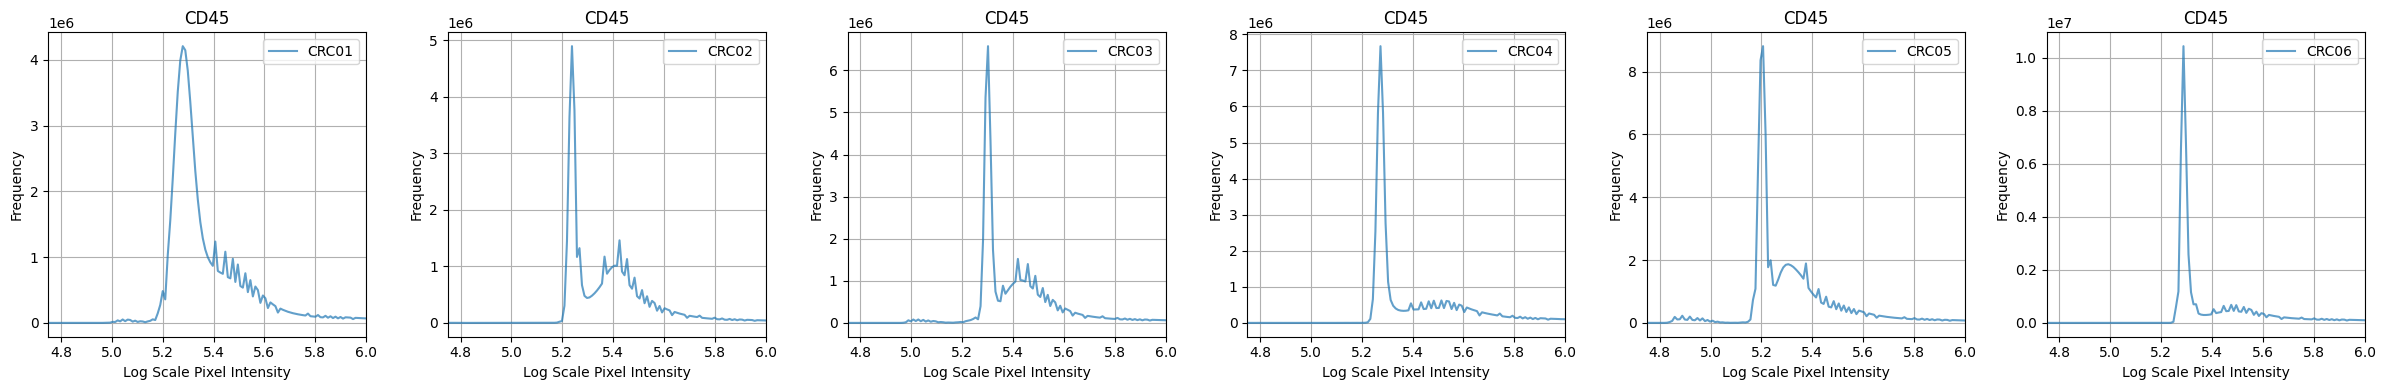

####################Processing CD68####################
Processing CRC01 for marker CD68......
Processing CRC02 for marker CD68......
Processing CRC03 for marker CD68......
Processing CRC04 for marker CD68......
Processing CRC05 for marker CD68......
Processing CRC06 for marker CD68......


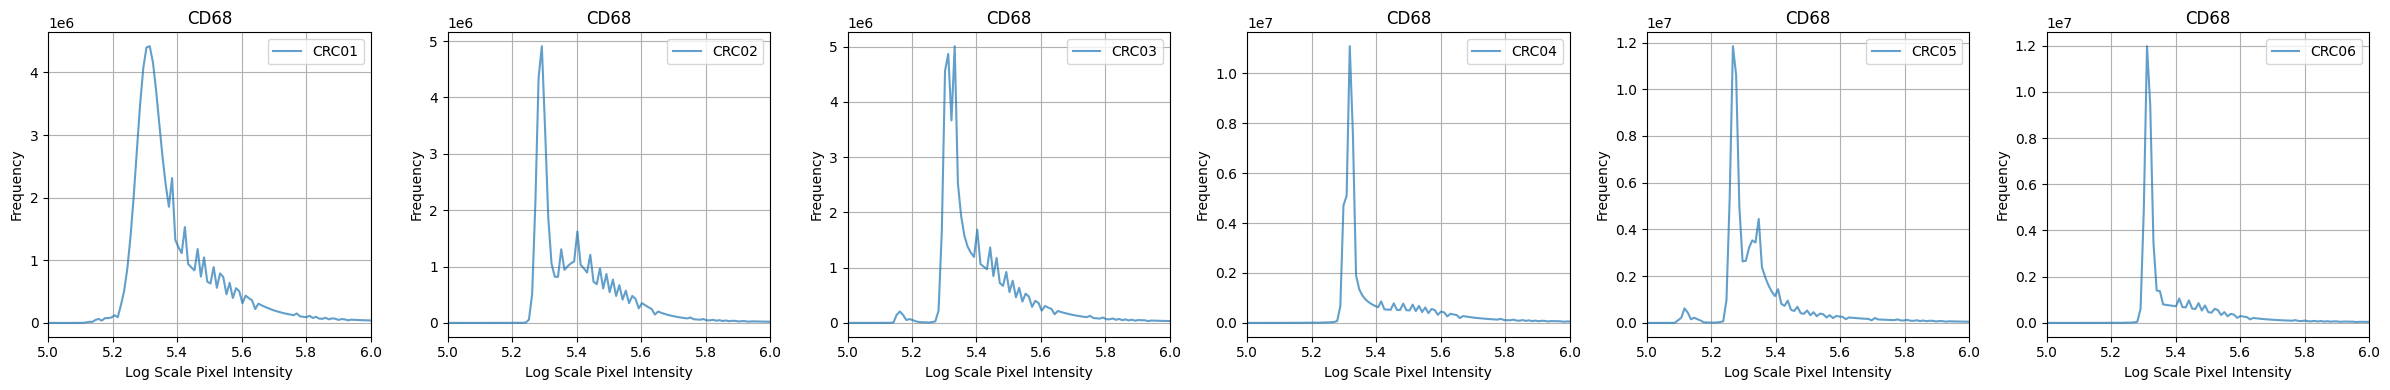

####################Processing Argo550####################
Processing CRC01 for marker Argo550......
Processing CRC02 for marker Argo550......
Processing CRC03 for marker Argo550......
Processing CRC04 for marker Argo550......
Processing CRC05 for marker Argo550......
Processing CRC06 for marker Argo550......


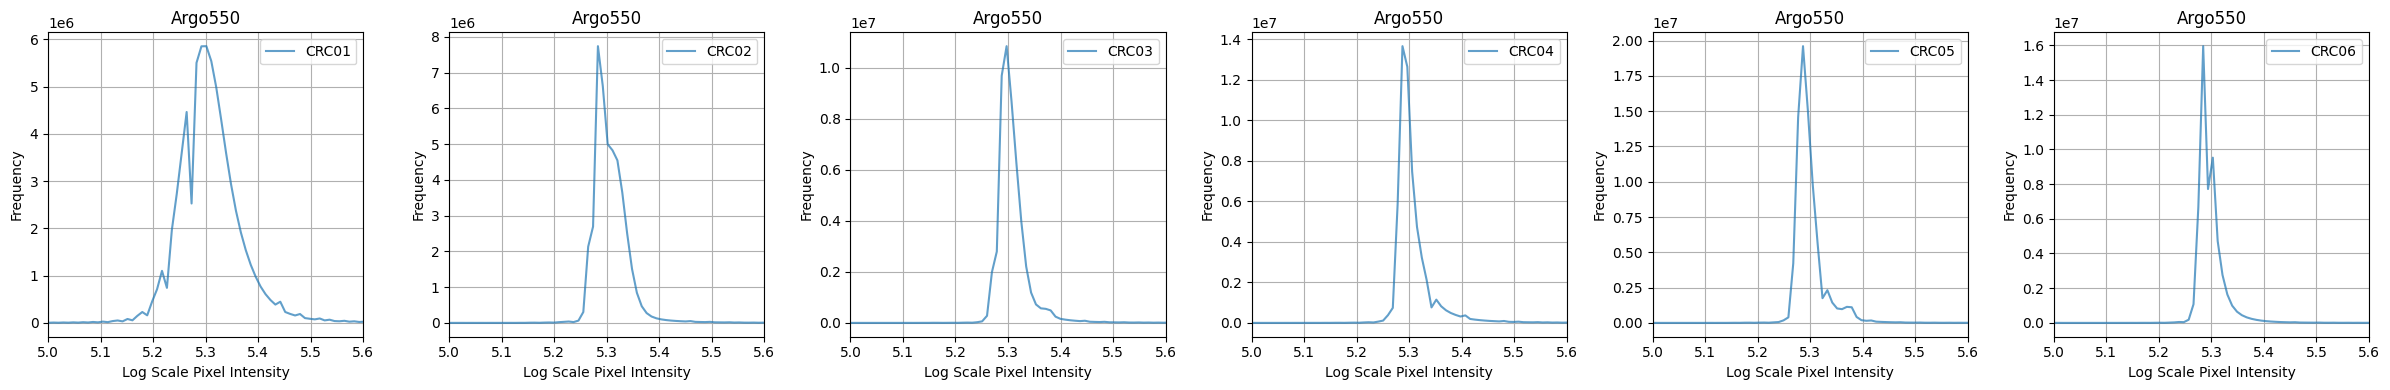

####################Processing CD4####################
Processing CRC01 for marker CD4......
Processing CRC02 for marker CD4......
Processing CRC03 for marker CD4......
Processing CRC04 for marker CD4......
Processing CRC05 for marker CD4......
Processing CRC06 for marker CD4......


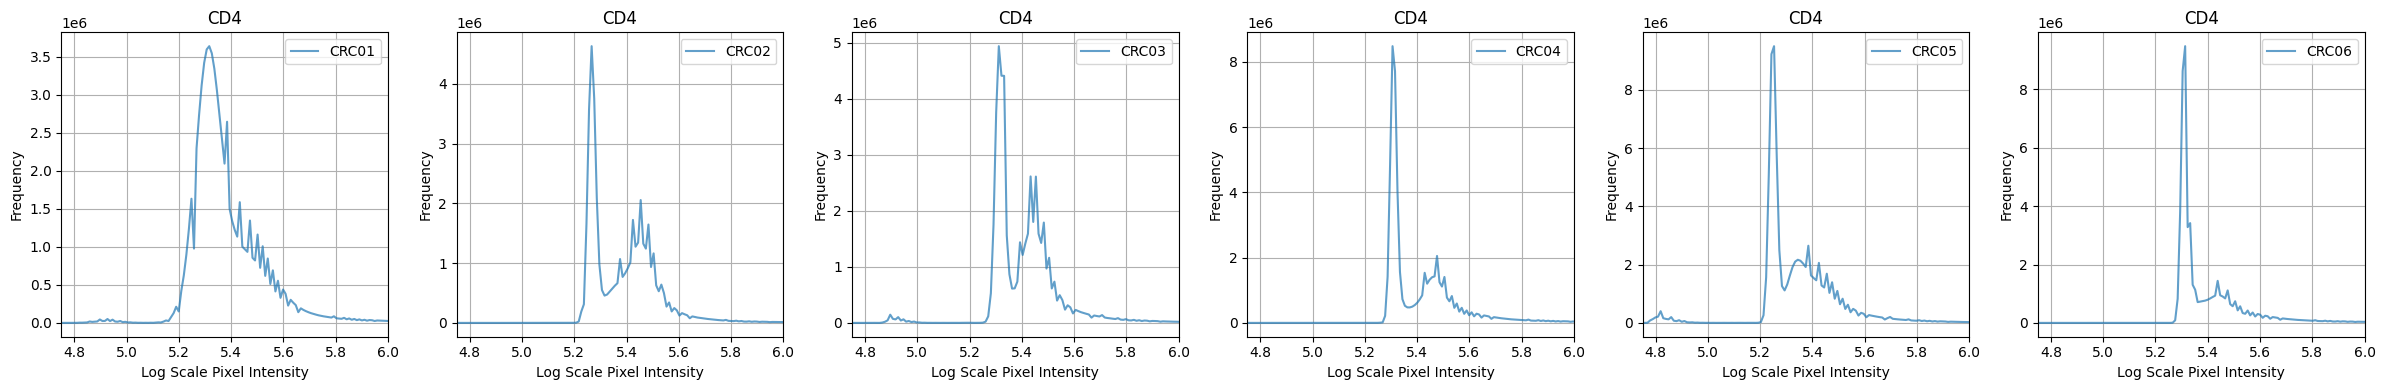

####################Processing FOXP3####################
Processing CRC01 for marker FOXP3......
Processing CRC02 for marker FOXP3......
Processing CRC03 for marker FOXP3......
Processing CRC04 for marker FOXP3......
Processing CRC05 for marker FOXP3......
Processing CRC06 for marker FOXP3......


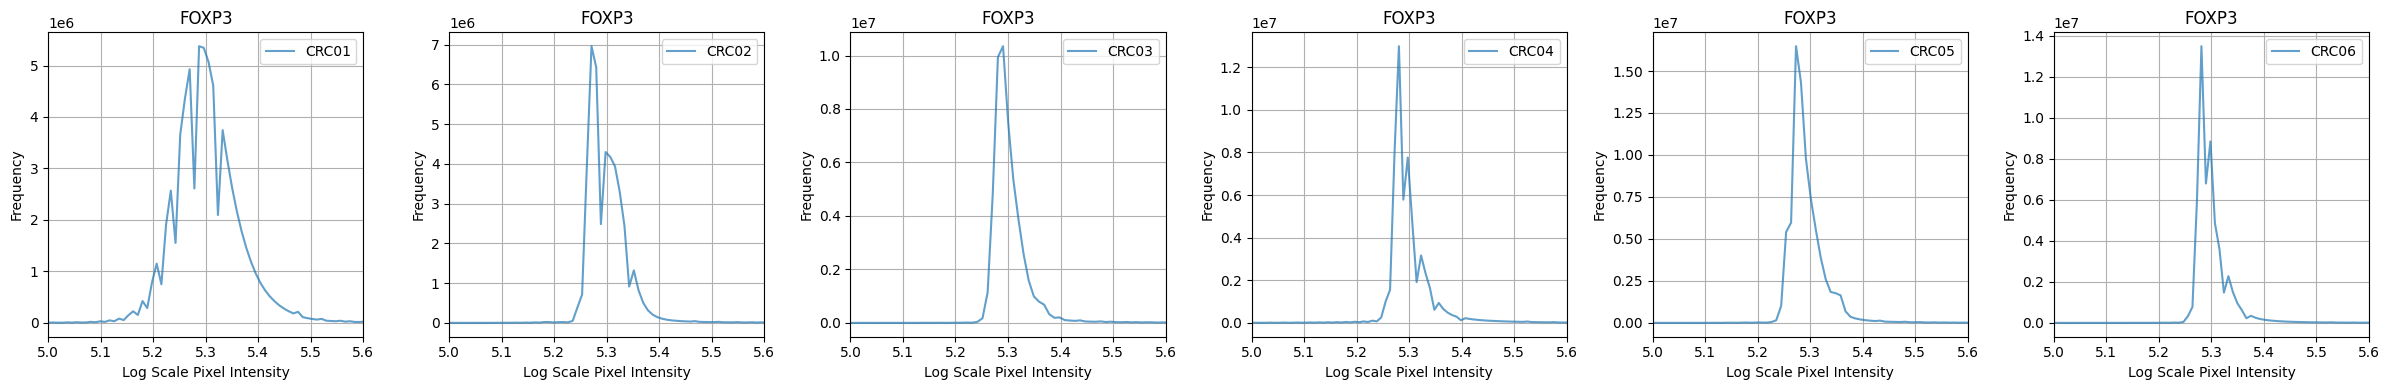

####################Processing CD8a####################
Processing CRC01 for marker CD8a......
Processing CRC02 for marker CD8a......
Processing CRC03 for marker CD8a......
Processing CRC04 for marker CD8a......
Processing CRC05 for marker CD8a......
Processing CRC06 for marker CD8a......


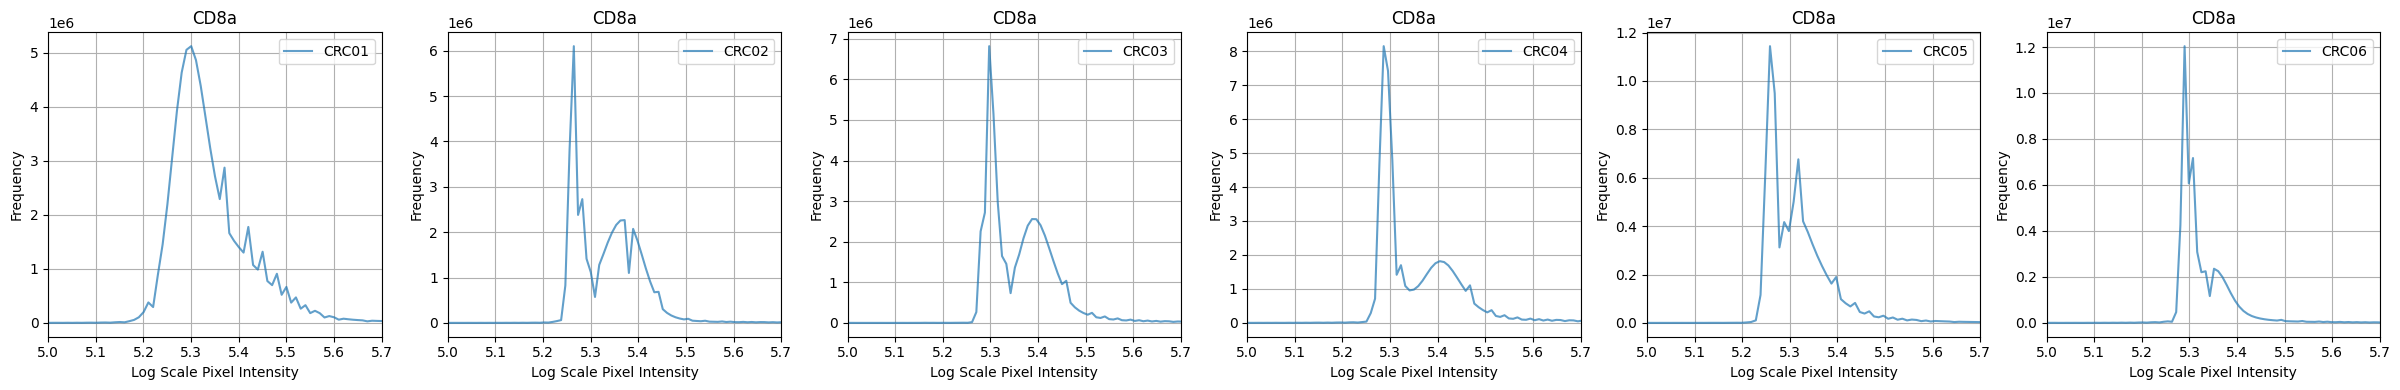

####################Processing CD45RO####################
Processing CRC01 for marker CD45RO......
Processing CRC02 for marker CD45RO......
Processing CRC03 for marker CD45RO......
Processing CRC04 for marker CD45RO......
Processing CRC05 for marker CD45RO......
Processing CRC06 for marker CD45RO......


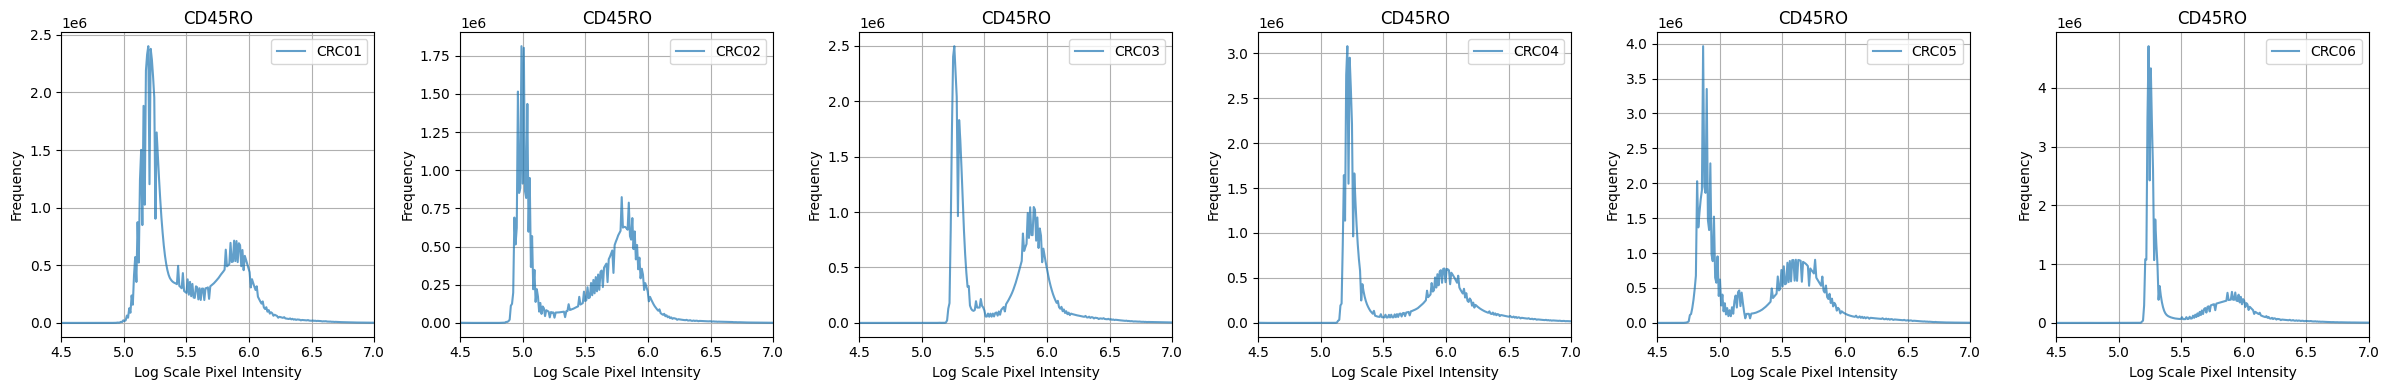

####################Processing CD20####################
Processing CRC01 for marker CD20......
Processing CRC02 for marker CD20......
Processing CRC03 for marker CD20......
Processing CRC04 for marker CD20......
Processing CRC05 for marker CD20......
Processing CRC06 for marker CD20......


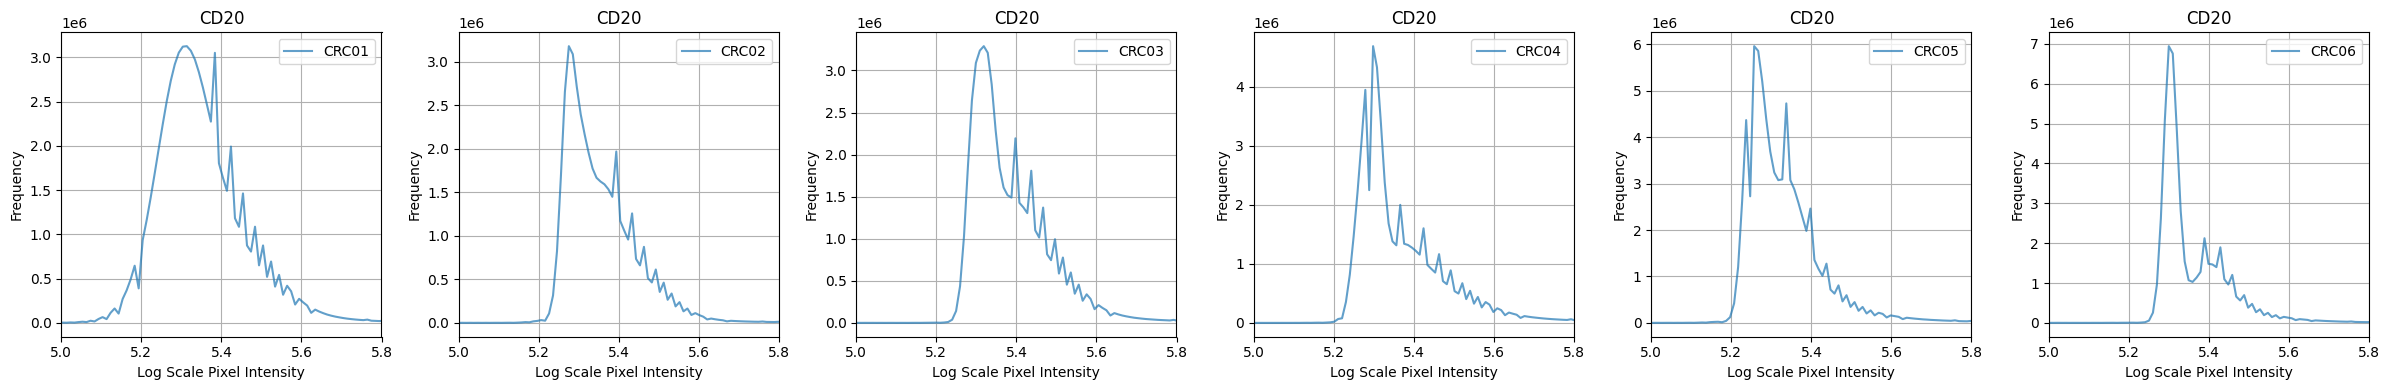

####################Processing PD-L1####################
Processing CRC01 for marker PD-L1......
Processing CRC02 for marker PD-L1......
Processing CRC03 for marker PD-L1......
Processing CRC04 for marker PD-L1......
Processing CRC05 for marker PD-L1......
Processing CRC06 for marker PD-L1......


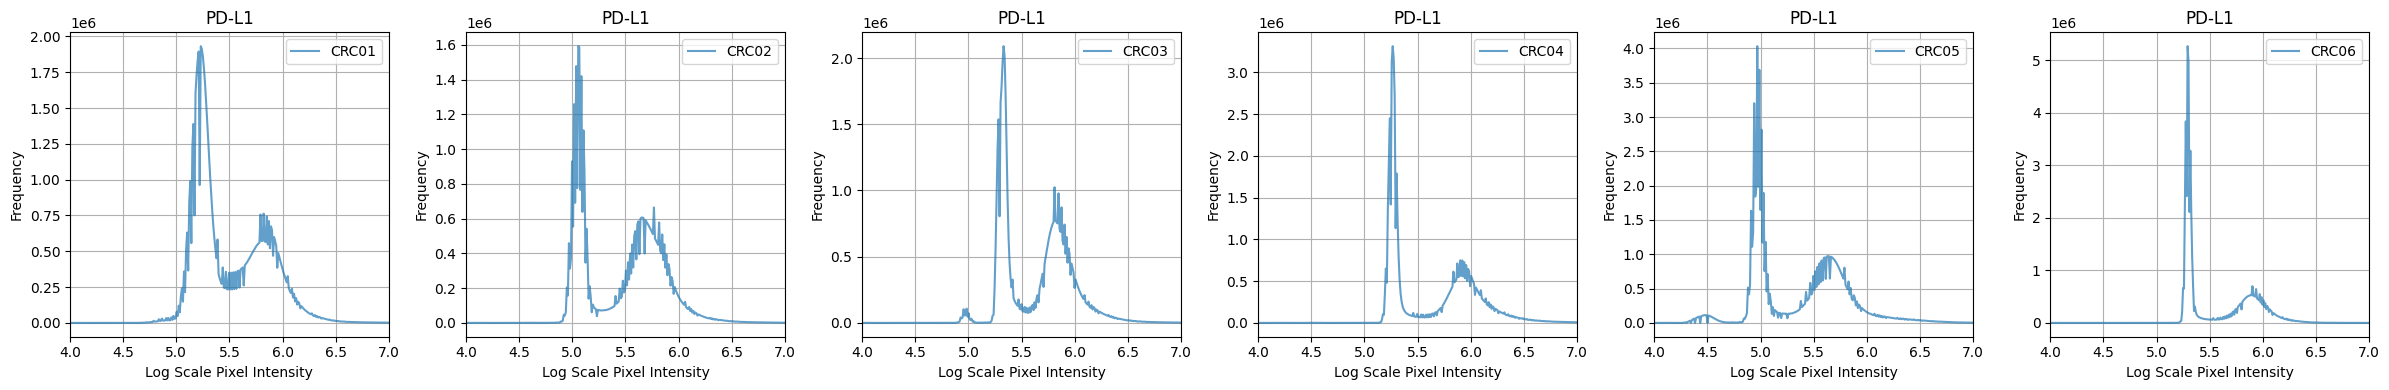

####################Processing CD3e####################
Processing CRC01 for marker CD3e......
Processing CRC02 for marker CD3e......
Processing CRC03 for marker CD3e......
Processing CRC04 for marker CD3e......
Processing CRC05 for marker CD3e......
Processing CRC06 for marker CD3e......


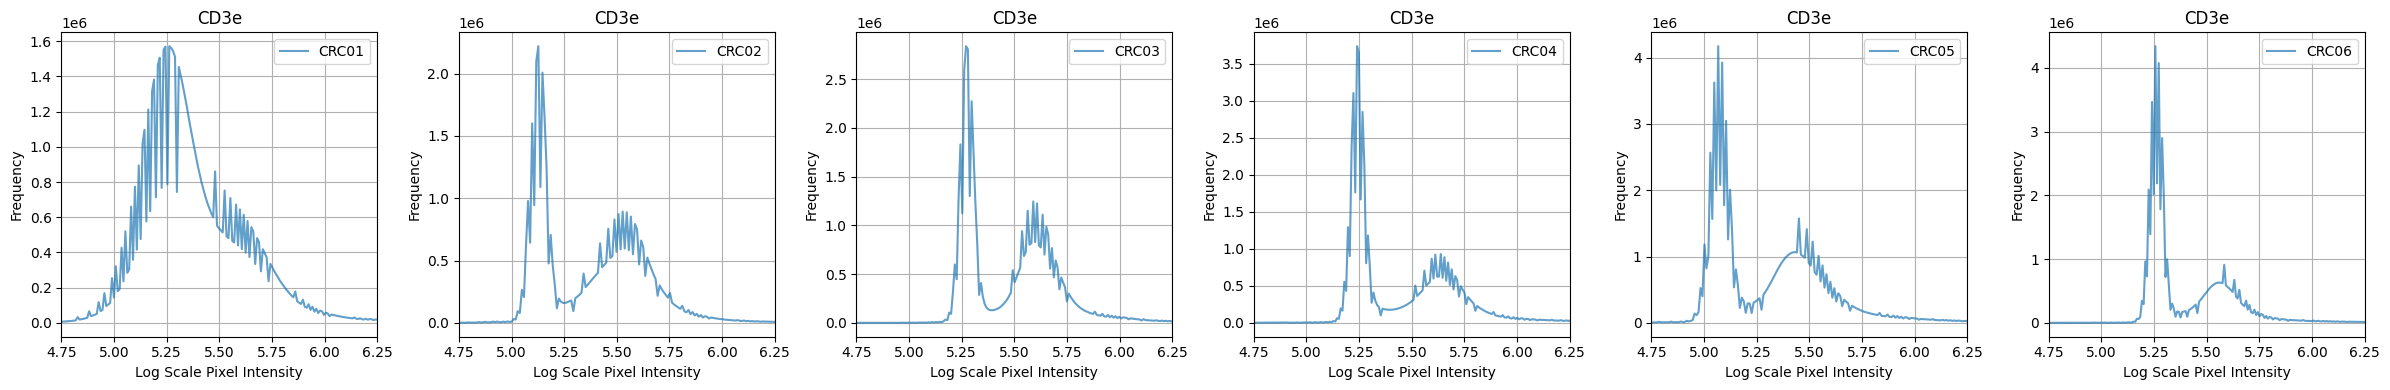

####################Processing CD163####################
Processing CRC01 for marker CD163......
Processing CRC02 for marker CD163......
Processing CRC03 for marker CD163......
Processing CRC04 for marker CD163......
Processing CRC05 for marker CD163......
Processing CRC06 for marker CD163......


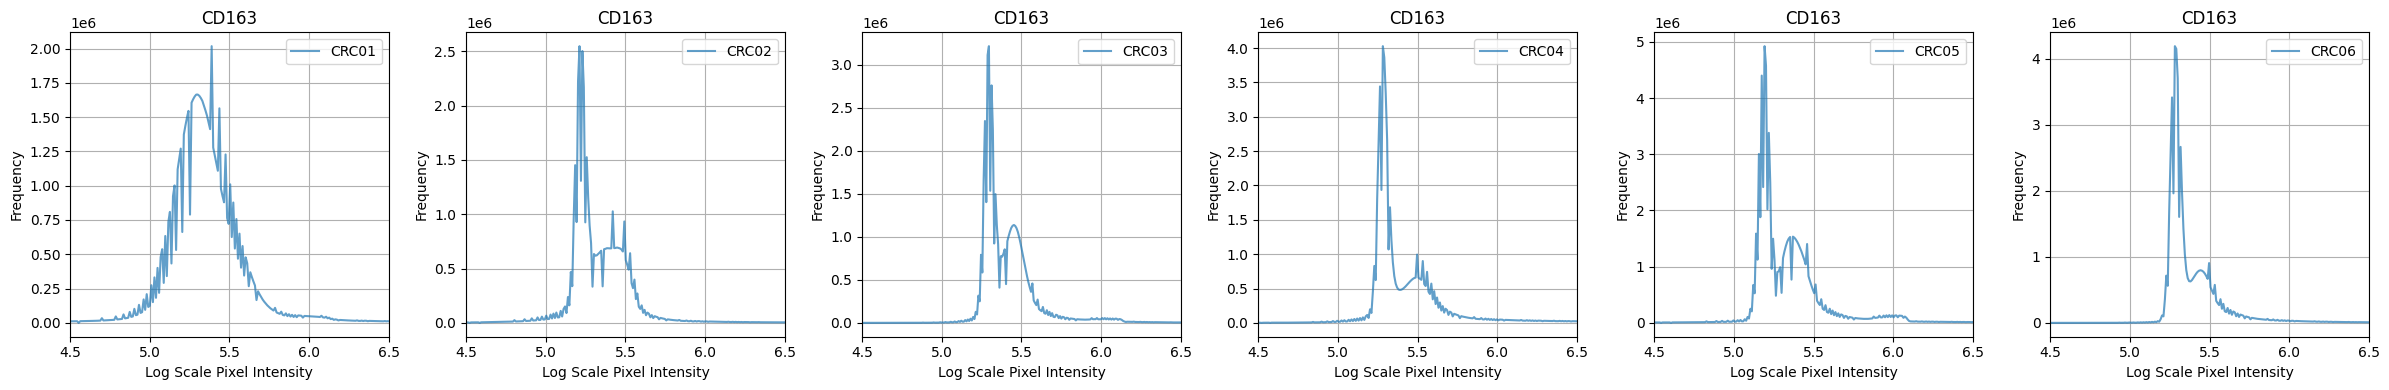

####################Processing E-cadherin####################
Processing CRC01 for marker E-cadherin......
Processing CRC02 for marker E-cadherin......
Processing CRC03 for marker E-cadherin......
Processing CRC04 for marker E-cadherin......
Processing CRC05 for marker E-cadherin......
Processing CRC06 for marker E-cadherin......


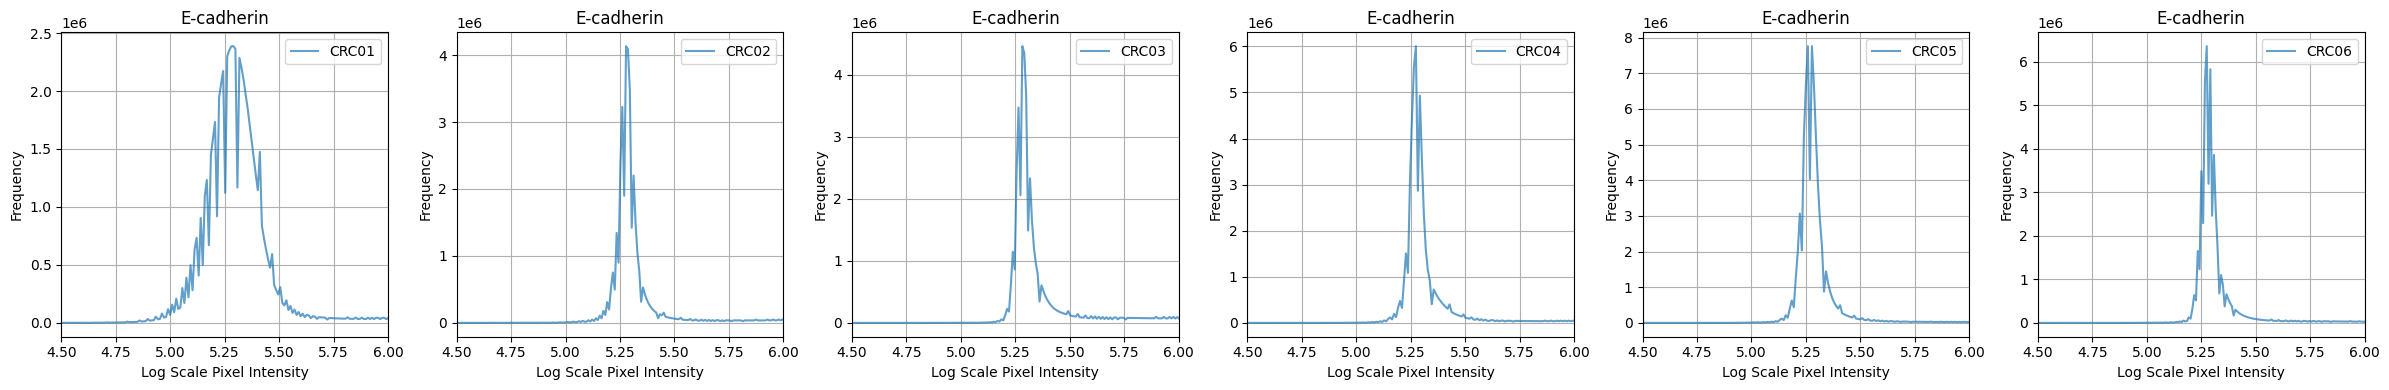

####################Processing PD-1####################
Processing CRC01 for marker PD-1......
Processing CRC02 for marker PD-1......
Processing CRC03 for marker PD-1......
Processing CRC04 for marker PD-1......
Processing CRC05 for marker PD-1......
Processing CRC06 for marker PD-1......


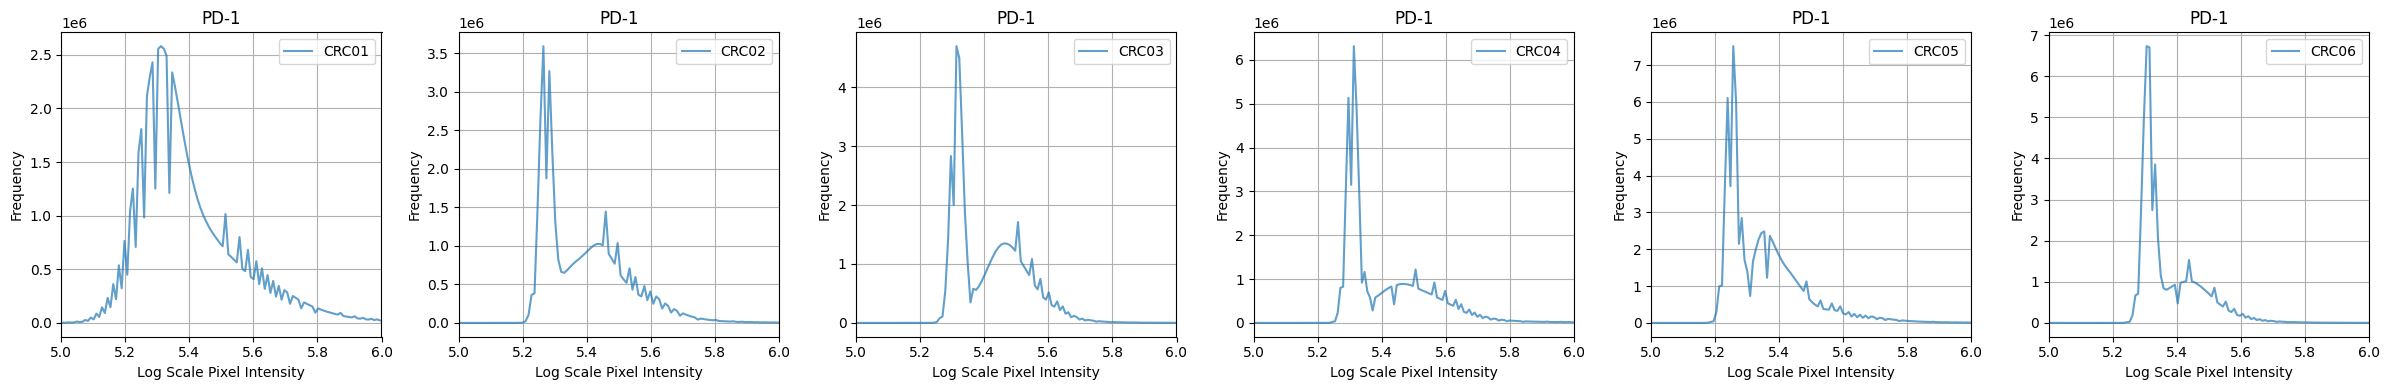

####################Processing Ki67####################
Processing CRC01 for marker Ki67......
Processing CRC02 for marker Ki67......
Processing CRC03 for marker Ki67......
Processing CRC04 for marker Ki67......
Processing CRC05 for marker Ki67......
Processing CRC06 for marker Ki67......


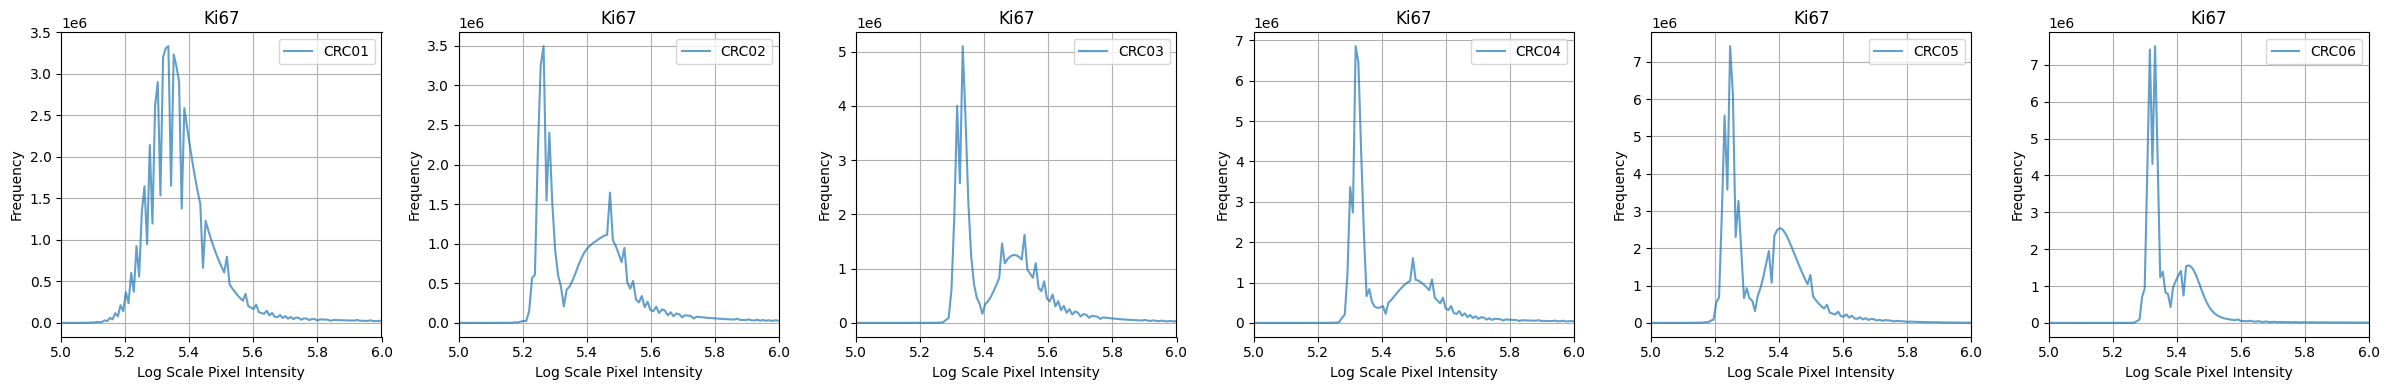

####################Processing Pan-CK####################
Processing CRC01 for marker Pan-CK......
Processing CRC02 for marker Pan-CK......
Processing CRC03 for marker Pan-CK......
Processing CRC04 for marker Pan-CK......
Processing CRC05 for marker Pan-CK......
Processing CRC06 for marker Pan-CK......


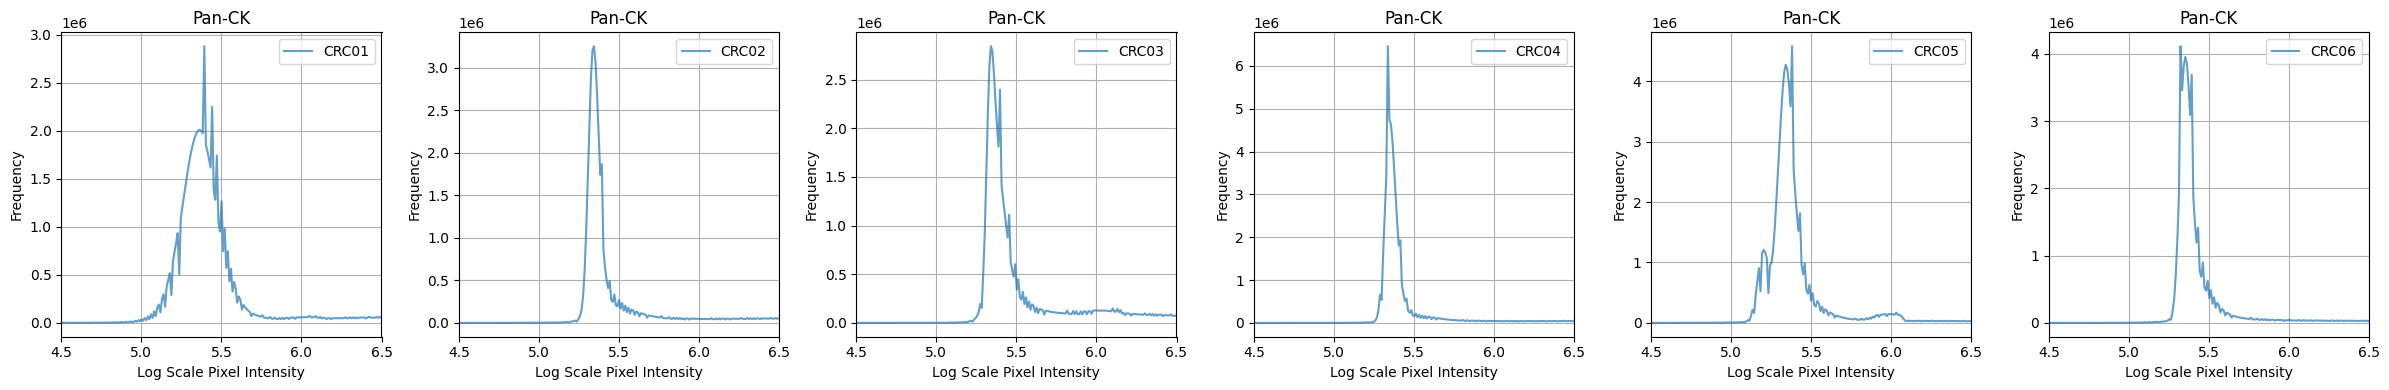

####################Processing SMA####################
Processing CRC01 for marker SMA......
Processing CRC02 for marker SMA......
Processing CRC03 for marker SMA......
Processing CRC04 for marker SMA......
Processing CRC05 for marker SMA......
Processing CRC06 for marker SMA......


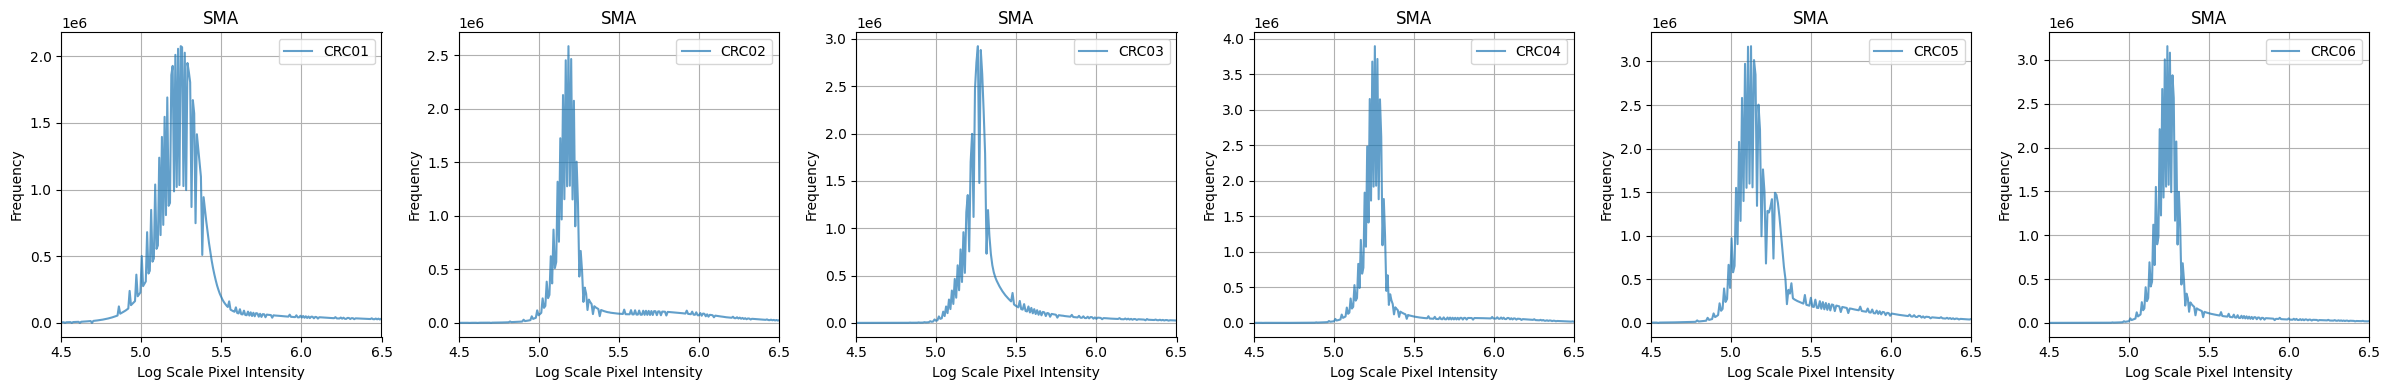

In [26]:
process_samples_per_marker(if_dask_arrays, 
                               sample_names, 
                               marker_list, 
                               bin_counts=1024, 
                               if_grid=True,
                               dpi=300, 
                               tissue_mask=False,
                               tissue_mask_paths=None,
                               xlims=xlims, 
                               ylims=ylims, 
                               save_filename=None)

# Step #2: Perform Normalization

At the end of step 1, you should have identified reference sample per marker

You should put the ref sample per marker in a list, they should look like this (for a 19 marker/channel dataset): 

reference_sample = ['CRC01', 'CRC01', 'CRC01', 'CRC02', 'CRC02', 'CRC01', 'CRC02', 'CRC01', 'CRC02', 'CRC01', 'CRC01', 'CRC01', 'CRC02', 'CRC05', 'CRC01', 'CRC01', 'CRC02', 'CRC01', 'CRC01']

You should update the ref sample constant in constants.py

this step will generate a dict called shifts_fft_dict which contains the amount of shift for each marker

## 1. calculate amount of shift in integer units

****************************** Processing marker Hoechst ******************************
Reference sample for Hoechst is CRC01


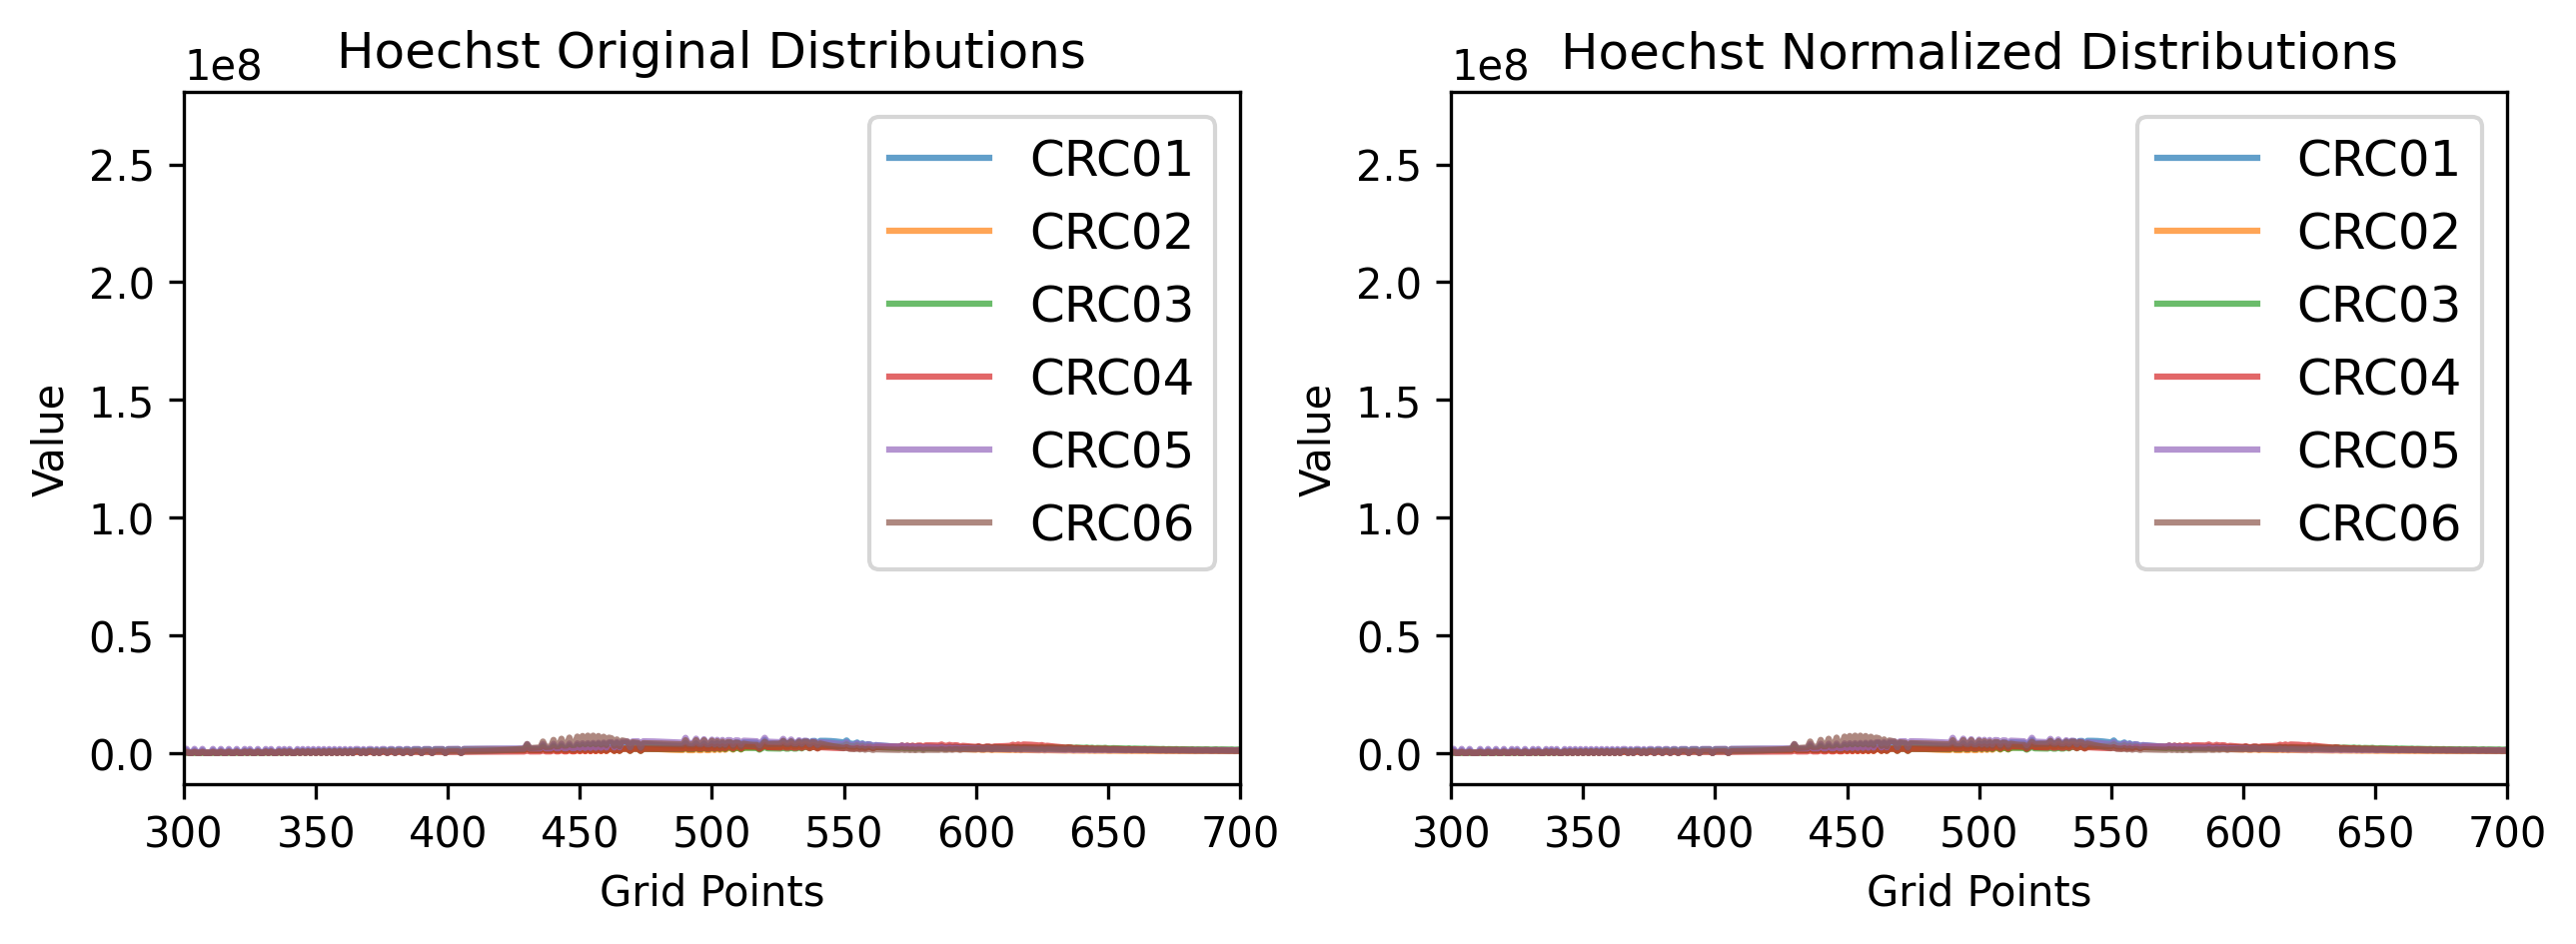

##### Metrics for original marker image #####
Hoechst Pearson Correlation Coefficients: ['1', '0.99315', '0.62696', '0.97083', '0.97117', '0.32828']
Hoechst Spearman Correlation Coefficients: ['1', '0.97589', '0.94768', '0.94894', '0.97688', '0.96509']
Hoechst KL Divergences: ['0', '0.028414', '0.29691', '0.11606', '0.11984', '0.54421'] 

##### Metrics for shifted marker image #####
Hoechst shifted Pearson Correlation Coefficients: ['1', '0.99315', '0.62696', '0.97083', '0.97117', '0.32828']
Hoechst shifted Spearman Correlation Coefficients: ['1', '0.97589', '0.94768', '0.94894', '0.97688', '0.96509']
Hoechst shifted KL Divergences: ['0', '0.028414', '0.29691', '0.11606', '0.11984', '0.54421'] 

Hoechst shifts_direct is: [0, 0, 0, 0, 0, 0]
Hoechst shifts_fft is:    [0, 0, 0, 0, 0, 0]

****************************** Processing marker AF1 ******************************
Reference sample for AF1 is CRC01


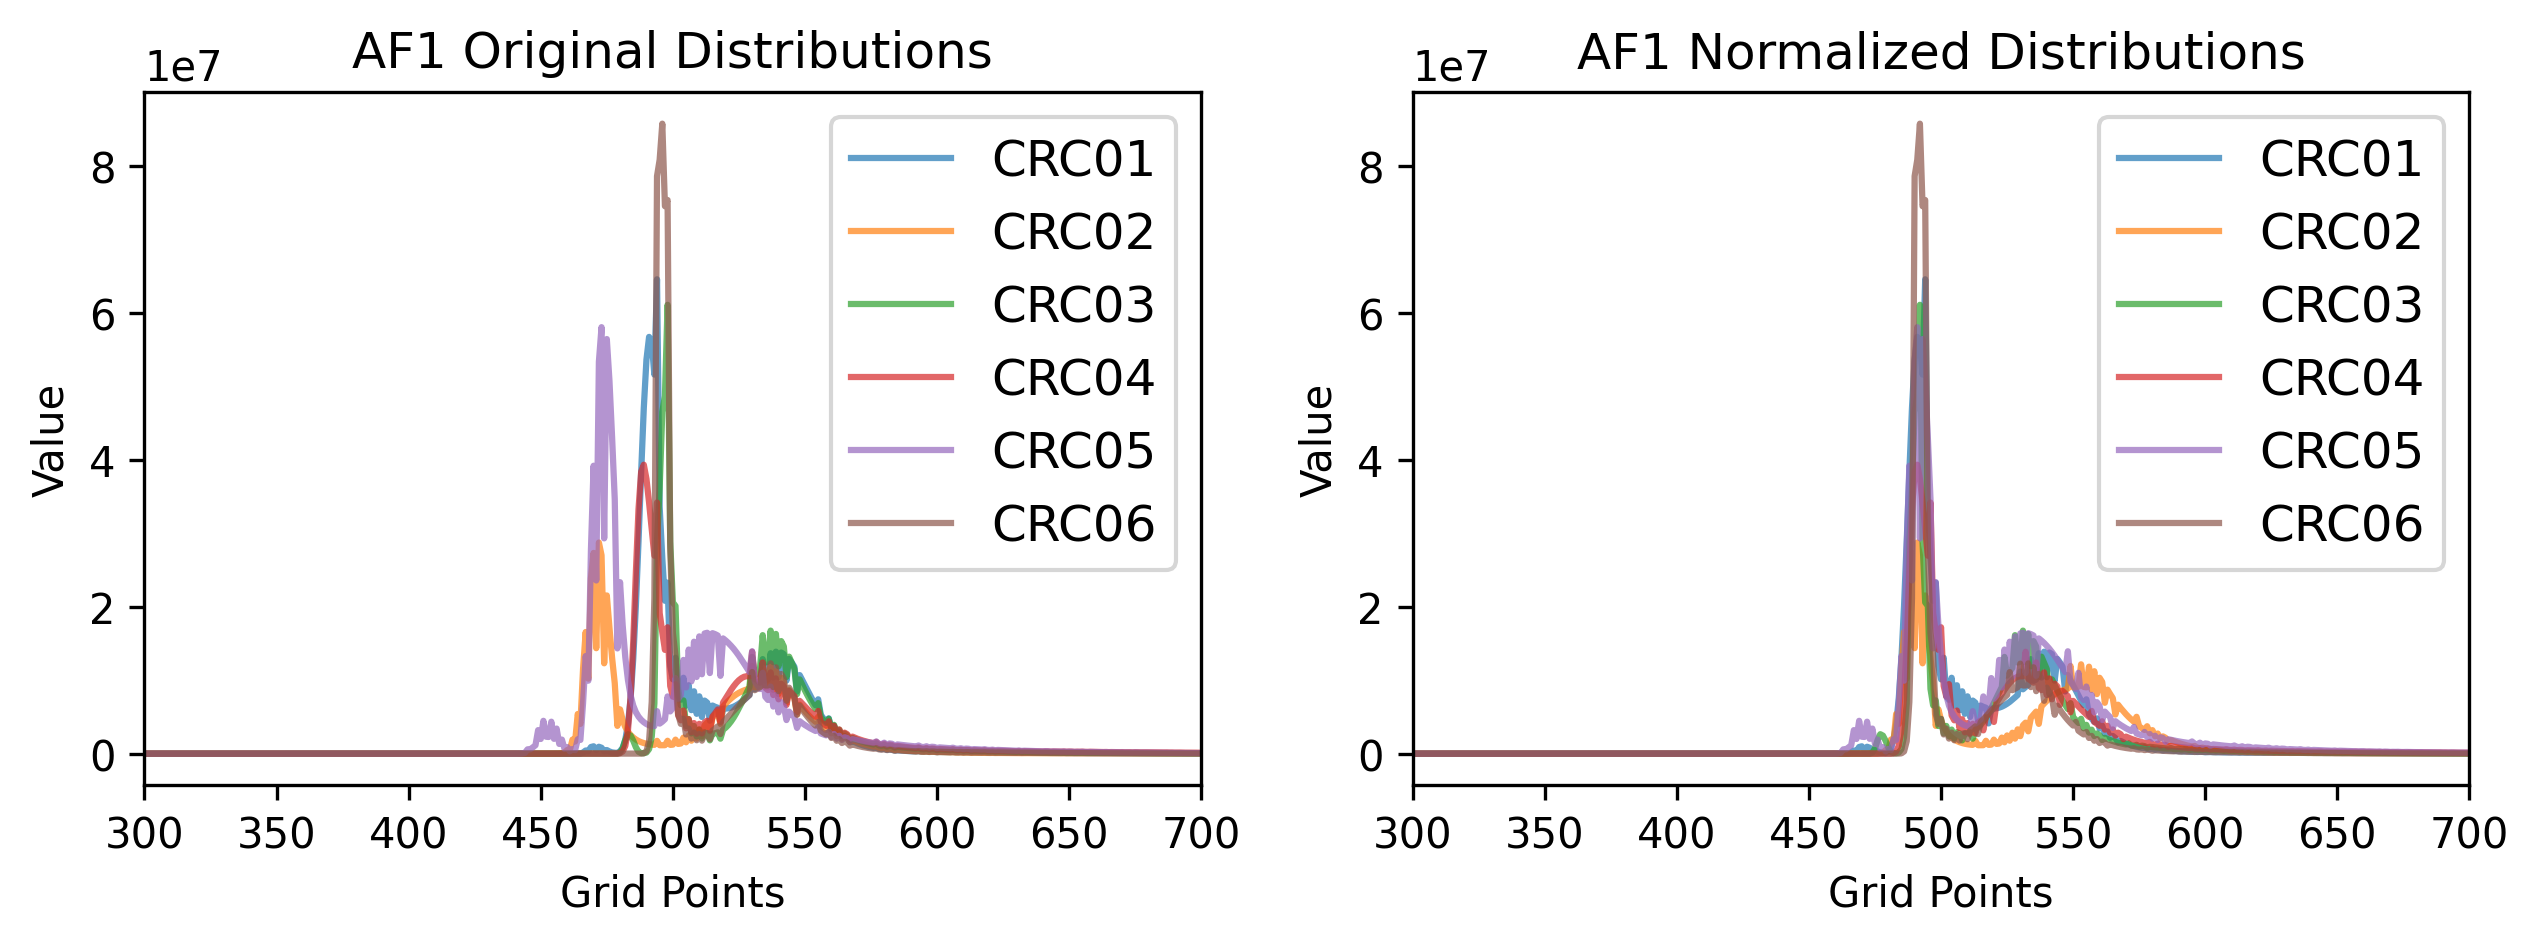

##### Metrics for original marker image #####
AF1 Pearson Correlation Coefficients: ['1', '0.25233', '0.55097', '0.95693', '0.22898', '0.57781']
AF1 Spearman Correlation Coefficients: ['1', '0.96566', '0.96139', '0.97576', '0.96567', '0.96431']
AF1 KL Divergences: ['0', '1.3611', '1.2227', '0.11116', '1.2016', '1.7352'] 

##### Metrics for shifted marker image #####
AF1 shifted Pearson Correlation Coefficients: ['1', '0.86569', '0.89857', '0.95784', '0.9497', '0.88913']
AF1 shifted Spearman Correlation Coefficients: ['1', '0.89677', '0.89017', '0.89683', '0.88611', '0.88089']
AF1 shifted KL Divergences: ['0', '0.32307', '0.24183', '0.14409', '0.11388', '0.44013'] 

AF1 shifts_direct is: [0, -19, 6, -2, -18, 4]
AF1 shifts_fft is:    [0, -19, 6, -2, -18, 4]

****************************** Processing marker CD31 ******************************
Reference sample for CD31 is CRC01


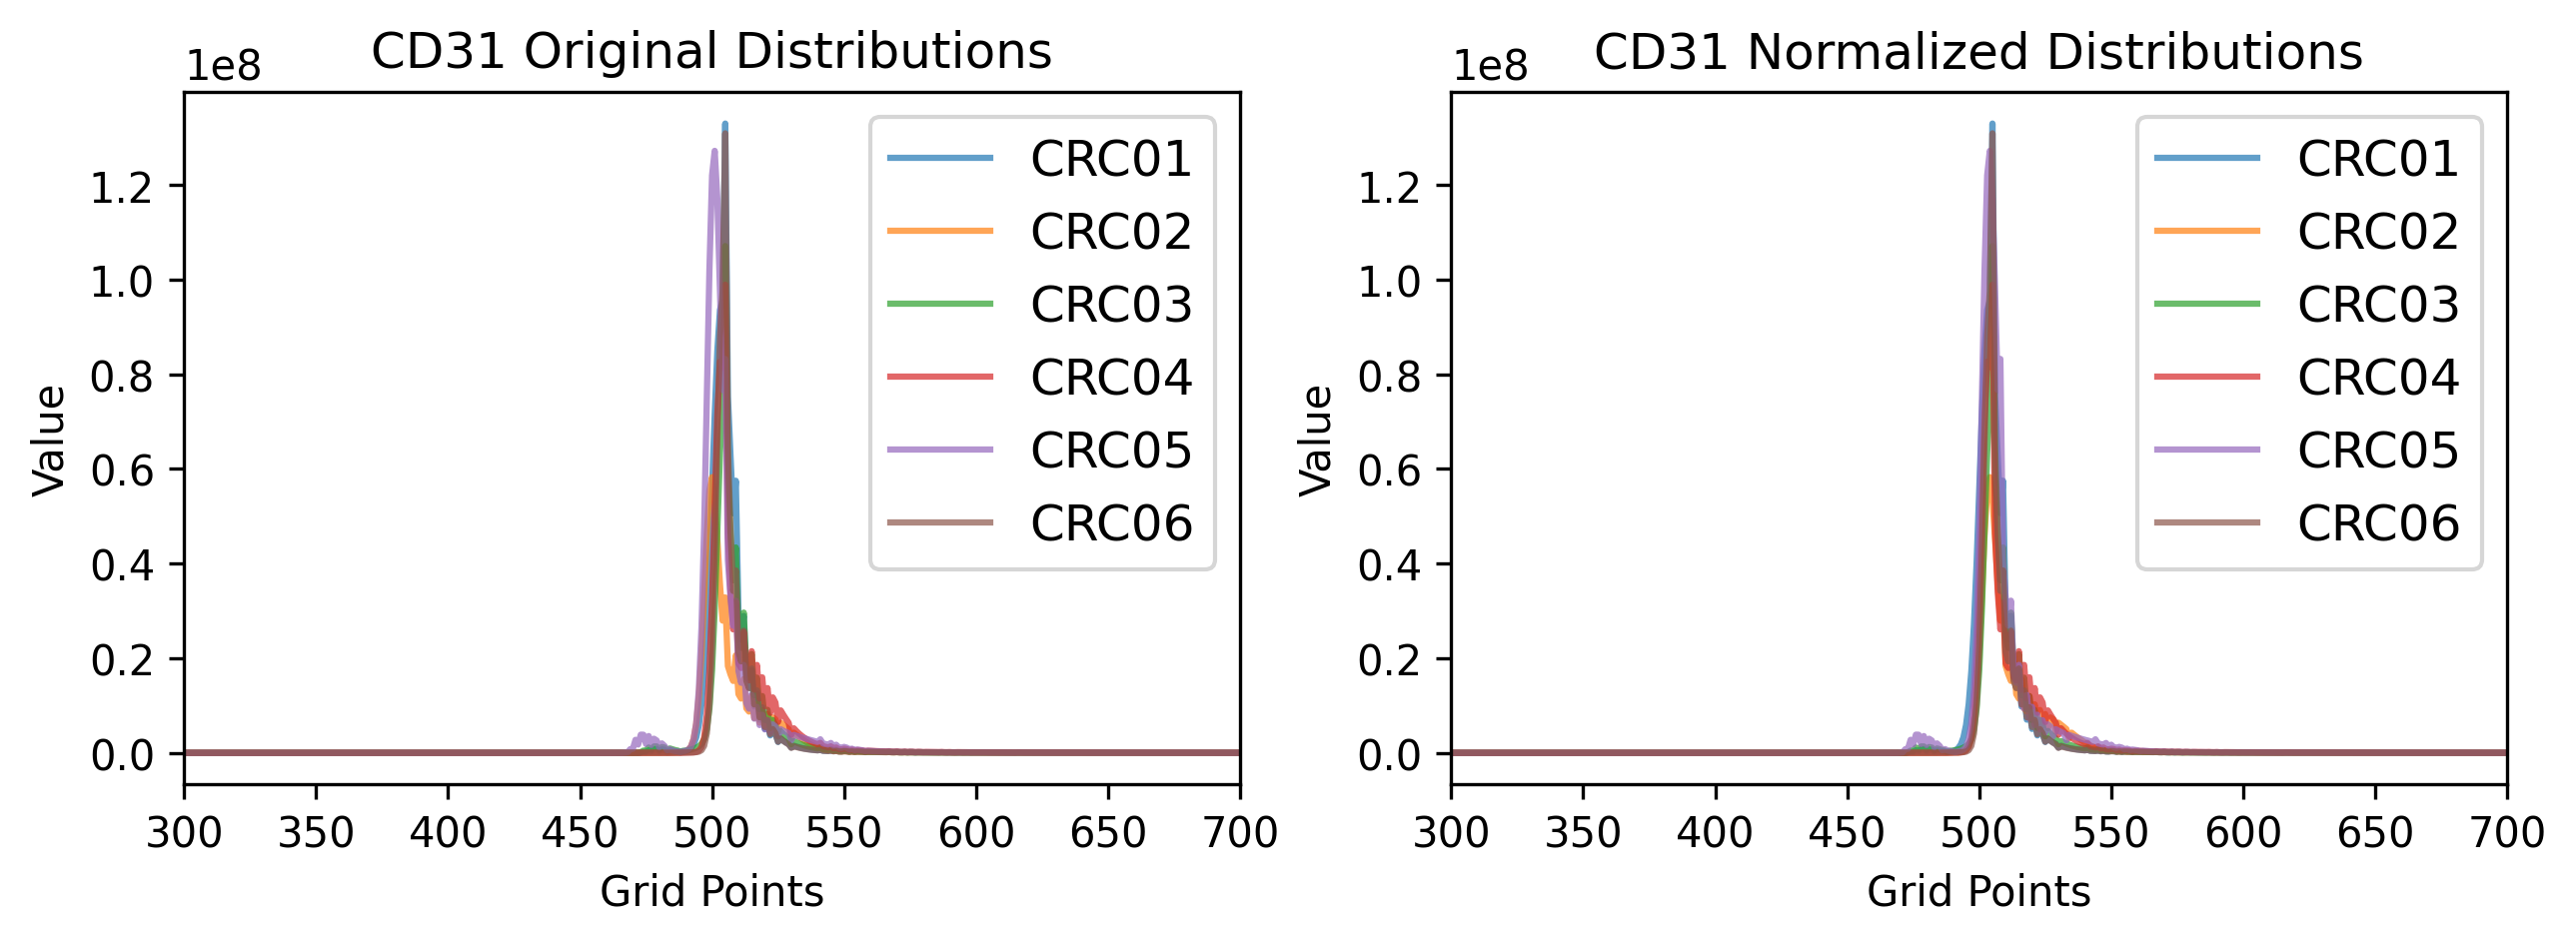

##### Metrics for original marker image #####
CD31 Pearson Correlation Coefficients: ['1', '0.81464', '0.96568', '0.97135', '0.86758', '0.96994']
CD31 Spearman Correlation Coefficients: ['1', '0.95459', '0.94943', '0.97234', '0.96068', '0.97451']
CD31 KL Divergences: ['0', '0.25346', '0.1116', '0.15841', '0.18367', '0.13033'] 

##### Metrics for shifted marker image #####
CD31 shifted Pearson Correlation Coefficients: ['1', '0.96201', '0.96568', '0.97135', '0.97405', '0.96994']
CD31 shifted Spearman Correlation Coefficients: ['1', '0.84818', '0.94943', '0.97234', '0.85592', '0.97451']
CD31 shifted KL Divergences: ['0', '0.16878', '0.1116', '0.15841', '0.088835', '0.13033'] 

CD31 shifts_direct is: [0, -4, 0, 0, -3, 0]
CD31 shifts_fft is:    [0, -4, 0, 0, -3, 0]

****************************** Processing marker CD45 ******************************
Reference sample for CD45 is CRC02


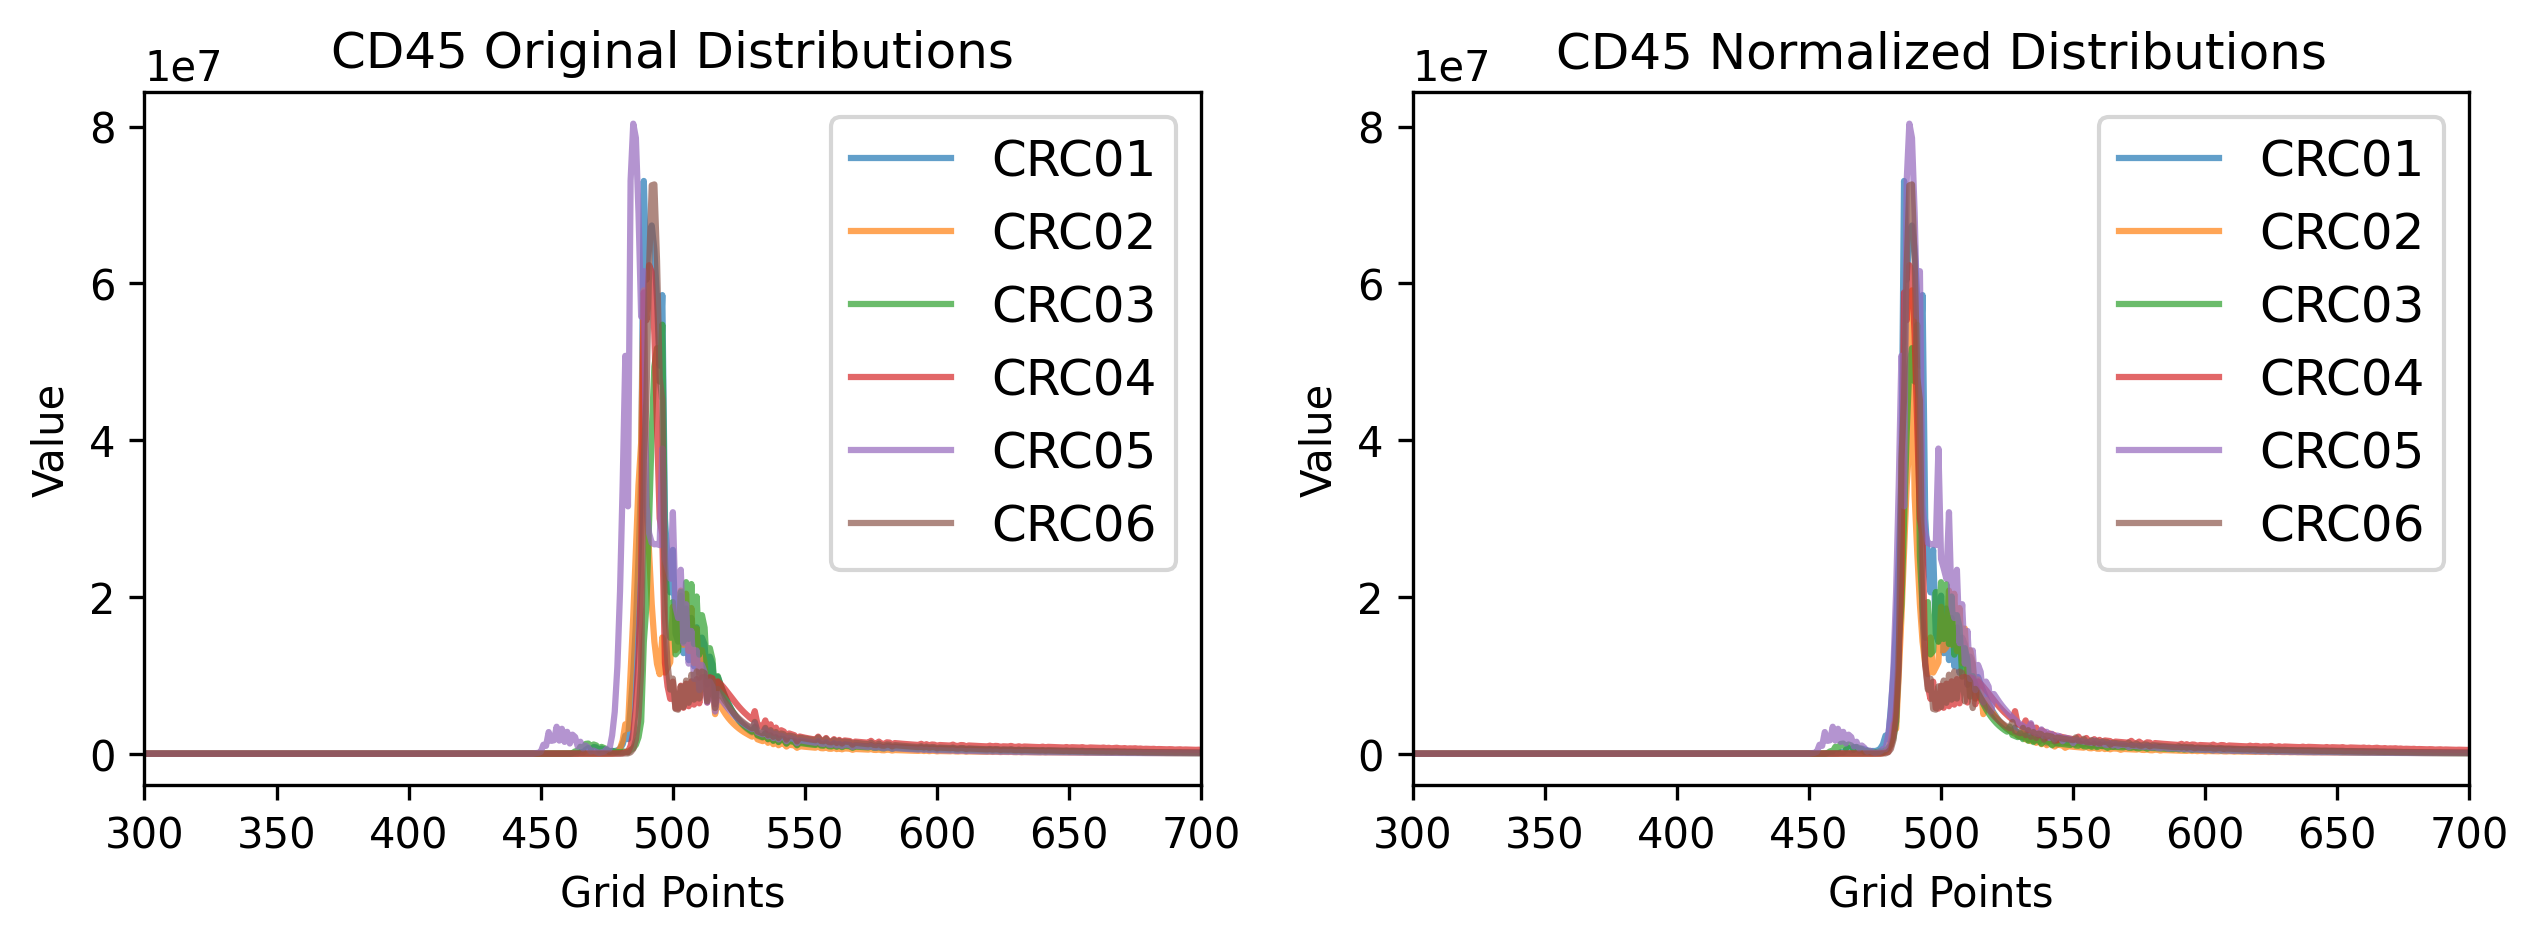

##### Metrics for original marker image #####
CD45 Pearson Correlation Coefficients: ['1', '0.83507', '0.88914', '0.96345', '0.66882', '0.9447']
CD45 Spearman Correlation Coefficients: ['1', '0.97584', '0.96537', '0.98251', '0.96936', '0.9581']
CD45 KL Divergences: ['0', '0.18985', '0.20262', '0.15333', '0.37518', '0.16762'] 

##### Metrics for shifted marker image #####
CD45 shifted Pearson Correlation Coefficients: ['1', '0.91363', '0.94457', '0.96345', '0.94321', '0.93686']
CD45 shifted Spearman Correlation Coefficients: ['1', '0.92019', '0.91772', '0.98251', '0.92159', '0.89558']
CD45 shifted KL Divergences: ['0', '0.13126', '0.082434', '0.15333', '0.090732', '0.1557'] 

CD45 shifts_direct is: [3, 0, 5, 3, -3, 4]
CD45 shifts_fft is:    [3, 0, 5, 3, -3, 4]

****************************** Processing marker CD68 ******************************
Reference sample for CD68 is CRC02


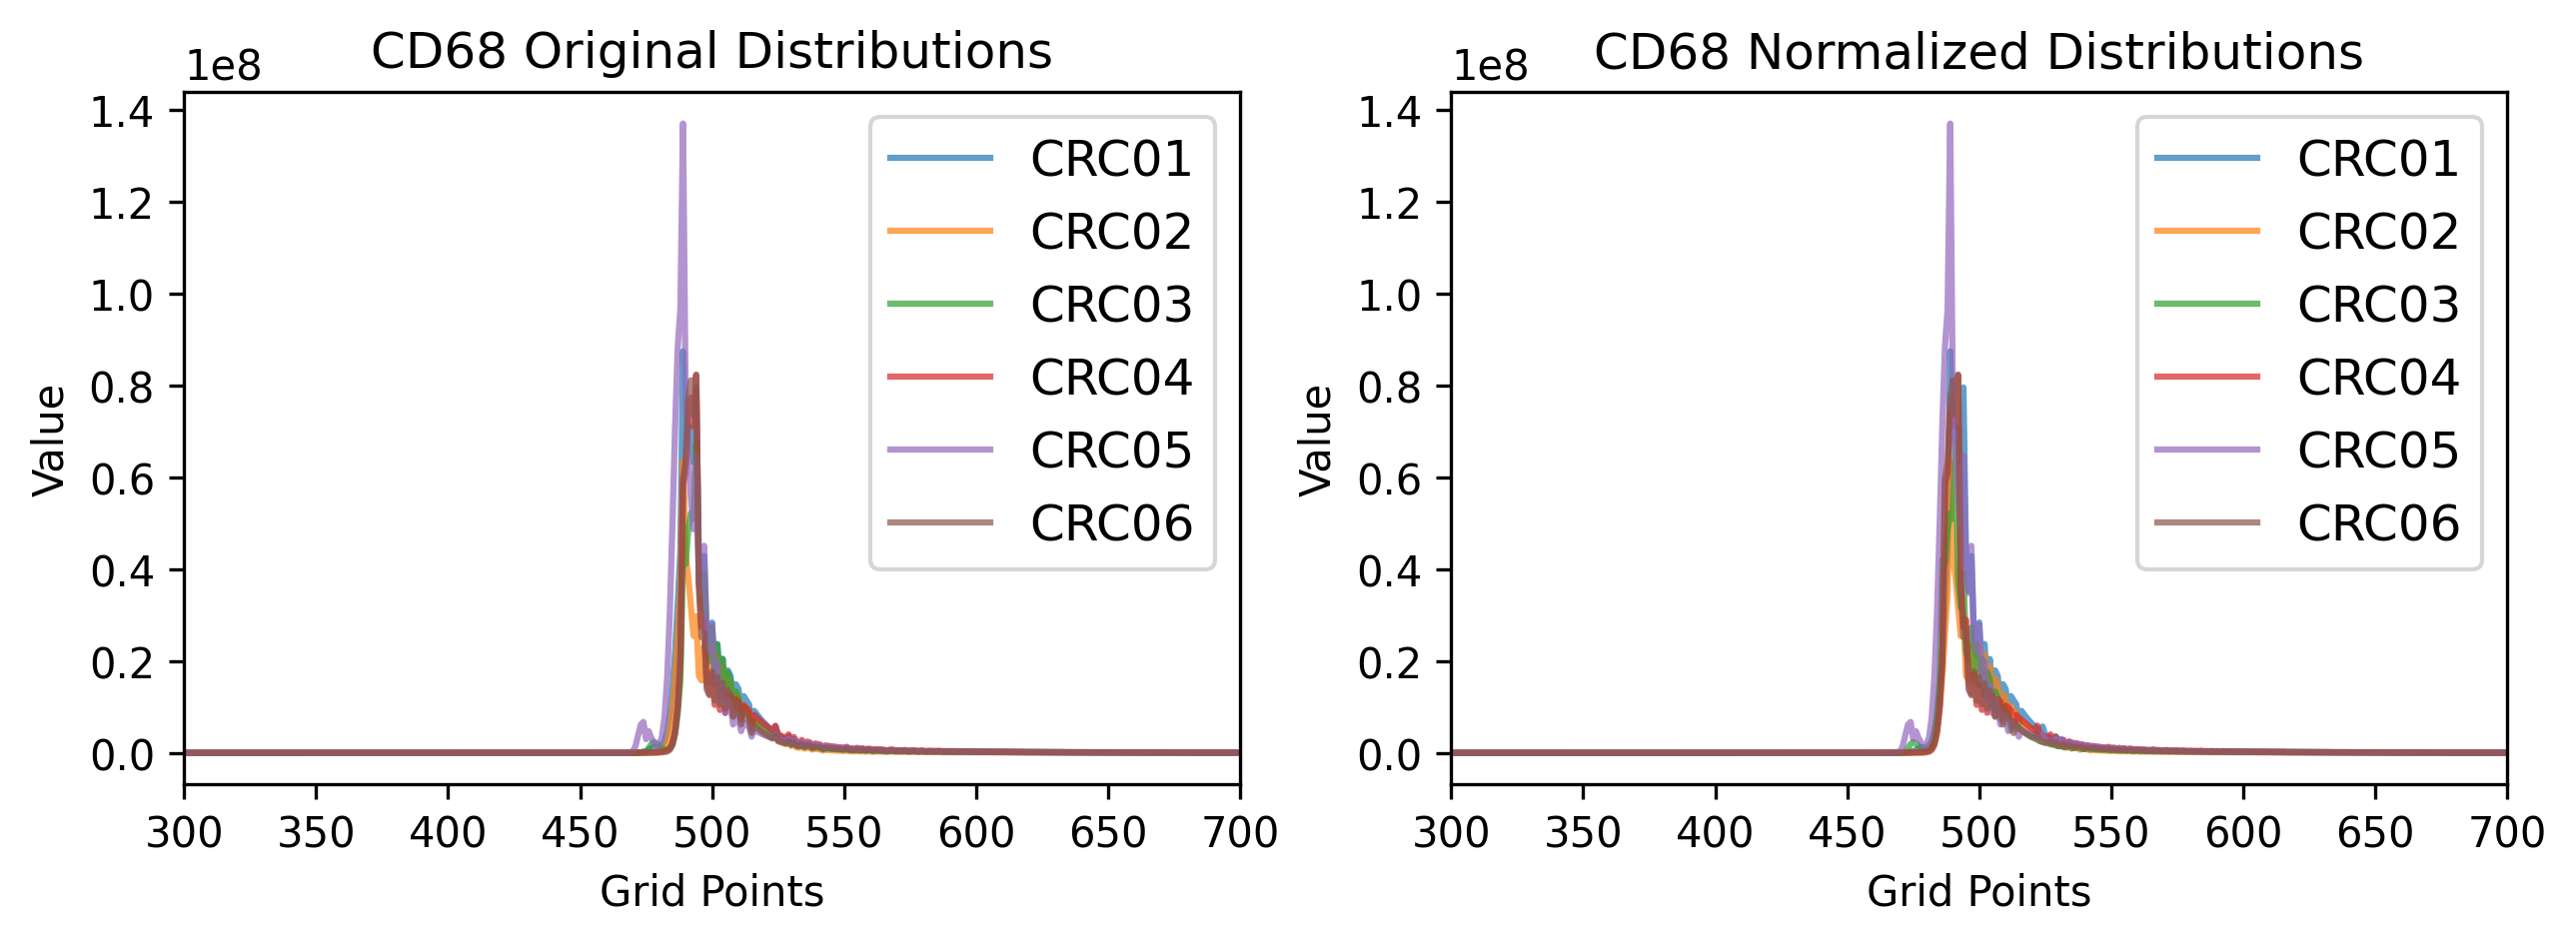

##### Metrics for original marker image #####
CD68 Pearson Correlation Coefficients: ['1', '0.96116', '0.96279', '0.96499', '0.90255', '0.95983']
CD68 Spearman Correlation Coefficients: ['1', '0.98432', '0.97123', '0.97971', '0.96257', '0.96907']
CD68 KL Divergences: ['0', '0.053174', '0.07504', '0.084805', '0.14281', '0.098045'] 

##### Metrics for shifted marker image #####
CD68 shifted Pearson Correlation Coefficients: ['1', '0.96116', '0.94149', '0.91856', '0.90255', '0.91028']
CD68 shifted Spearman Correlation Coefficients: ['1', '0.98432', '0.90917', '0.9072', '0.96257', '0.90334']
CD68 shifted KL Divergences: ['0', '0.053174', '0.06366', '0.099198', '0.14281', '0.11324'] 

CD68 shifts_direct is: [0, 0, 3, 2, 0, 2]
CD68 shifts_fft is:    [0, 0, 3, 2, 0, 2]

****************************** Processing marker Argo550 ******************************
Reference sample for Argo550 is CRC01


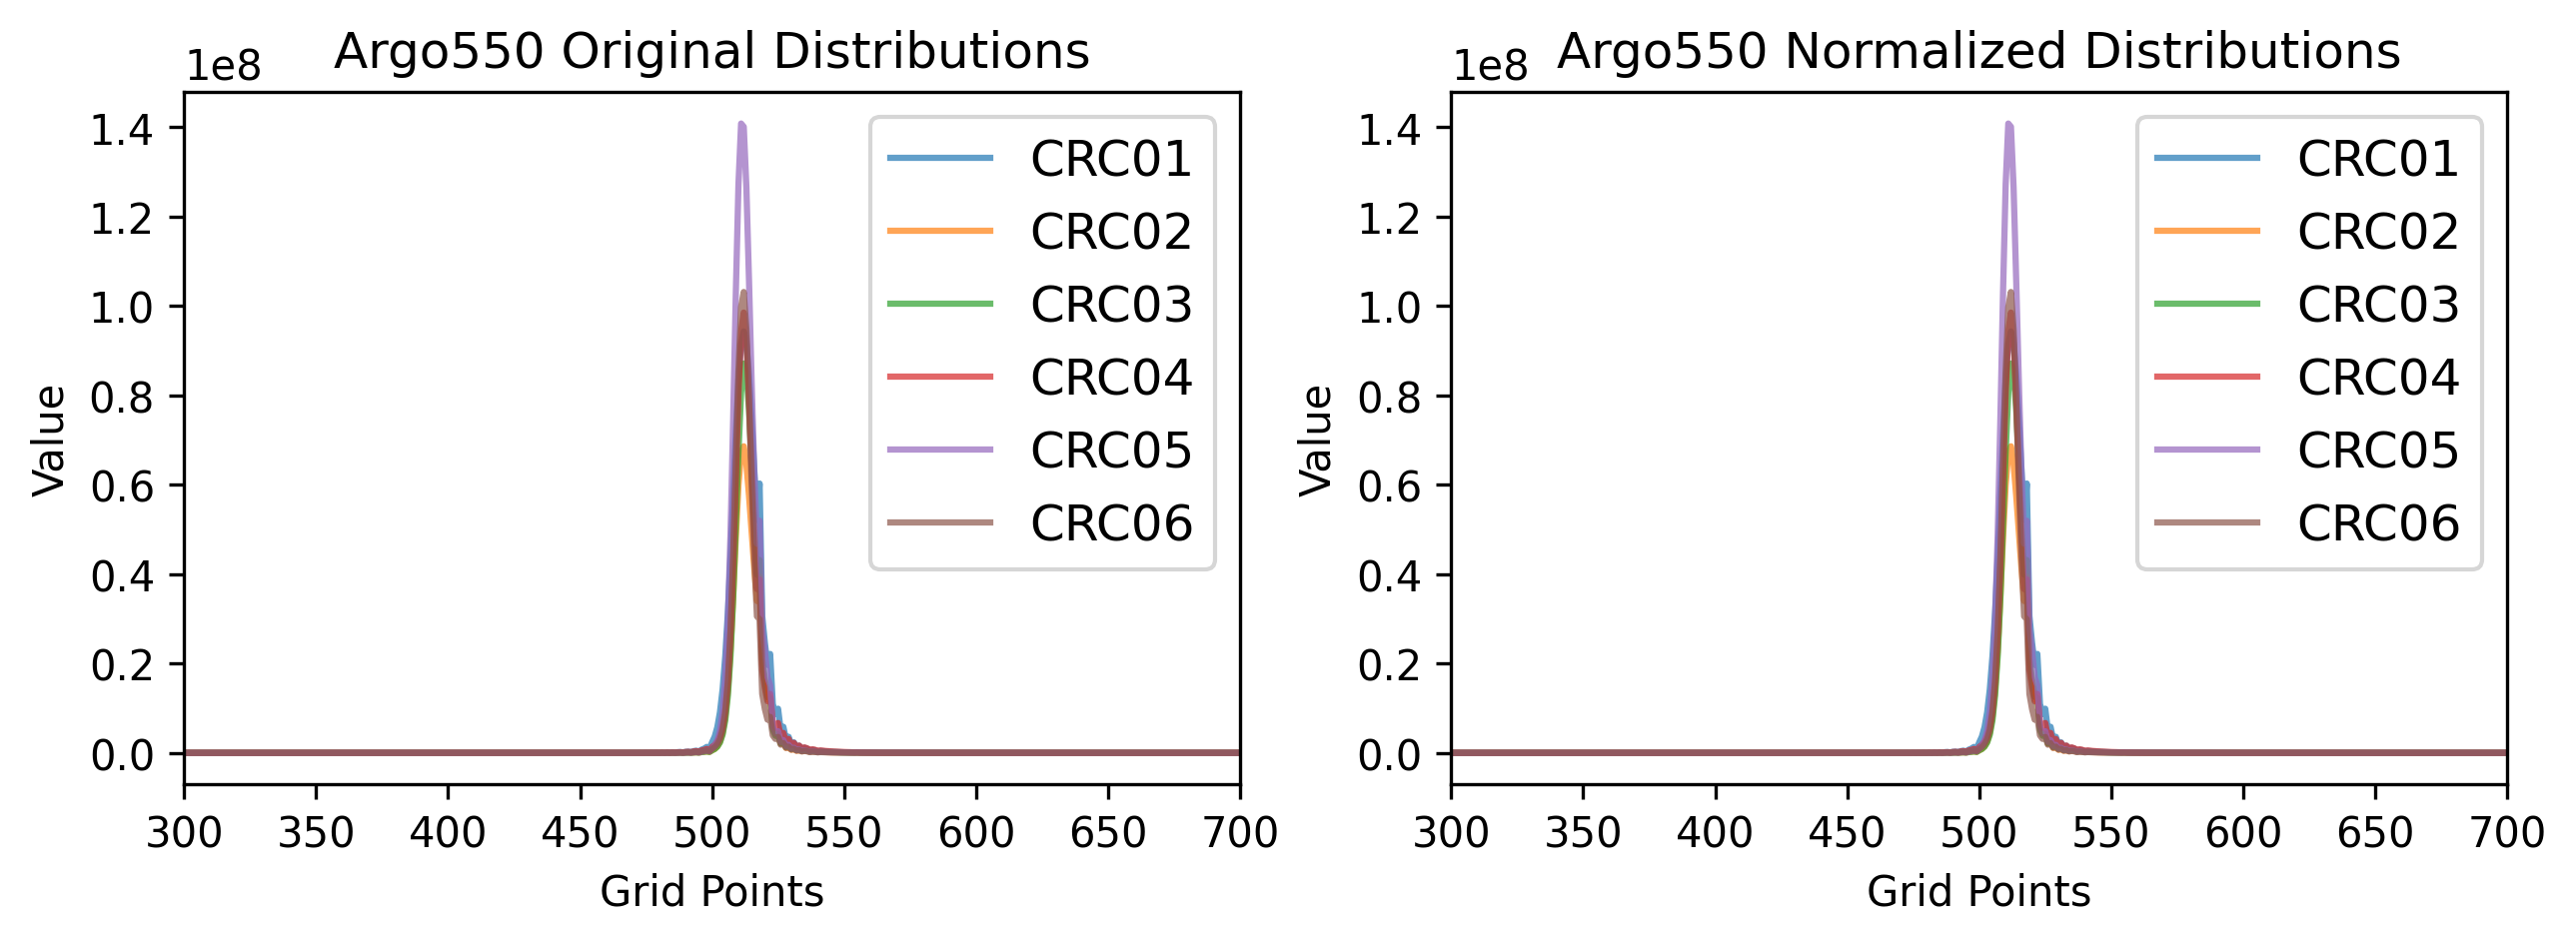

##### Metrics for original marker image #####
Argo550 Pearson Correlation Coefficients: ['1', '0.99525', '0.98647', '0.98522', '0.9821', '0.97137']
Argo550 Spearman Correlation Coefficients: ['1', '0.95897', '0.92534', '0.9769', '0.94103', '0.93515']
Argo550 KL Divergences: ['0', '0.023068', '0.045461', '0.02878', '0.049568', '0.07011'] 

##### Metrics for shifted marker image #####
Argo550 shifted Pearson Correlation Coefficients: ['1', '0.99525', '0.98647', '0.98522', '0.9821', '0.97137']
Argo550 shifted Spearman Correlation Coefficients: ['1', '0.95897', '0.92534', '0.9769', '0.94103', '0.93515']
Argo550 shifted KL Divergences: ['0', '0.023068', '0.045461', '0.02878', '0.049568', '0.07011'] 

Argo550 shifts_direct is: [0, 0, 0, 0, 0, 0]
Argo550 shifts_fft is:    [0, 0, 0, 0, 0, 0]

****************************** Processing marker CD4 ******************************
Reference sample for CD4 is CRC02


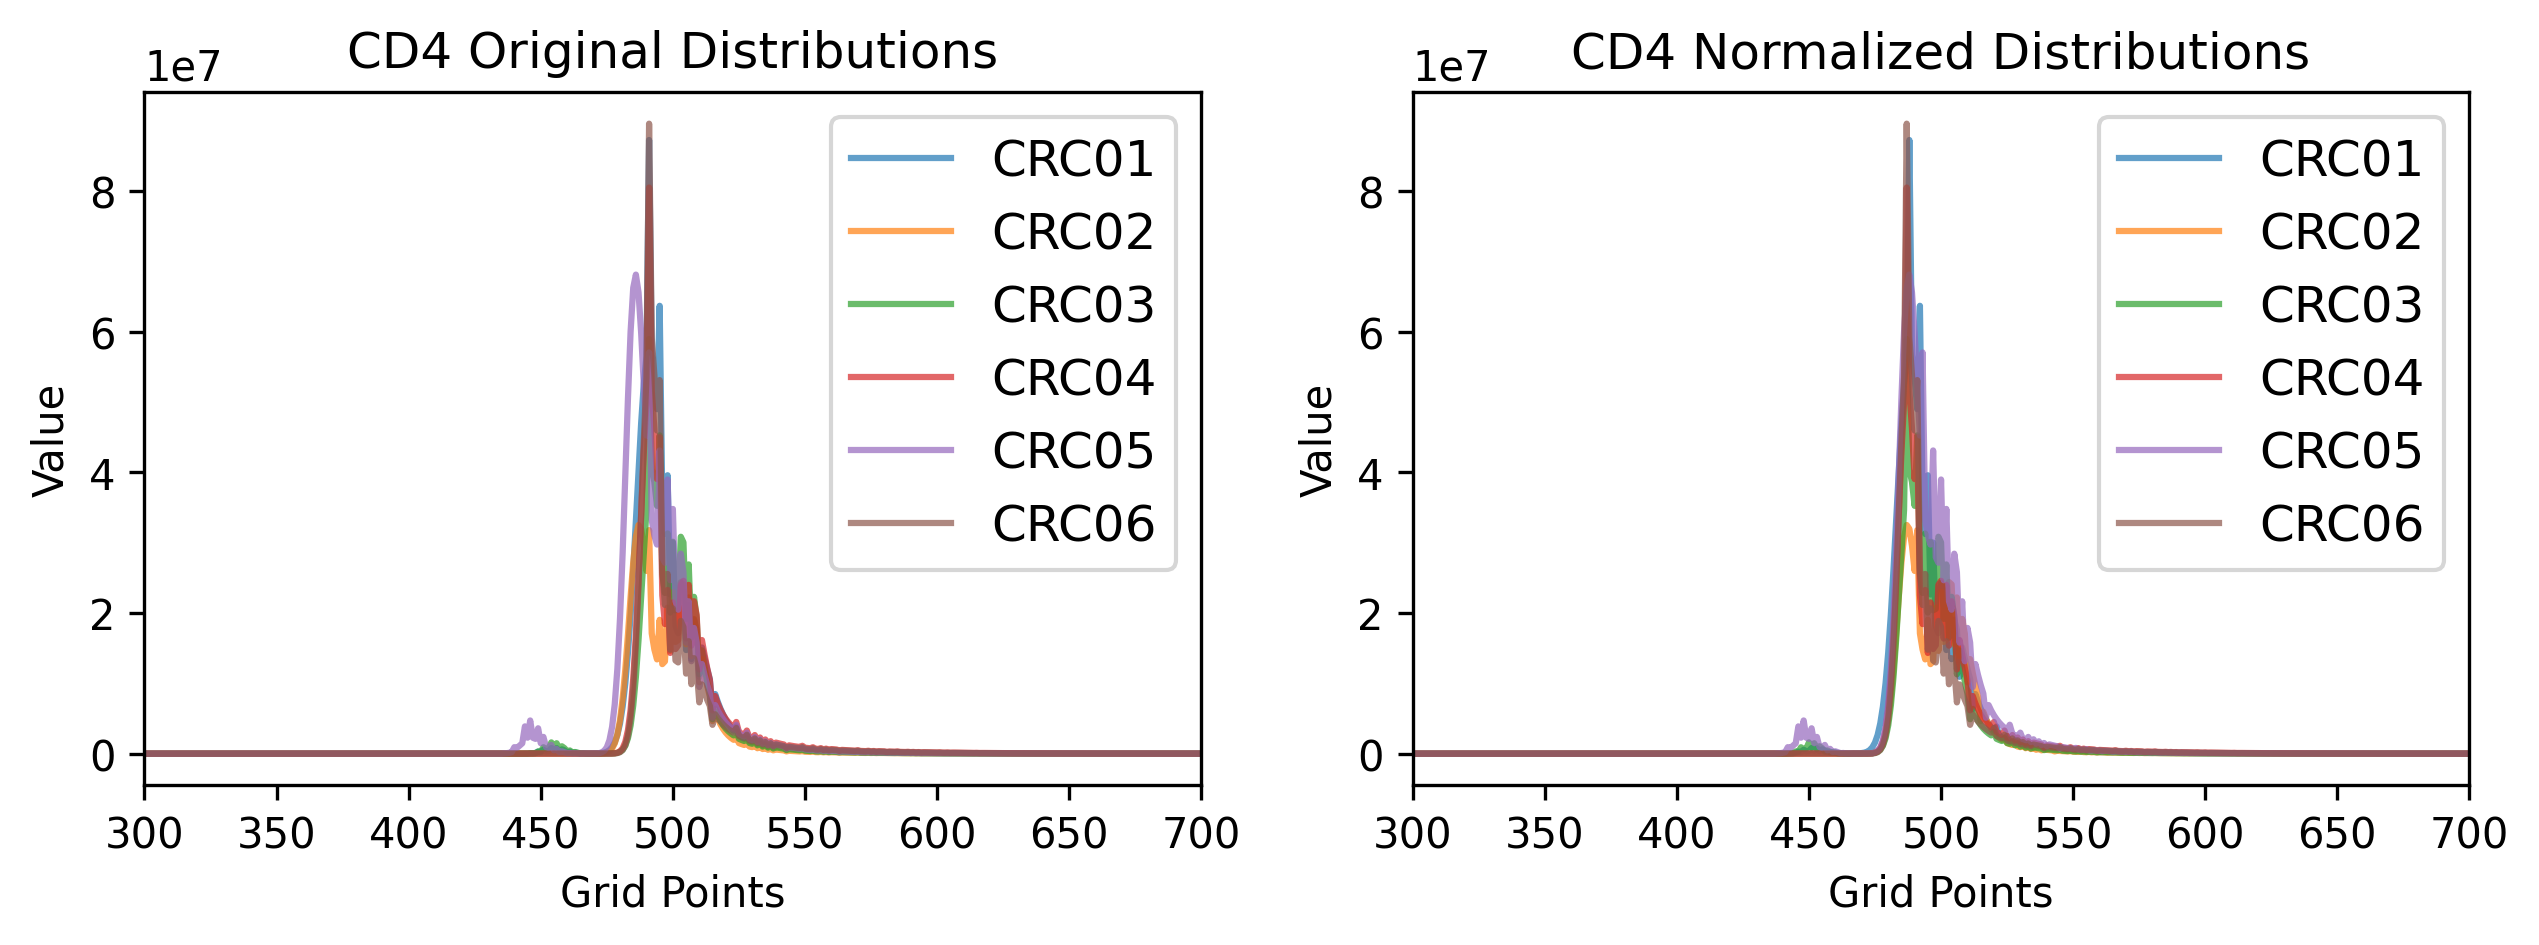

##### Metrics for original marker image #####
CD4 Pearson Correlation Coefficients: ['1', '0.89451', '0.95392', '0.97787', '0.87227', '0.97483']
CD4 Spearman Correlation Coefficients: ['1', '0.96343', '0.96947', '0.98618', '0.97612', '0.93946']
CD4 KL Divergences: ['0', '0.13532', '0.11344', '0.10282', '0.14912', '0.11793'] 

##### Metrics for shifted marker image #####
CD4 shifted Pearson Correlation Coefficients: ['1', '0.91844', '0.92622', '0.93159', '0.96467', '0.93056']
CD4 shifted Spearman Correlation Coefficients: ['1', '0.88762', '0.87596', '0.84752', '0.88751', '0.8504']
CD4 shifted KL Divergences: ['0', '0.13618', '0.1027', '0.1163', '0.073948', '0.12691'] 

CD4 shifts_direct is: [3, 0, 4, 4, -2, 4]
CD4 shifts_fft is:    [3, 0, 4, 4, -2, 4]

****************************** Processing marker FOXP3 ******************************
Reference sample for FOXP3 is CRC01


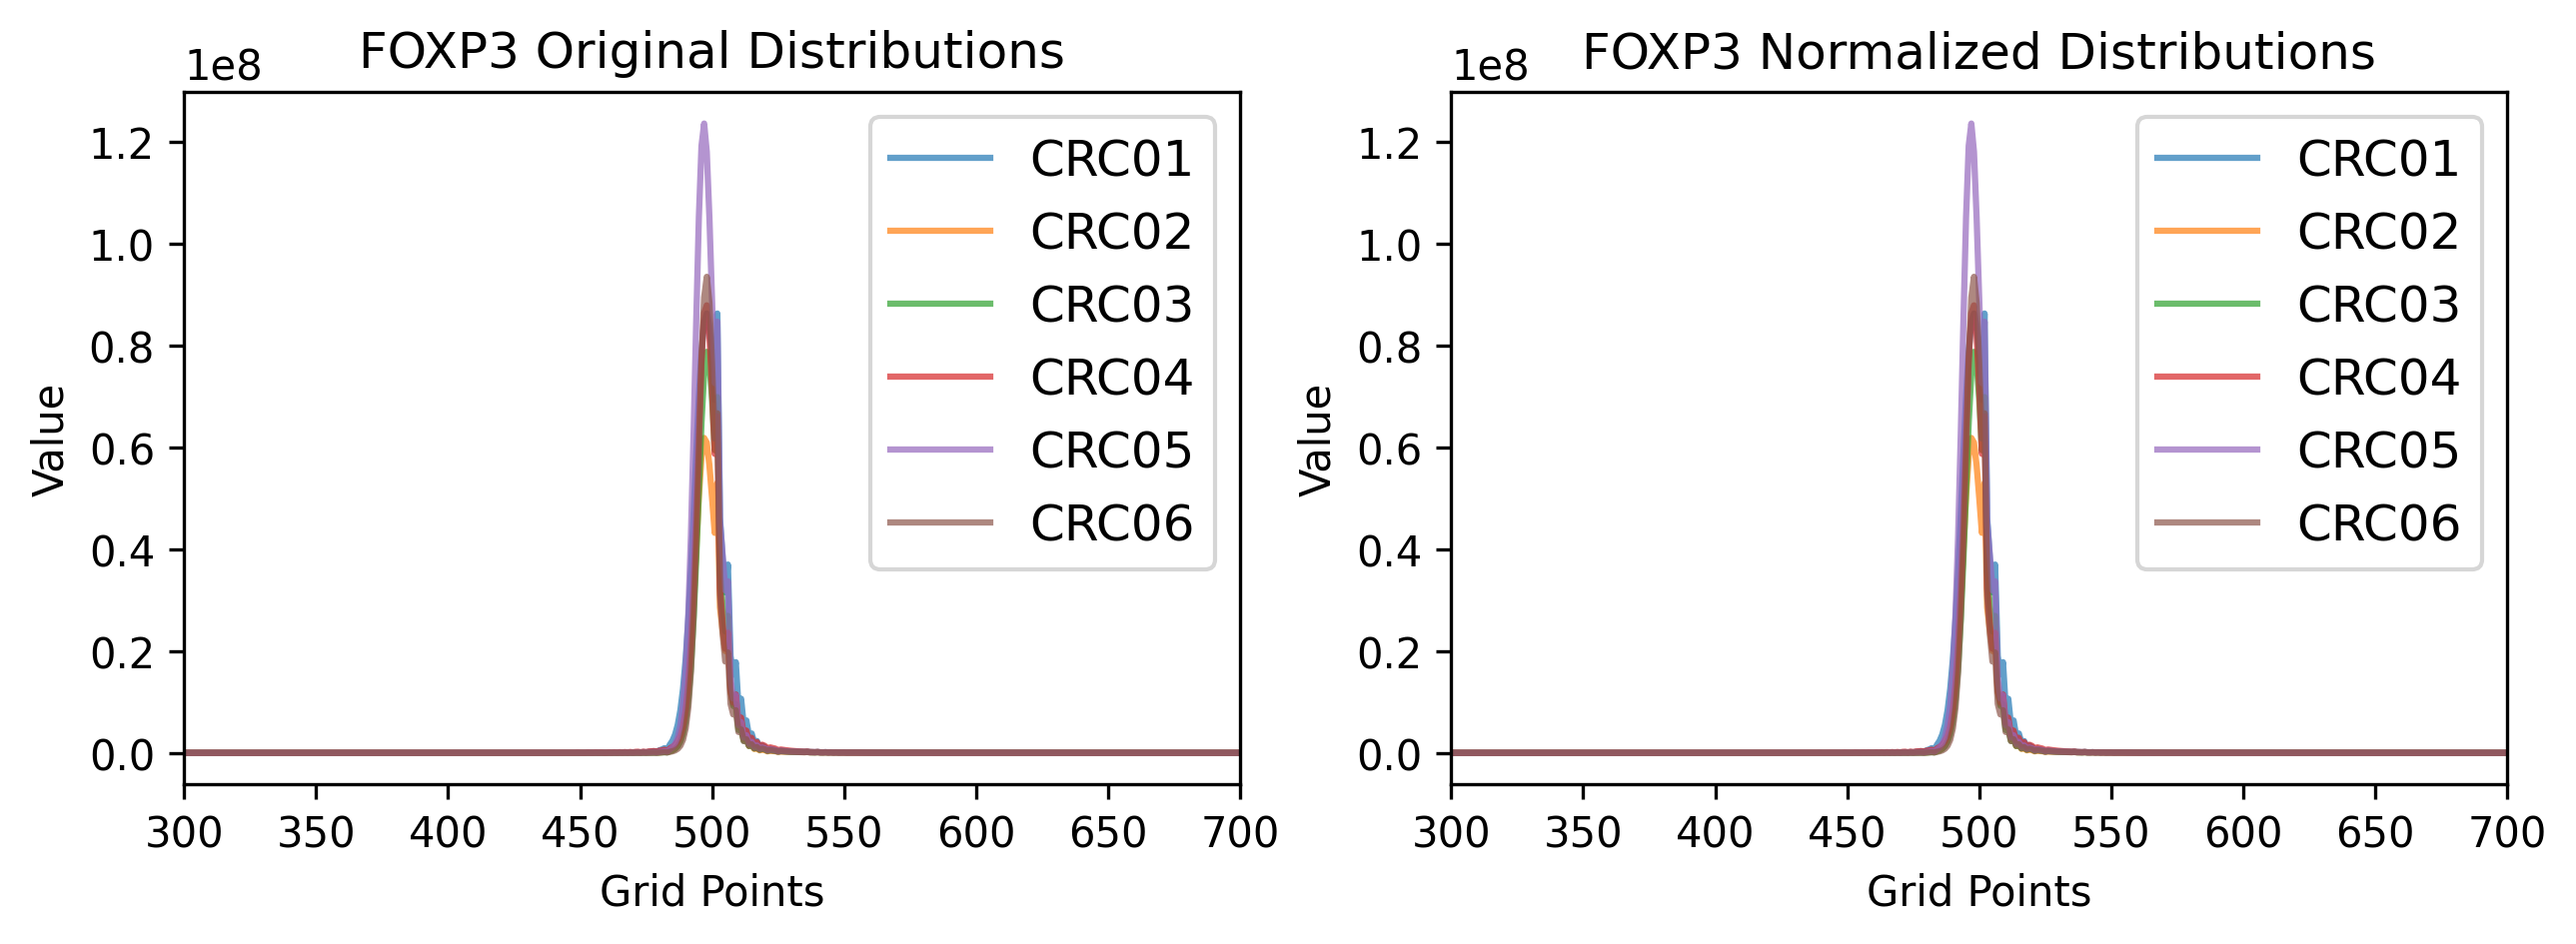

##### Metrics for original marker image #####
FOXP3 Pearson Correlation Coefficients: ['1', '0.99582', '0.98838', '0.98774', '0.98481', '0.97499']
FOXP3 Spearman Correlation Coefficients: ['1', '0.97011', '0.92838', '0.98243', '0.95332', '0.96561']
FOXP3 KL Divergences: ['0', '0.017383', '0.043943', '0.025925', '0.036767', '0.078997'] 

##### Metrics for shifted marker image #####
FOXP3 shifted Pearson Correlation Coefficients: ['1', '0.99582', '0.98838', '0.98774', '0.98481', '0.97499']
FOXP3 shifted Spearman Correlation Coefficients: ['1', '0.97011', '0.92838', '0.98243', '0.95332', '0.96561']
FOXP3 shifted KL Divergences: ['0', '0.017383', '0.043943', '0.025925', '0.036767', '0.078997'] 

FOXP3 shifts_direct is: [0, 0, 0, 0, 0, 0]
FOXP3 shifts_fft is:    [0, 0, 0, 0, 0, 0]

****************************** Processing marker CD8a ******************************
Reference sample for CD8a is CRC02


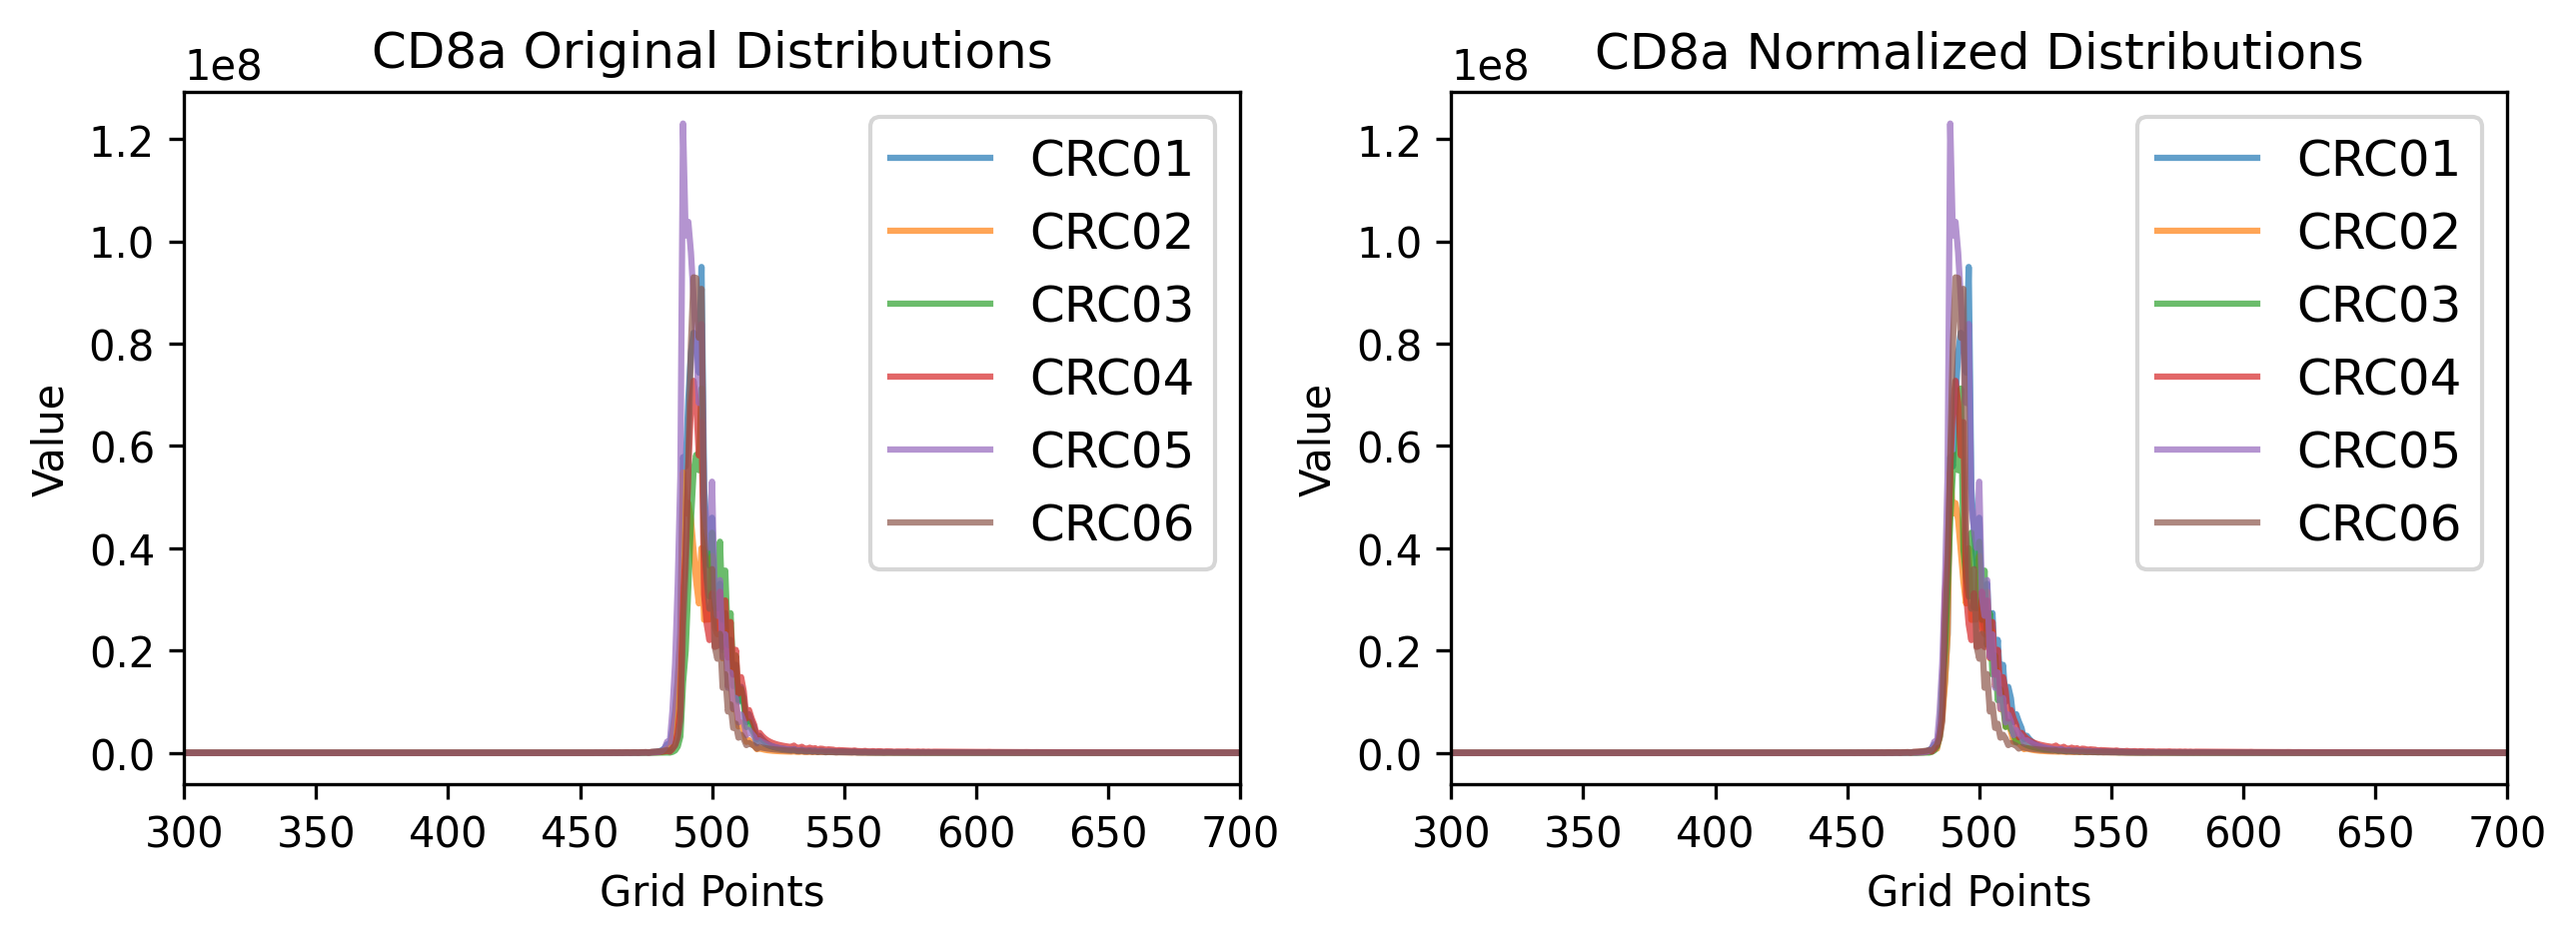

##### Metrics for original marker image #####
CD8a Pearson Correlation Coefficients: ['1', '0.95035', '0.94588', '0.98214', '0.95238', '0.96762']
CD8a Spearman Correlation Coefficients: ['1', '0.9784', '0.96335', '0.98315', '0.98076', '0.97905']
CD8a KL Divergences: ['0', '0.057535', '0.13358', '0.055721', '0.061493', '0.093477'] 

##### Metrics for shifted marker image #####
CD8a shifted Pearson Correlation Coefficients: ['1', '0.95035', '0.93743', '0.91594', '0.95238', '0.90977']
CD8a shifted Spearman Correlation Coefficients: ['1', '0.9784', '0.90365', '0.90009', '0.98076', '0.90698']
CD8a shifted KL Divergences: ['0', '0.057535', '0.07901', '0.10772', '0.061493', '0.17257'] 

CD8a shifts_direct is: [0, 0, 3, 2, 0, 2]
CD8a shifts_fft is:    [0, 0, 3, 2, 0, 2]

****************************** Processing marker CD45RO ******************************
Reference sample for CD45RO is CRC01


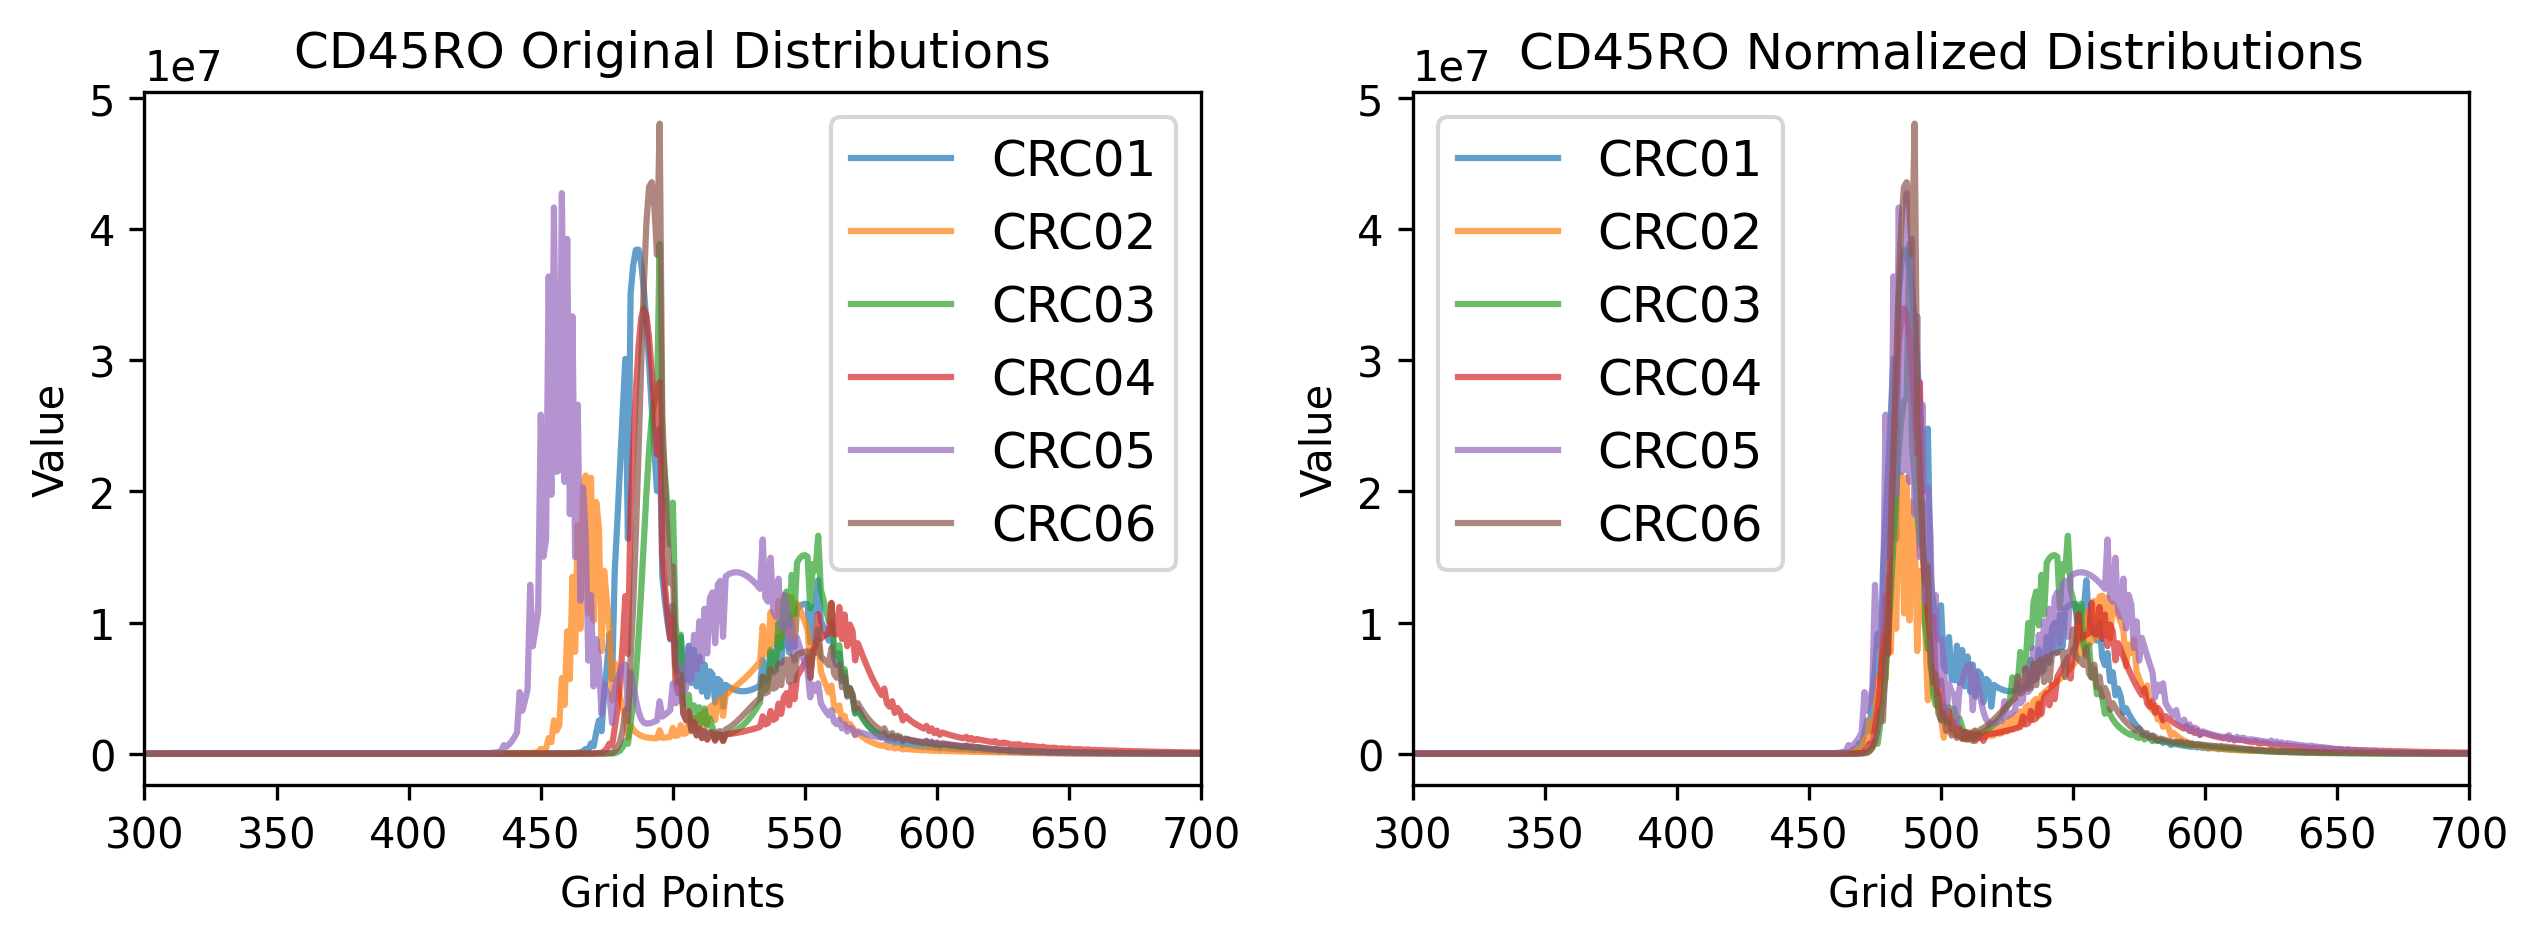

##### Metrics for original marker image #####
CD45RO Pearson Correlation Coefficients: ['1', '0.35622', '0.71324', '0.90769', '0.266', '0.79515']
CD45RO Spearman Correlation Coefficients: ['1', '0.97954', '0.96101', '0.97398', '0.97144', '0.96906']
CD45RO KL Divergences: ['0', '1.0429', '0.74054', '0.28721', '1.1562', '0.47985'] 

##### Metrics for shifted marker image #####
CD45RO shifted Pearson Correlation Coefficients: ['1', '0.86868', '0.91173', '0.94511', '0.91246', '0.93994']
CD45RO shifted Spearman Correlation Coefficients: ['1', '0.90253', '0.9082', '0.90799', '0.88892', '0.91041']
CD45RO shifted KL Divergences: ['0', '0.21403', '0.17067', '0.18959', '0.15924', '0.14042'] 

CD45RO shifts_direct is: [0, -18, 7, 3, -29, 5]
CD45RO shifts_fft is:    [0, -18, 7, 3, -29, 5]

****************************** Processing marker CD20 ******************************
Reference sample for CD20 is CRC01


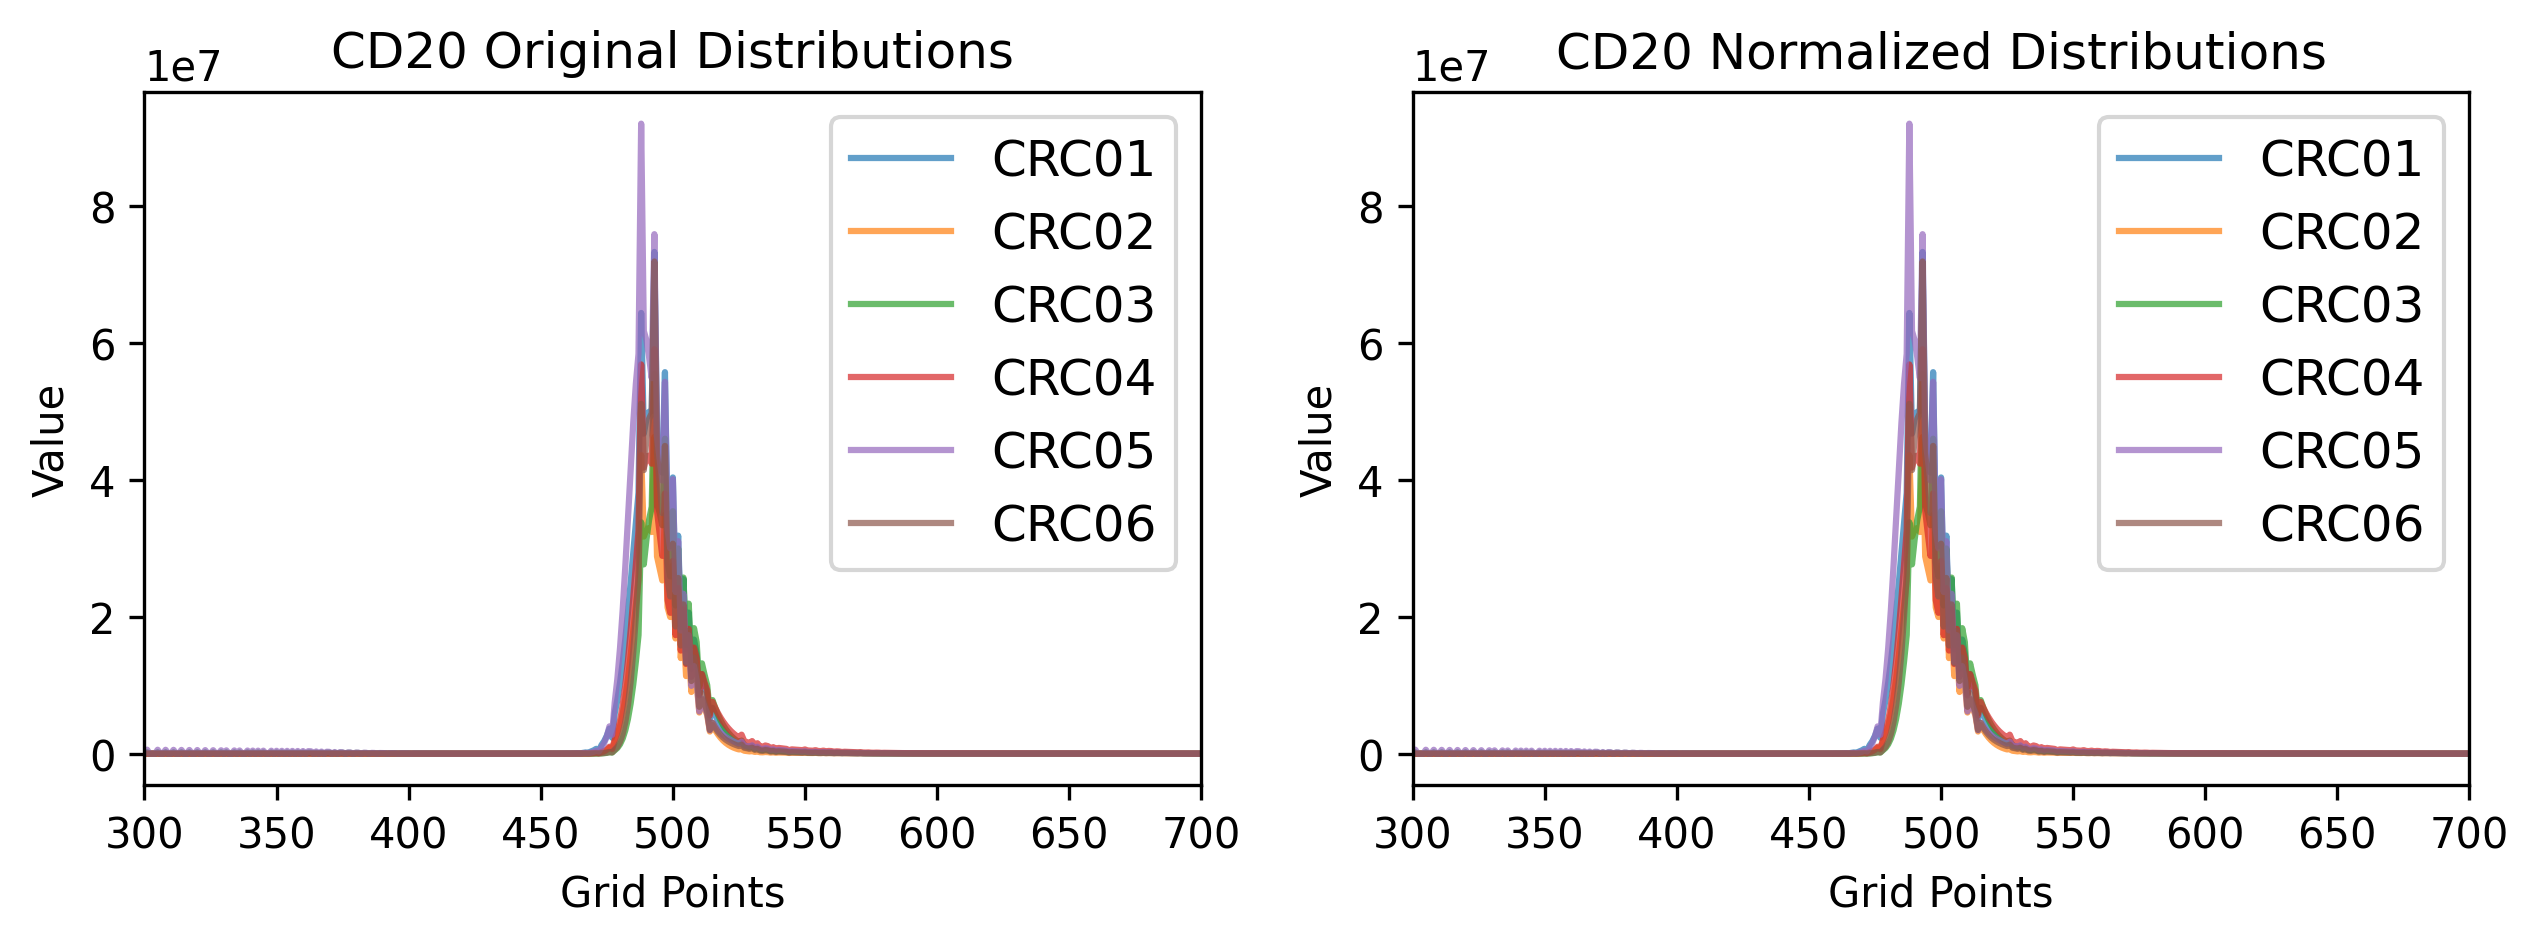

##### Metrics for original marker image #####
CD20 Pearson Correlation Coefficients: ['1', '0.99722', '0.96351', '0.9927', '0.97924', '0.98259']
CD20 Spearman Correlation Coefficients: ['1', '0.92187', '0.99082', '0.93553', '0.99211', '0.8768']
CD20 KL Divergences: ['0', '0.038992', '0.12171', '0.069793', '0.042148', '0.10724'] 

##### Metrics for shifted marker image #####
CD20 shifted Pearson Correlation Coefficients: ['1', '0.99722', '0.96351', '0.9927', '0.97924', '0.98259']
CD20 shifted Spearman Correlation Coefficients: ['1', '0.92187', '0.99082', '0.93553', '0.99211', '0.8768']
CD20 shifted KL Divergences: ['0', '0.038992', '0.12171', '0.069793', '0.042148', '0.10724'] 

CD20 shifts_direct is: [0, 0, 0, 0, 0, 0]
CD20 shifts_fft is:    [0, 0, 0, 0, 0, 0]

****************************** Processing marker PD-L1 ******************************
Reference sample for PD-L1 is CRC01


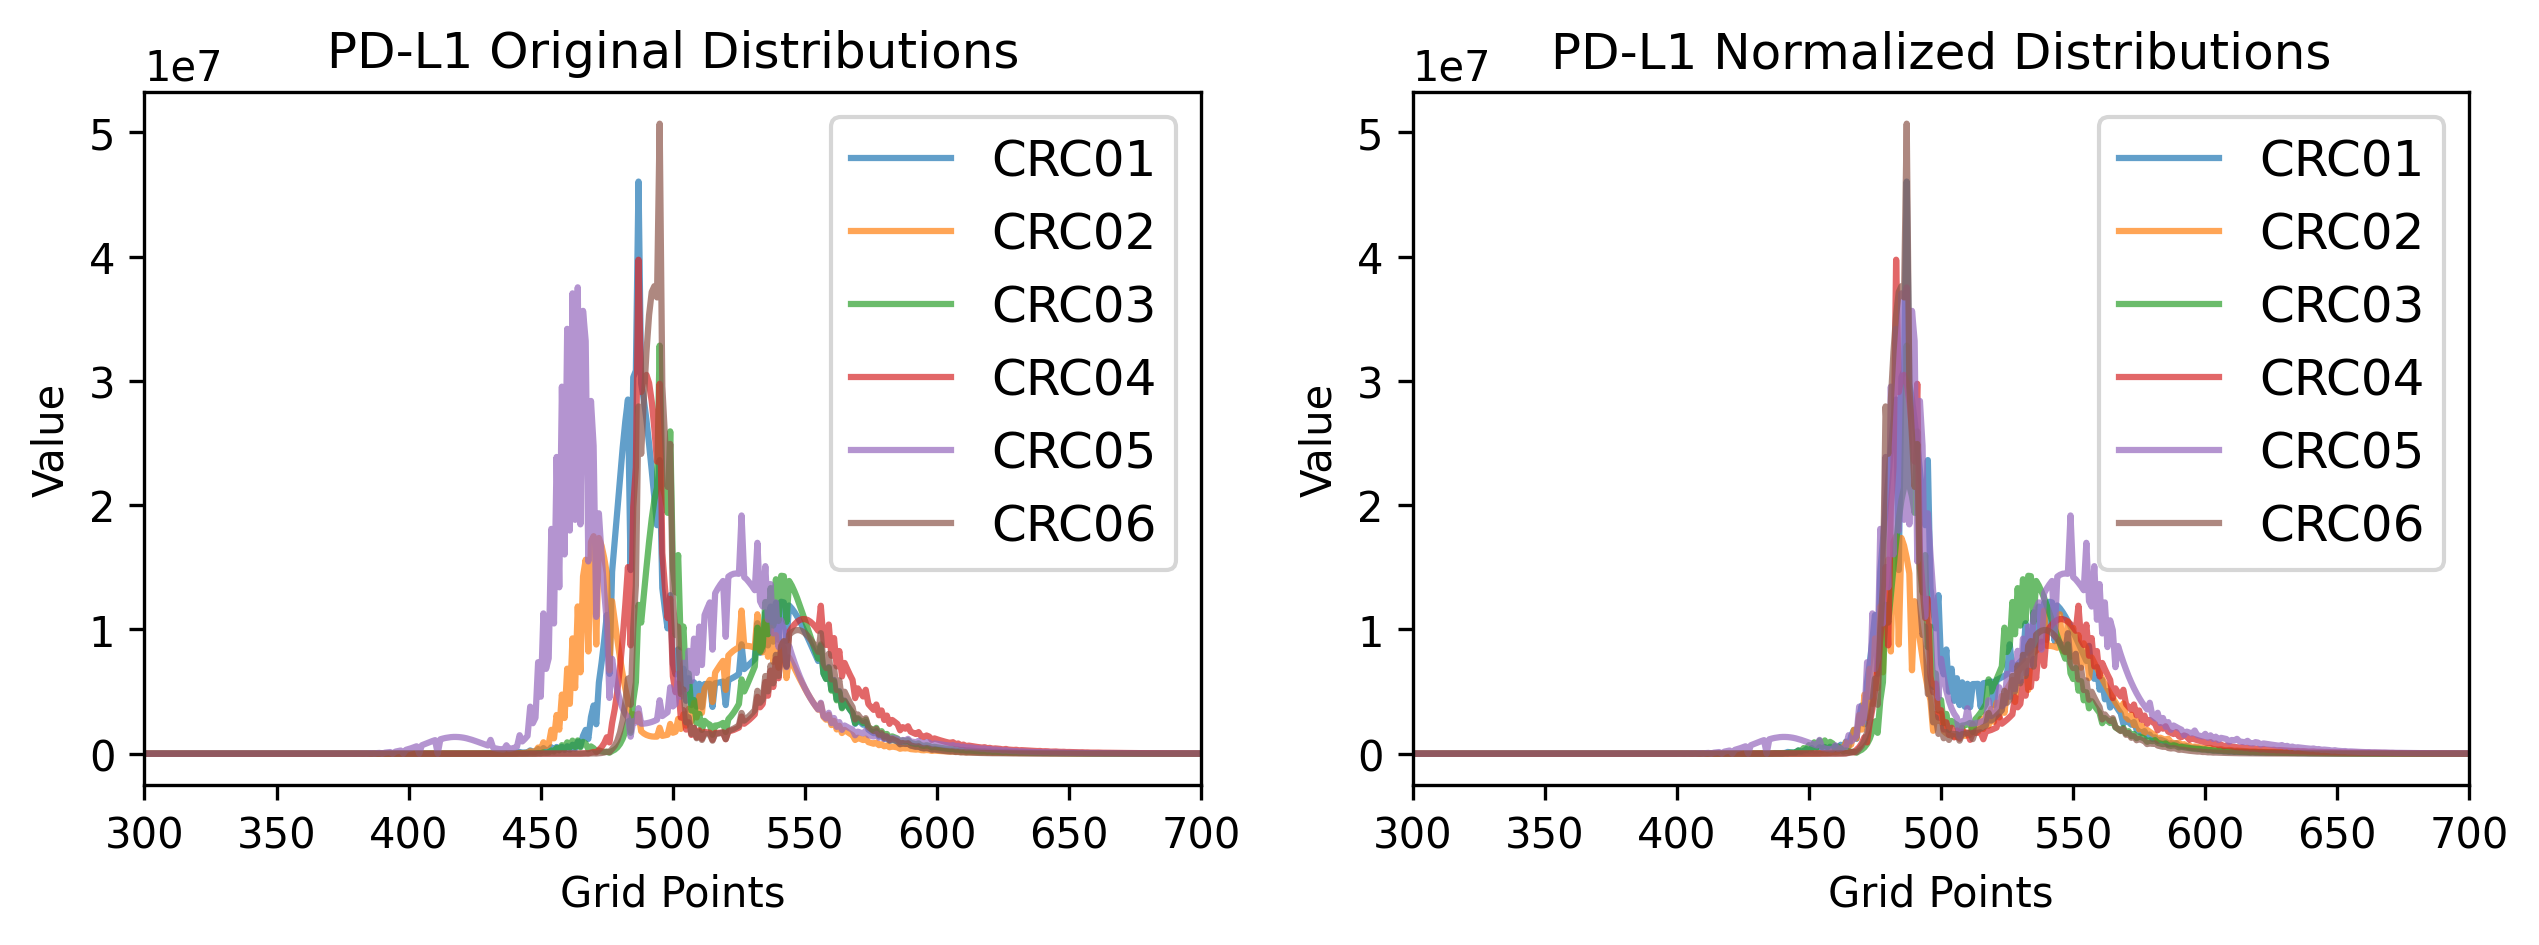

##### Metrics for original marker image #####
PD-L1 Pearson Correlation Coefficients: ['1', '0.52993', '0.72606', '0.90472', '0.3386', '0.77529']
PD-L1 Spearman Correlation Coefficients: ['1', '0.97688', '0.96291', '0.97763', '0.96513', '0.94483']
PD-L1 KL Divergences: ['0', '0.65505', '0.5442', '0.28719', '1.0121', '0.52417'] 

##### Metrics for shifted marker image #####
PD-L1 shifted Pearson Correlation Coefficients: ['1', '0.91221', '0.93027', '0.9329', '0.93355', '0.9247']
PD-L1 shifted Spearman Correlation Coefficients: ['1', '0.89619', '0.84552', '0.89659', '0.88938', '0.83536']
PD-L1 shifted KL Divergences: ['0', '0.12586', '0.11938', '0.16893', '0.13811', '0.15959'] 

PD-L1 shifts_direct is: [0, -13, 8, 4, -23, 8]
PD-L1 shifts_fft is:    [0, -13, 8, 4, -23, 8]

****************************** Processing marker CD3e ******************************
Reference sample for CD3e is CRC02


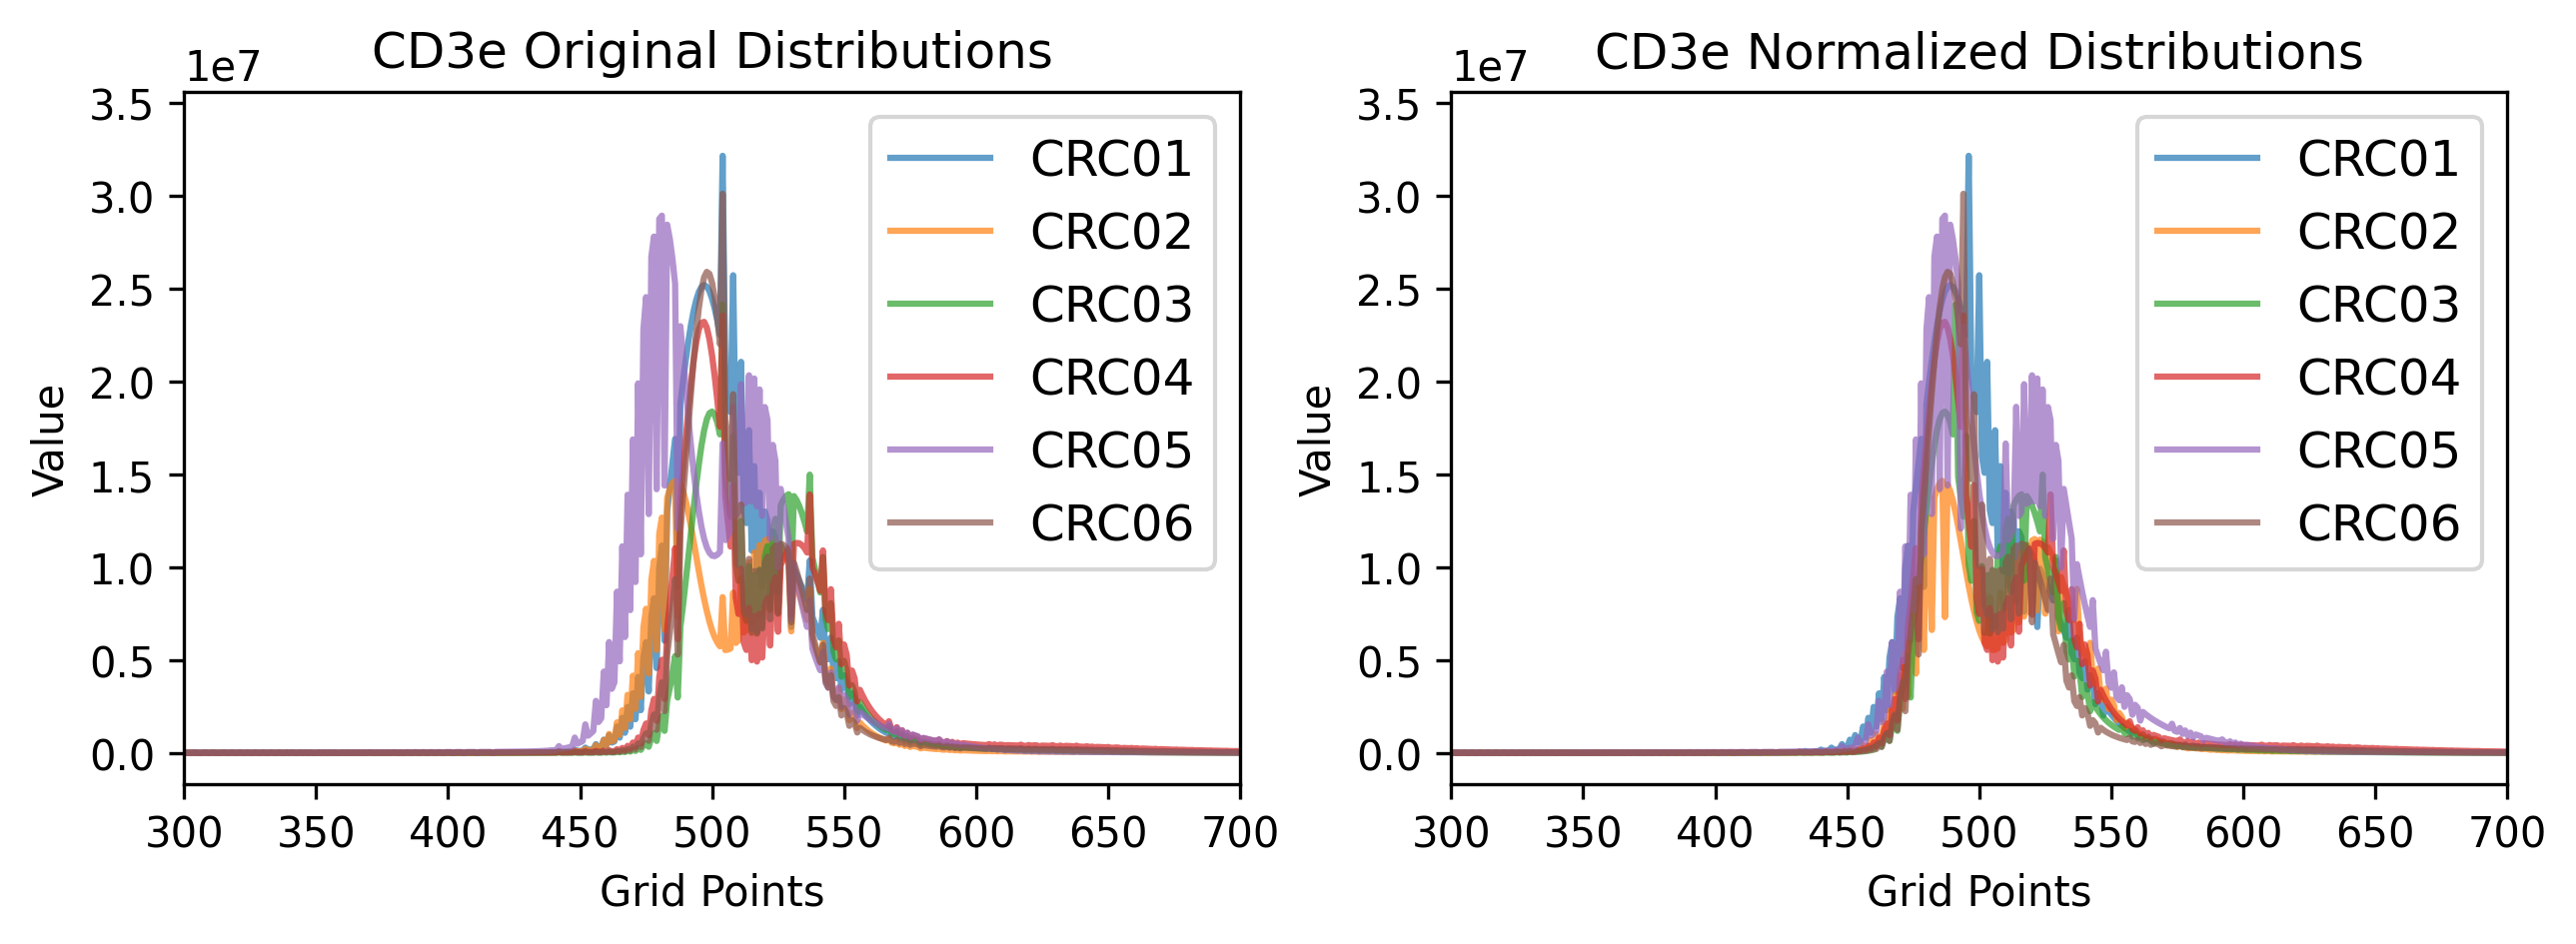

##### Metrics for original marker image #####
CD3e Pearson Correlation Coefficients: ['1', '0.8794', '0.92401', '0.95927', '0.80013', '0.97243']
CD3e Spearman Correlation Coefficients: ['1', '0.96428', '0.9777', '0.97492', '0.96977', '0.97911']
CD3e KL Divergences: ['0', '0.1273', '0.17814', '0.095911', '0.22327', '0.082687'] 

##### Metrics for shifted marker image #####
CD3e shifted Pearson Correlation Coefficients: ['1', '0.90396', '0.9302', '0.93254', '0.90894', '0.95061']
CD3e shifted Spearman Correlation Coefficients: ['1', '0.80965', '0.82155', '0.85044', '0.81298', '0.84628']
CD3e shifted KL Divergences: ['0', '0.14167', '0.12036', '0.12775', '0.12499', '0.10923'] 

CD3e shifts_direct is: [8, 0, 13, 10, -6, 10]
CD3e shifts_fft is:    [8, 0, 13, 10, -6, 10]

****************************** Processing marker CD163 ******************************
Reference sample for CD163 is CRC05


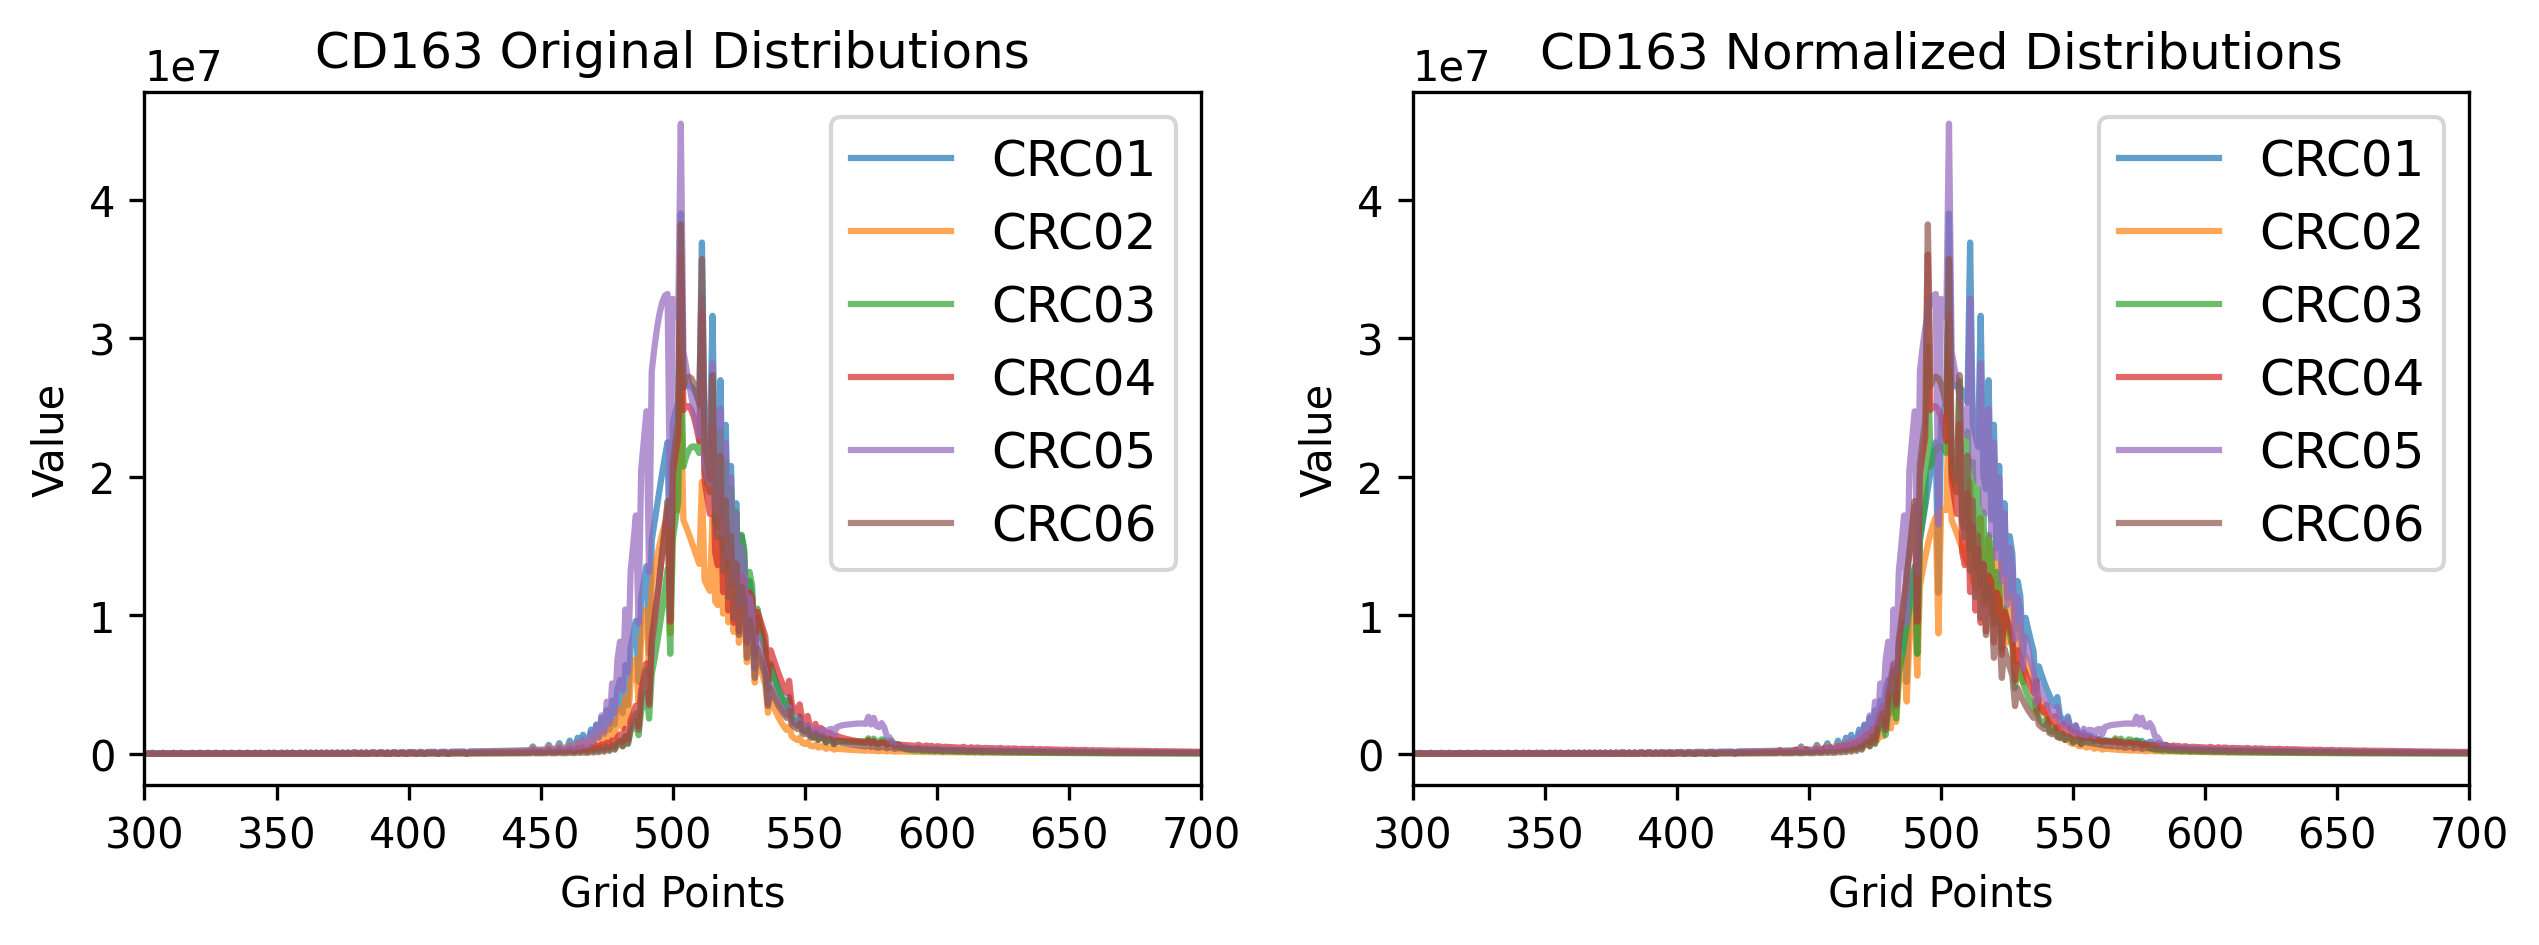

##### Metrics for original marker image #####
CD163 Pearson Correlation Coefficients: ['1', '0.98974', '0.97251', '0.983', '0.96623', '0.98111']
CD163 Spearman Correlation Coefficients: ['1', '0.99001', '0.97456', '0.98029', '0.98951', '0.96508']
CD163 KL Divergences: ['0', '0.017413', '0.097224', '0.062624', '0.042356', '0.097604'] 

##### Metrics for shifted marker image #####
CD163 shifted Pearson Correlation Coefficients: ['1', '0.98974', '0.94546', '0.9036', '0.96623', '0.89082']
CD163 shifted Spearman Correlation Coefficients: ['1', '0.99001', '0.83724', '0.86274', '0.98951', '0.86908']
CD163 shifted KL Divergences: ['0', '0.017413', '0.11197', '0.13708', '0.042356', '0.18427'] 

CD163 shifts_direct is: [0, 0, 8, 8, 0, 8]
CD163 shifts_fft is:    [0, 0, 8, 8, 0, 8]

****************************** Processing marker E-cadherin ******************************
Reference sample for E-cadherin is CRC01


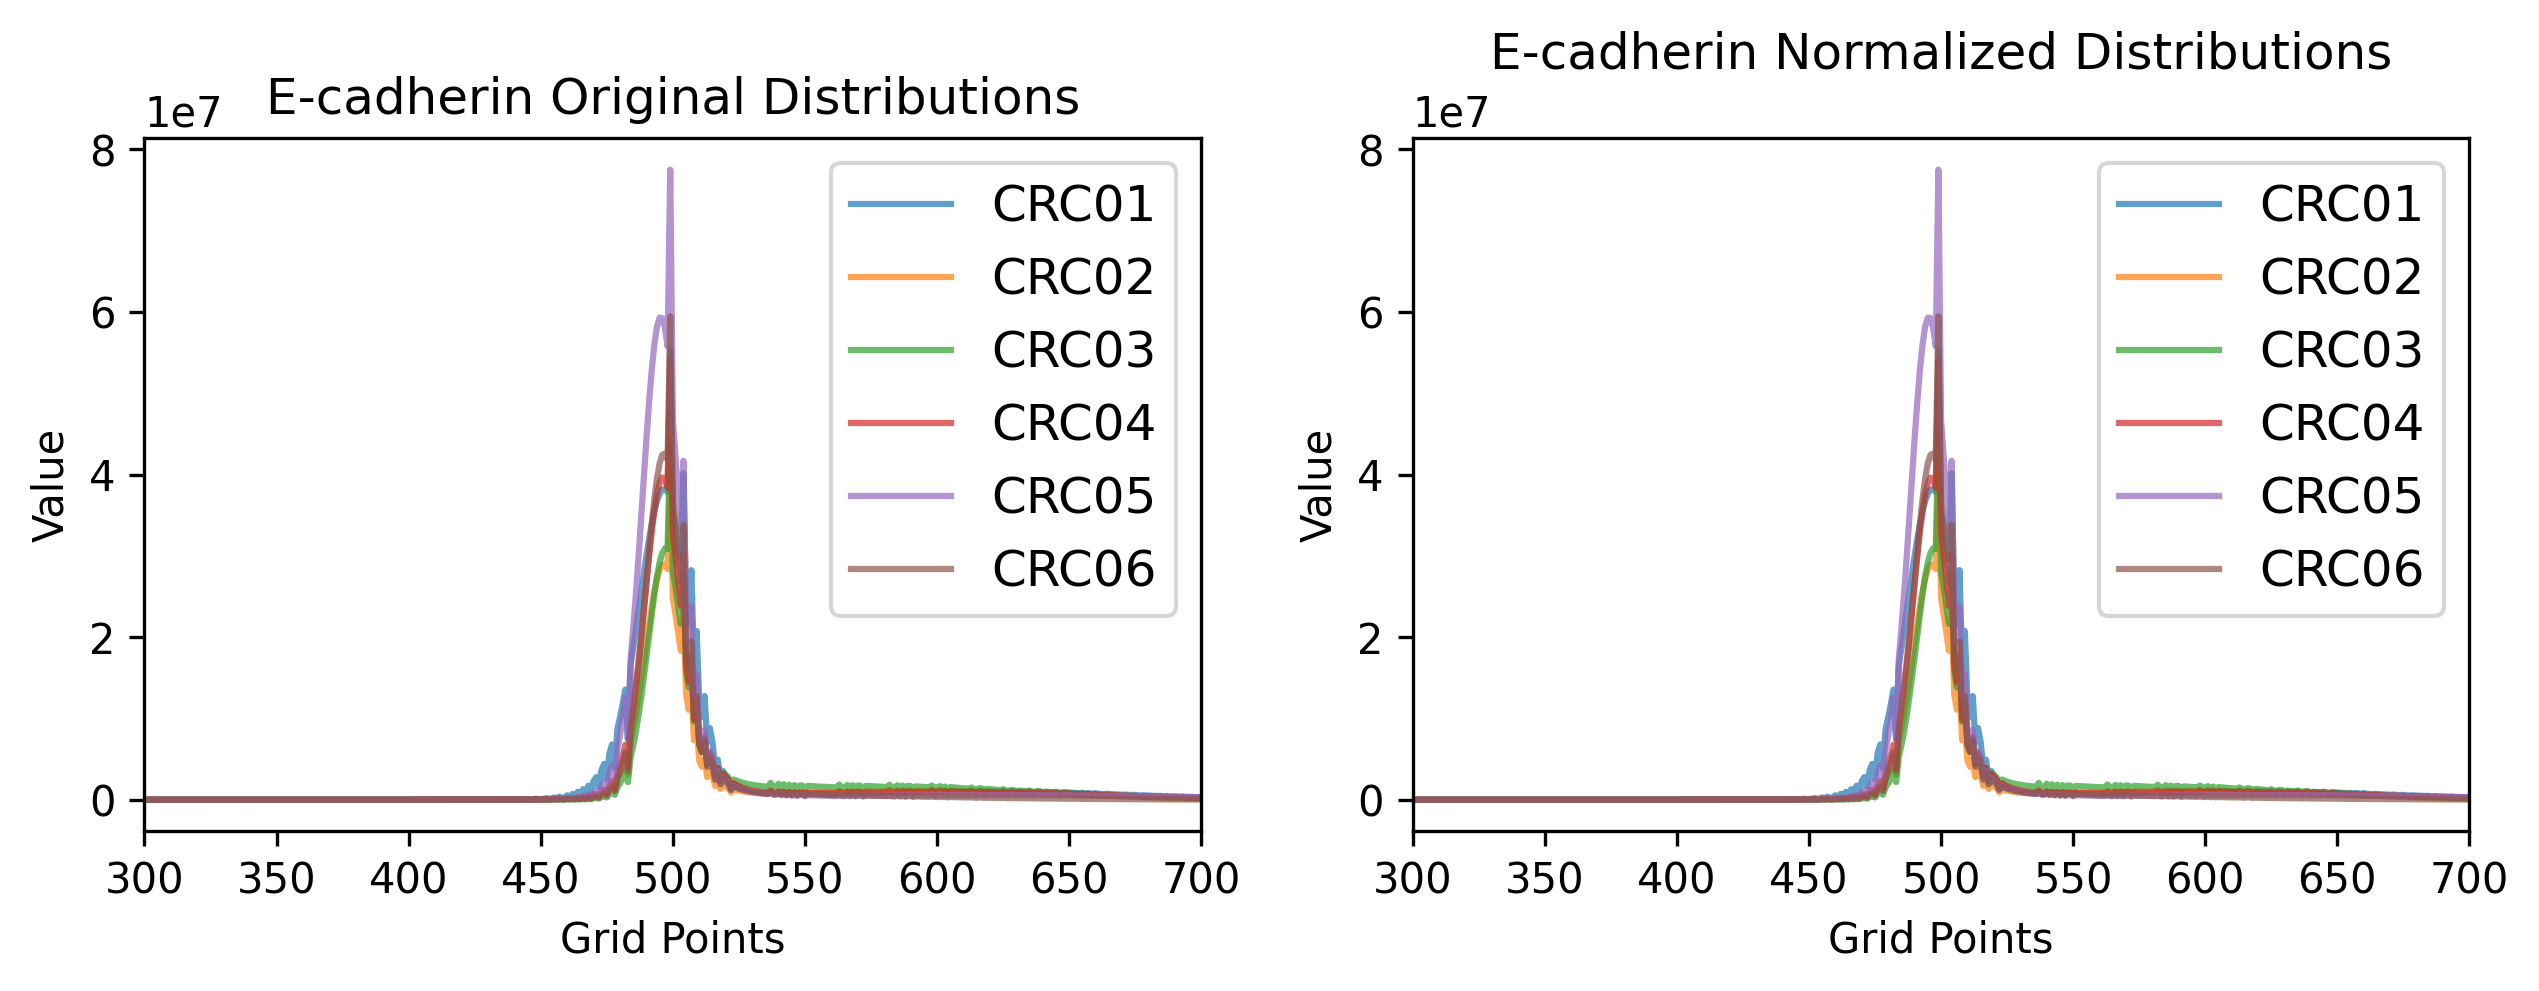

##### Metrics for original marker image #####
E-cadherin Pearson Correlation Coefficients: ['1', '0.98386', '0.9741', '0.98327', '0.97389', '0.97838']
E-cadherin Spearman Correlation Coefficients: ['1', '0.98513', '0.96976', '0.97675', '0.9789', '0.97342']
E-cadherin KL Divergences: ['0', '0.05454', '0.14039', '0.044687', '0.073606', '0.14116'] 

##### Metrics for shifted marker image #####
E-cadherin shifted Pearson Correlation Coefficients: ['1', '0.98386', '0.9741', '0.98327', '0.97389', '0.97838']
E-cadherin shifted Spearman Correlation Coefficients: ['1', '0.98513', '0.96976', '0.97675', '0.9789', '0.97342']
E-cadherin shifted KL Divergences: ['0', '0.05454', '0.14039', '0.044687', '0.073606', '0.14116'] 

E-cadherin shifts_direct is: [0, 0, 0, 0, 0, 0]
E-cadherin shifts_fft is:    [0, 0, 0, 0, 0, 0]

****************************** Processing marker PD-1 ******************************
Reference sample for PD-1 is CRC01


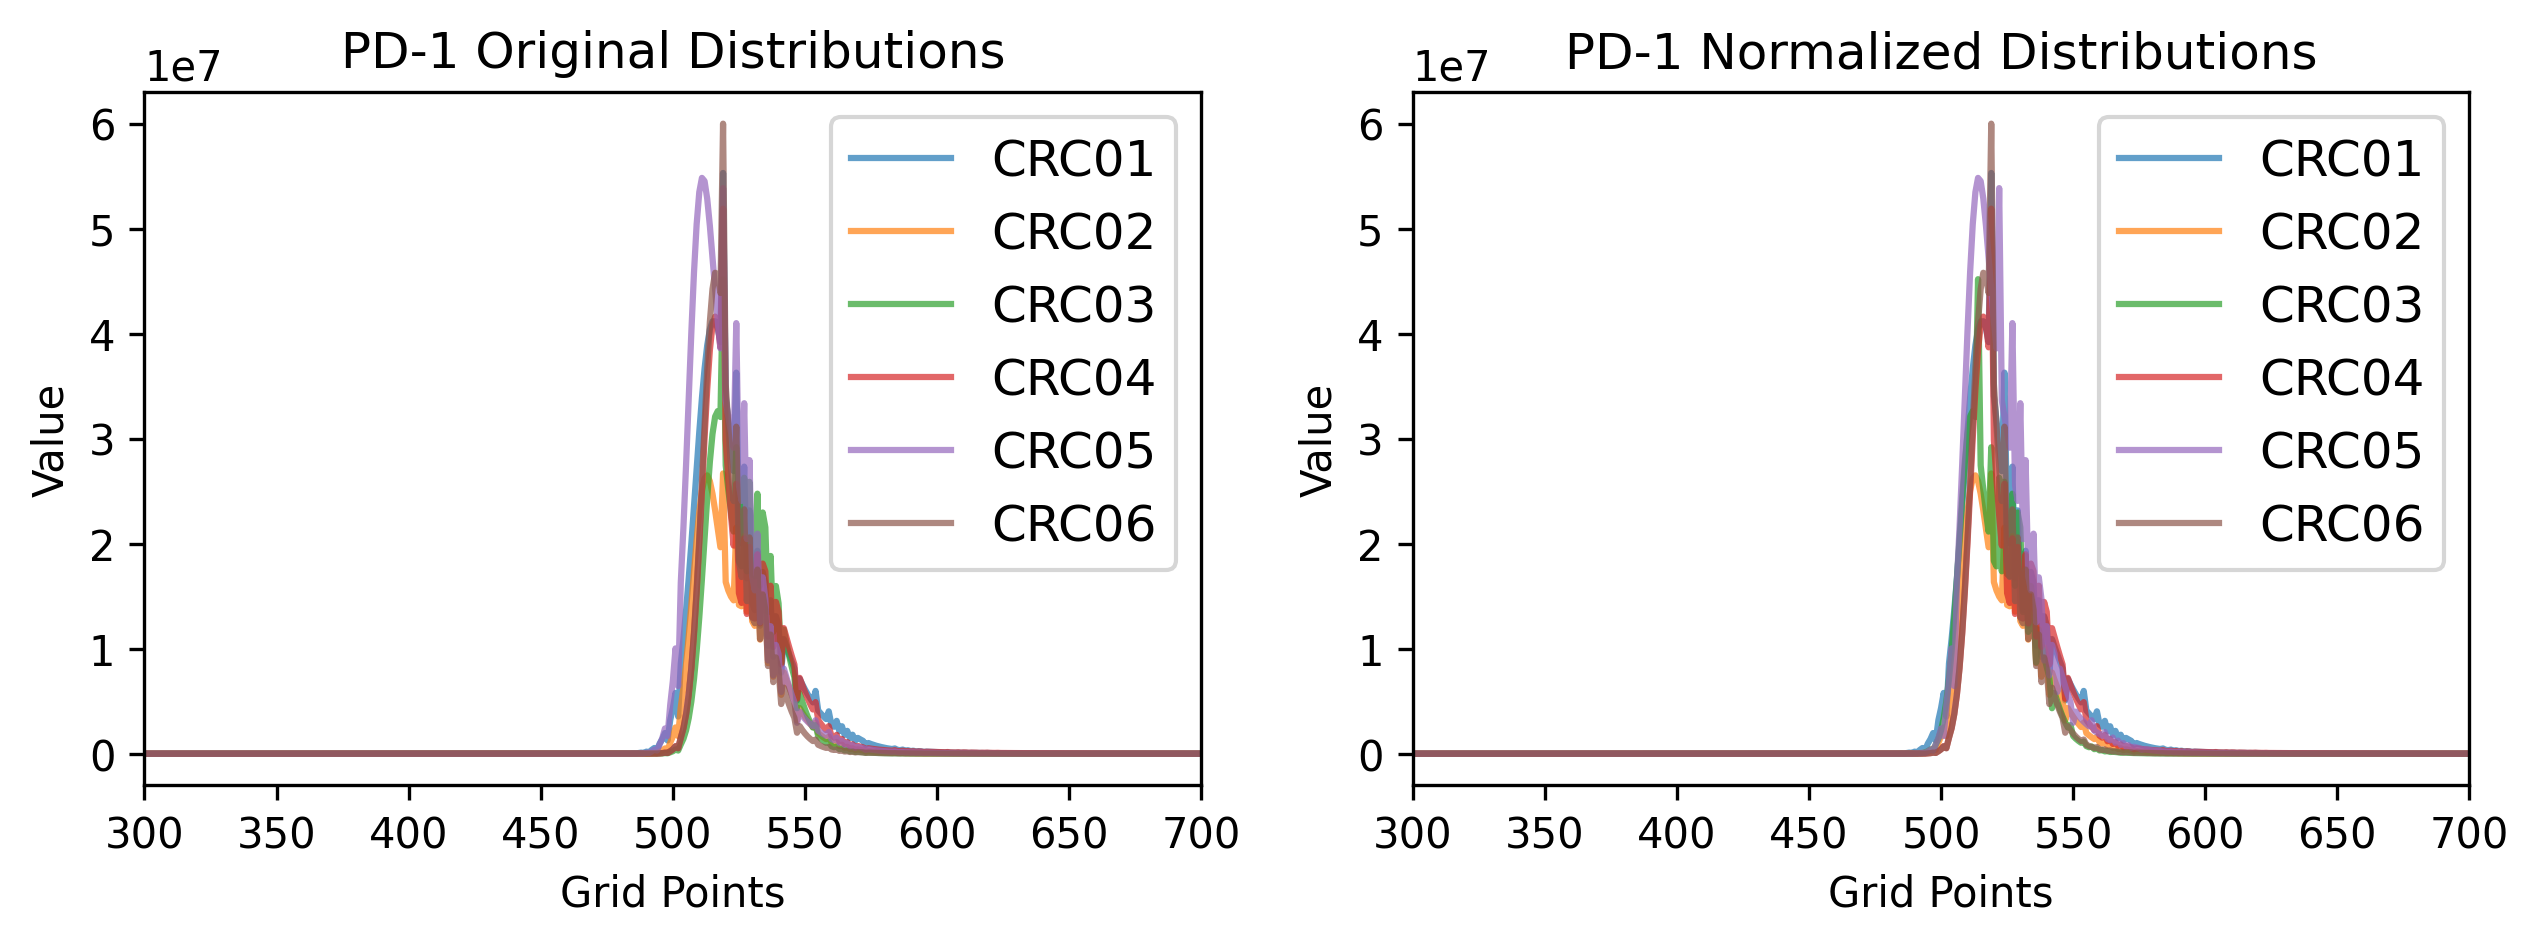

##### Metrics for original marker image #####
PD-1 Pearson Correlation Coefficients: ['1', '0.9811', '0.9503', '0.9786', '0.96638', '0.9722']
PD-1 Spearman Correlation Coefficients: ['1', '0.96217', '0.97989', '0.98932', '0.97471', '0.97598']
PD-1 KL Divergences: ['0', '0.03471', '0.17299', '0.075319', '0.063935', '0.14772'] 

##### Metrics for shifted marker image #####
PD-1 shifted Pearson Correlation Coefficients: ['1', '0.9811', '0.96101', '0.9786', '0.97547', '0.9722']
PD-1 shifted Spearman Correlation Coefficients: ['1', '0.96217', '0.8806', '0.98932', '0.86841', '0.97598']
PD-1 shifted KL Divergences: ['0', '0.03471', '0.12052', '0.075319', '0.054698', '0.14772'] 

PD-1 shifts_direct is: [0, 0, 5, 0, -3, 0]
PD-1 shifts_fft is:    [0, 0, 5, 0, -3, 0]

****************************** Processing marker Ki67 ******************************
Reference sample for Ki67 is CRC02


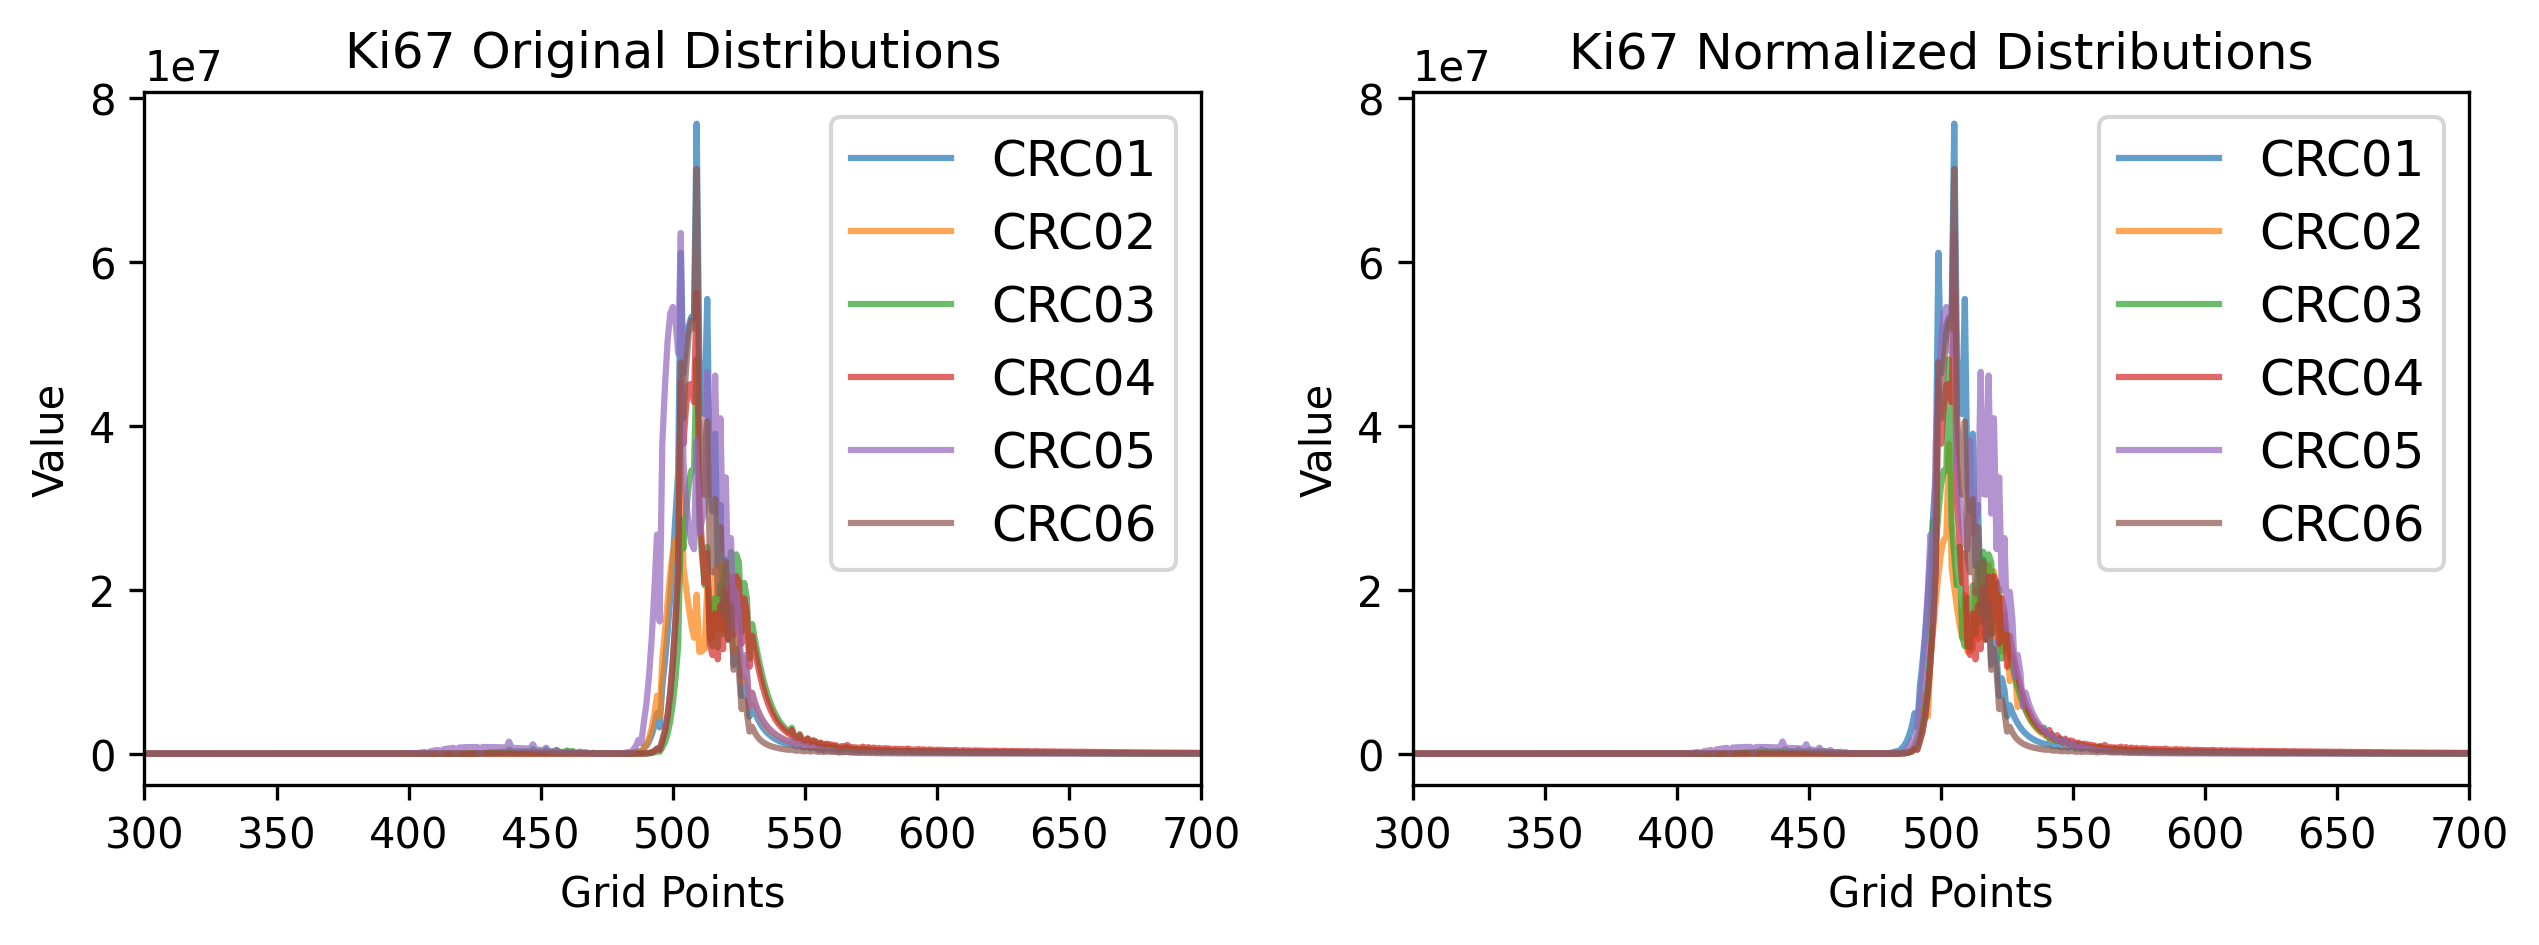

##### Metrics for original marker image #####
Ki67 Pearson Correlation Coefficients: ['1', '0.87155', '0.91185', '0.94572', '0.84509', '0.98655']
Ki67 Spearman Correlation Coefficients: ['1', '0.97125', '0.9672', '0.97122', '0.97268', '0.9762']
Ki67 KL Divergences: ['0', '0.17557', '0.22767', '0.17848', '0.23277', '0.084731'] 

##### Metrics for shifted marker image #####
Ki67 shifted Pearson Correlation Coefficients: ['1', '0.87704', '0.89397', '0.94572', '0.91068', '0.98655']
Ki67 shifted Spearman Correlation Coefficients: ['1', '0.90352', '0.89288', '0.97122', '0.89968', '0.9762']
Ki67 shifted KL Divergences: ['0', '0.20581', '0.17933', '0.17848', '0.17795', '0.084731'] 

Ki67 shifts_direct is: [4, 0, 6, 4, -2, 4]
Ki67 shifts_fft is:    [4, 0, 6, 4, -2, 4]

****************************** Processing marker Pan-CK ******************************
Reference sample for Pan-CK is CRC01


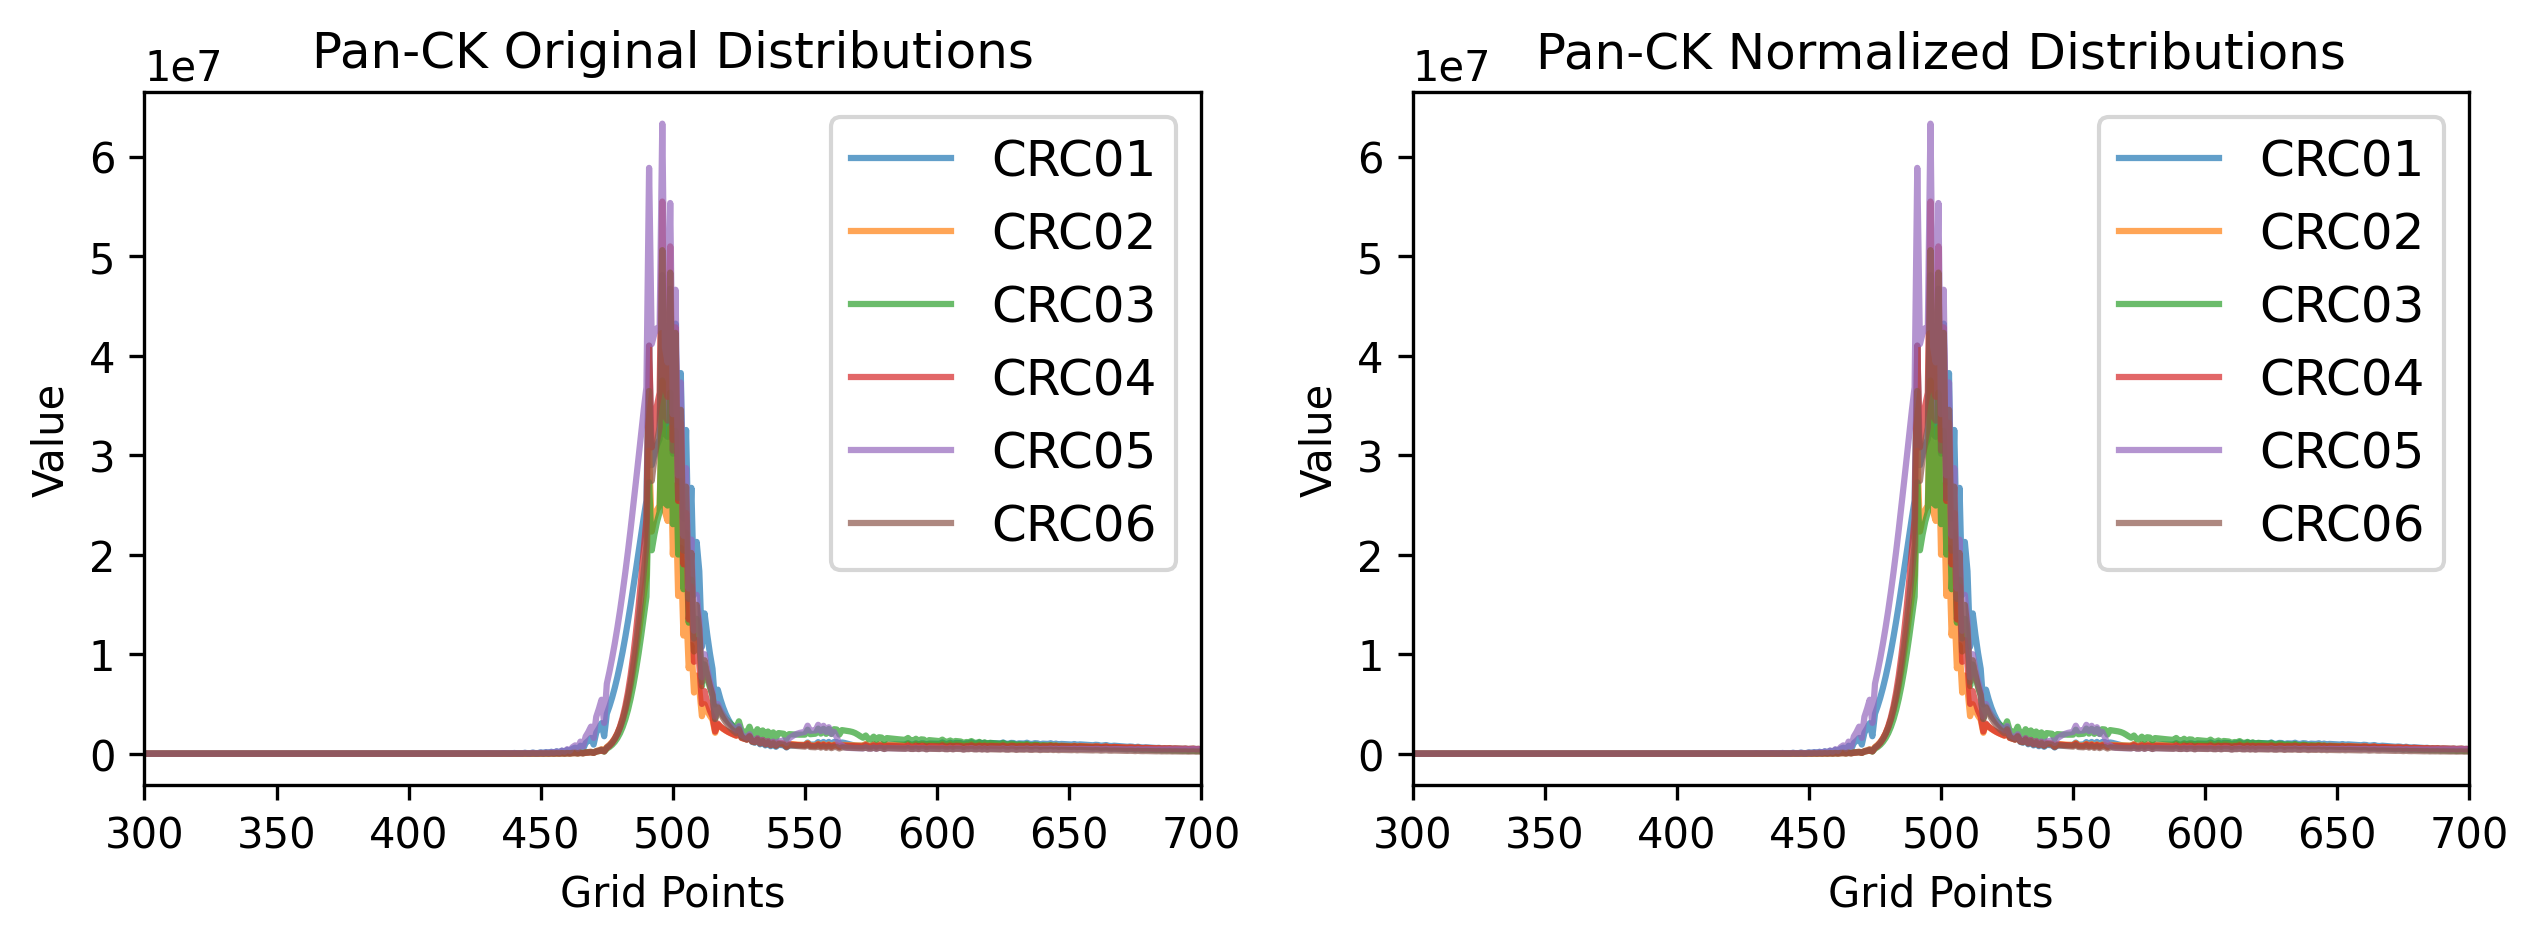

##### Metrics for original marker image #####
Pan-CK Pearson Correlation Coefficients: ['1', '0.97423', '0.98149', '0.9713', '0.97926', '0.98214']
Pan-CK Spearman Correlation Coefficients: ['1', '0.99164', '0.99084', '0.99123', '0.99357', '0.99217']
Pan-CK KL Divergences: ['0', '0.070188', '0.11051', '0.084436', '0.059354', '0.075257'] 

##### Metrics for shifted marker image #####
Pan-CK shifted Pearson Correlation Coefficients: ['1', '0.97423', '0.98149', '0.9713', '0.97926', '0.98214']
Pan-CK shifted Spearman Correlation Coefficients: ['1', '0.99164', '0.99084', '0.99123', '0.99357', '0.99217']
Pan-CK shifted KL Divergences: ['0', '0.070188', '0.11051', '0.084436', '0.059354', '0.075257'] 

Pan-CK shifts_direct is: [0, 0, 0, 0, 0, 0]
Pan-CK shifts_fft is:    [0, 0, 0, 0, 0, 0]

****************************** Processing marker SMA ******************************
Reference sample for SMA is CRC01


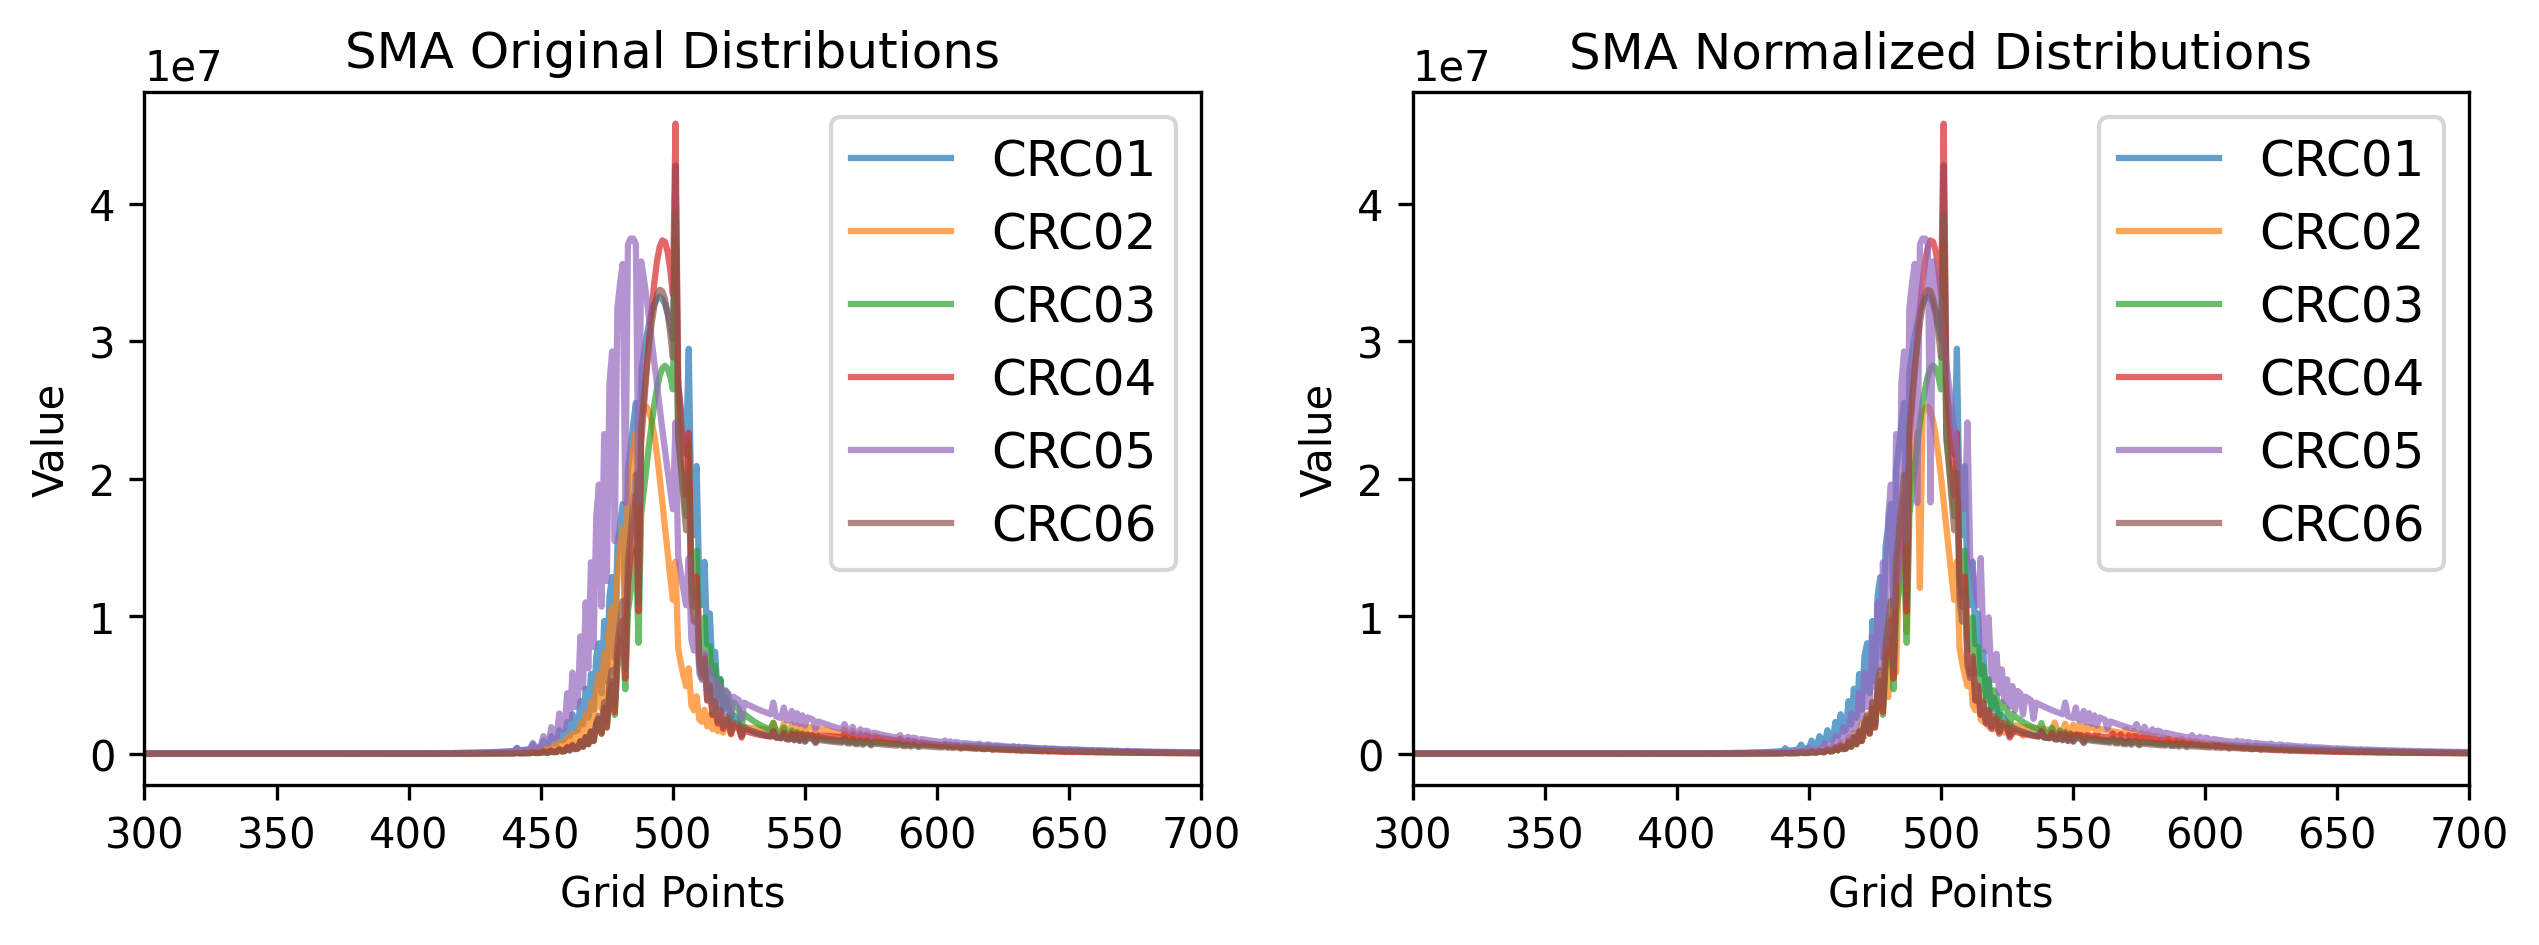

##### Metrics for original marker image #####
SMA Pearson Correlation Coefficients: ['1', '0.90875', '0.97998', '0.97131', '0.86881', '0.98007']
SMA Spearman Correlation Coefficients: ['1', '0.98321', '0.99003', '0.98621', '0.96975', '0.99013']
SMA KL Divergences: ['0', '0.15201', '0.065855', '0.082166', '0.16007', '0.066644'] 

##### Metrics for shifted marker image #####
SMA shifted Pearson Correlation Coefficients: ['1', '0.96155', '0.97998', '0.97131', '0.952', '0.98007']
SMA shifted Spearman Correlation Coefficients: ['1', '0.89877', '0.99003', '0.98621', '0.86415', '0.99013']
SMA shifted KL Divergences: ['0', '0.10648', '0.065855', '0.082166', '0.095517', '0.066644'] 

SMA shifts_direct is: [0, -5, 0, 0, -9, 0]
SMA shifts_fft is:    [0, -5, 0, 0, -9, 0]



In [7]:
shifts_fft_dict = normalize_and_plot_distributions(
    results_hist=results_hist, 
    keys=marker_list, 
    sample_names=sample_names, 
    reference_sample=reference_sample, 
    bin_counts=1024,
    dpi=300, 
    xlim=xlim_original_range)

In [8]:
shifts_fft_dict

{'Hoechst': [0, 0, 0, 0, 0, 0],
 'AF1': [0, -19, 6, -2, -18, 4],
 'CD31': [0, -4, 0, 0, -3, 0],
 'CD45': [3, 0, 5, 3, -3, 4],
 'CD68': [0, 0, 3, 2, 0, 2],
 'Argo550': [0, 0, 0, 0, 0, 0],
 'CD4': [3, 0, 4, 4, -2, 4],
 'FOXP3': [0, 0, 0, 0, 0, 0],
 'CD8a': [0, 0, 3, 2, 0, 2],
 'CD45RO': [0, -18, 7, 3, -29, 5],
 'CD20': [0, 0, 0, 0, 0, 0],
 'PD-L1': [0, -13, 8, 4, -23, 8],
 'CD3e': [8, 0, 13, 10, -6, 10],
 'CD163': [0, 0, 8, 8, 0, 8],
 'E-cadherin': [0, 0, 0, 0, 0, 0],
 'PD-1': [0, 0, 5, 0, -3, 0],
 'Ki67': [4, 0, 6, 4, -2, 4],
 'Pan-CK': [0, 0, 0, 0, 0, 0],
 'SMA': [0, -5, 0, 0, -9, 0]}

## 2. compute amount of shift in log pixel scale 

In [9]:
shift_in_log_pixels_dict = calculate_shift_in_log_pixels(
    results_range=results_range,
    keys=marker_list,
    bin_counts=1024,
    shifts_fft_dict=shifts_fft_dict
)

********** Processing marker Hoechst **********
shift_in_log_pixels for Hoechst is [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

********** Processing marker AF1 **********
shift_in_log_pixels for AF1 is [0.0, -0.20417090664860787, 0.06447502315219196, -0.021491674384063988, -0.1934250694565759, 0.042983348768127976]

********** Processing marker CD31 **********
shift_in_log_pixels for CD31 is [0.0, -0.04223759969075521, 0.0, 0.0, -0.031678199768066406, 0.0]

********** Processing marker CD45 **********
shift_in_log_pixels for CD45 is [0.03225310596902349, 0.0, 0.05375517661503916, 0.03225310596902349, -0.03225310596902349, 0.043004141292031325]

********** Processing marker CD68 **********
shift_in_log_pixels for CD68 is [0.0, 0.0, 0.03247170993659503, 0.02164780662439669, 0.0, 0.02164780662439669]

********** Processing marker Argo550 **********
shift_in_log_pixels for Argo550 is [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

********** Processing marker CD4 **********
shift_in_log_pixels for CD4 is [0.032490909

## 3. Now perform image transformation

In [10]:
segmentation_mask_path = ["/home/groups/ChangLab/dataset/Orion_CRC/mesmer_masks/crc01_mesmer_cell_mask.tif", 
                         "/home/groups/ChangLab/dataset/Orion_CRC/mesmer_masks/crc02_mesmer_cell_mask.tif", 
                         "/home/groups/ChangLab/dataset/Orion_CRC/mesmer_masks/crc03_mesmer_cell_mask.tif",
                         "/home/groups/ChangLab/dataset/Orion_CRC/mesmer_masks/crc04_mesmer_cell_mask.tif",
                         "/home/groups/ChangLab/dataset/Orion_CRC/mesmer_masks/crc05_mesmer_cell_mask.tif",
                         "/home/groups/ChangLab/dataset/Orion_CRC/mesmer_masks/crc06_mesmer_cell_mask.tif"
                        ]

In [ ]:
output_directory = "/home/groups/ChangLab/wangmar/shift-panel-reduction/shift-panel-reduction-main/landmark_normalization/cycif-normalization-pipeline/command_line_script/final_script"
segmentation_mask_dir = '/home/groups/ChangLab/dataset/Orion_CRC/mesmer_masks'

process_and_stack_images(
    if_dask_arrays=if_dask_arrays,
    sample_names=sample_names,
    marker_dict=marker_list,
    shift_in_log_pixels_dict=shift_in_log_pixels_dict,
    reference_sample=reference_sample,
    num_bins=2**16, # need if you want to plot normalized image's distribution
    output_directory=output_directory, # the dir in which you want the normalized images to be stored at
    dpi=300,
    segmentation_mask_path=segmentation_mask_path, 
    plot_img=True, # whether you wanna plot the actual image
    plot_dist=True, # whether you wanna plot pixel intensity distribution
    plot_single_cell_corr=True, # whether you wanna plot the single cell level correlation
    plot_single_cell_img=True, # whether you wanna plot a random batch of single cell images
    gmm_analysis=True, # whether you wanna perform a GMM analysis to comparison positive population before and after normalization
    save_image=False, # whether you wanna save the stacked normalized images, set this to false if you first wanna see the performance of the normalization
    save_ome_tiff=False
)
